This is a Notebook focused on analyzing network data from RIPE Atlas, specifically related to IPv4 and IPv6 connectivity for 3 services: Apple, Spotify, and YouTube.
It measured 30 probes for every country of the list below, over the course of 24 hours with 1 hour intervals, using Traceroute.


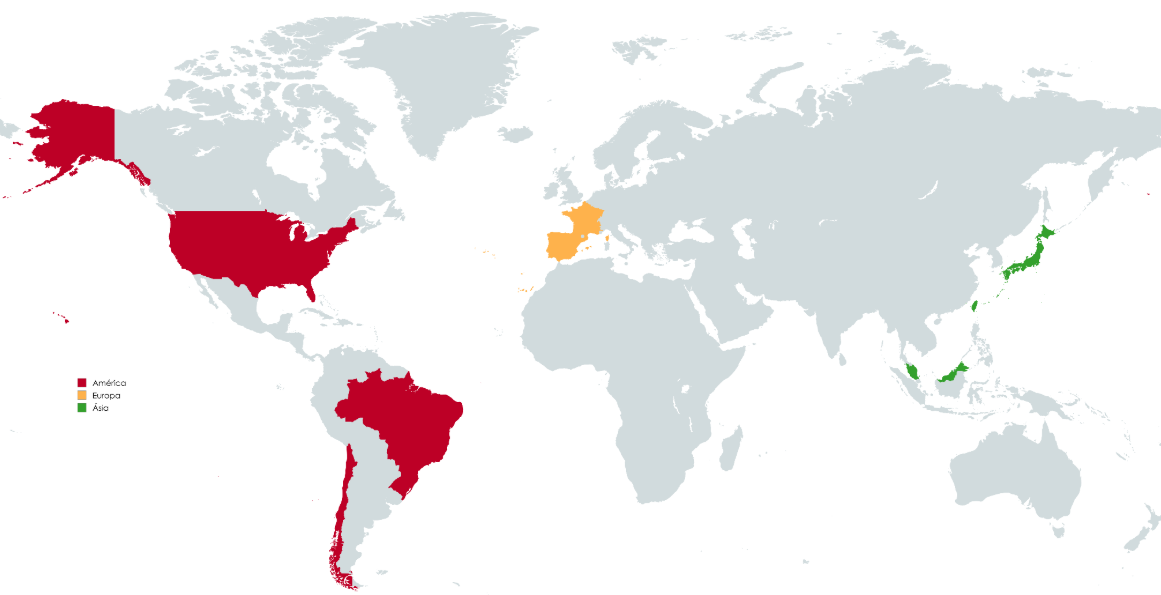

# Analyzing Network Data

  apple IPV4 -> 86416926
apple IPV6 -> 86416927
spotify IPV4 -> 86416928
spotify ipv6 -> 86416929
youtube ipv4 -> 86416930
youtube ipv6 -> 86416931


## Parsing


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

def parse_traceroute_data(data,ip_version):


    probe_id = data.get("prb_id")
    goal_route = data.get("dst_name")
    end_time = data.get("endtime")
    timestamp = data.get("timestamp")
    ip_responded = data['destination_ip_responded']

    dt = datetime.utcfromtimestamp(timestamp)
    hour = dt.hour
    minute = dt.minute


    total_rtt = 0
    number_of_hops = 0
    invalid_hops = 0

    if ip_responded:
      for hop in data.get("result", []):
          valid_results = [entry for entry in hop.get("result", []) if "rtt" in entry]
          if valid_results:
              number_of_hops += 1
              total_rtt += np.mean([entry.get("rtt") for entry in valid_results])
          else:
            invalid_hops += 1
      #if number_of_hops != 0:
      #  total_rtt /= number_of_hops
      number_of_hops += invalid_hops

    location_mapping = {
    "1000709": "BR",
    "1009506": "JP",
    "61151": "PT",
    "12927": "CL",
    "50079": "JP",
    "60473": "CL",
    "55055": "MY",
    "1008999": "PH",
    "1009546": "PH",
    "1009000": "PH",
    "54843": "PT",
    "60756": "FR",
    "54927": "US",
    "33230": "CL",
    "1007239": "US",
      "61449": "US",
    "65424": "ES",
    "15618": "ES",
    "11948": "ES",
    "61985": "FR",
    "50084": "US",
    "50838": "FR",
    "62417": "US",
    "1008686": "US",
    "64603": "BR",
    "52844": "JP",
    "64036": "TW",
    "53335": "BR",
    "51525": "TW",
    "1005005": "MY",
    "54947": "PT",
    "61200": "TW",
    "33838": "MY"
  }
    location = location_mapping[str(probe_id)]

    continent = {
        "BR": "America",
        "CL":"America",
        "US": "America",
        "ES":"Europe",
        "FR":"Europe",
        "PT": "Europe",
        "JP": "Asia",
        "TW":"Asia",
        "MY":"Asia",
        "PH":"Asia",
    }

    return pd.DataFrame([{
        "probe_id": probe_id,
        "goal_route": goal_route,
        "rtt": total_rtt,
        "number_of_hops": number_of_hops,
        "end_time": end_time,
        "ip_version": ip_version,
        "timestamp": timestamp,
        "destination_ip_responded": ip_responded,
        "location": location,
        "continent": continent[location],
        "hour": hour,
        "minute": minute
    }])





In [ ]:
import json

def read_traceroute_data(file_name, ip_version=None):

  if ip_version is None:
    ip_version = file_name.split("_")[-1]
  dataframe = pd.DataFrame()
  with open(file_name + ".json") as f:

    lines = [line.rstrip() for line in f]

    for line in lines:
      data = json.loads(line)

      new_dataframe = parse_traceroute_data(data, ip_version)

      dataframe = pd.concat([dataframe, new_dataframe], ignore_index=True)

  return dataframe



In [ ]:

files_to_read = [
    "apple_v4",
    "apple_v6",
    "spotify_v4",
    "spotify_v6",
    "youtube_v4",
    "youtube_v6",
]
dataframe = read_traceroute_data(files_to_read[0])

for file_to_read in files_to_read[1:]:
    dataframe = pd.concat([dataframe, read_traceroute_data(file_to_read)], ignore_index=True)

dataframe

probe_id         goal_route          rtt  number_of_hops    end_time  \
0        11948    music.apple.com    18.911667              11  1738036908   
1        15618    music.apple.com   207.146167              16  1738037031   
2        33230    music.apple.com    35.489000              10  1738036935   
3        50079    music.apple.com    31.568000              10  1738036960   
4        50084    music.apple.com   123.690000              12  1738037044   
...        ...                ...          ...             ...         ...   
4467     61449  music.youtube.com   216.600667              11  1738119878   
4468     61985  music.youtube.com    19.607333               5  1738119938   
4469     62417  music.youtube.com   253.902167               9  1738119859   
4470     64036  music.youtube.com  1566.068000               6  1738120013   
4471     65424  music.youtube.com    99.130333               8  1738119861   

     ip_version   timestamp  destination_ip_responded location continent  \
0            v4  1738036908                      True       ES    Europe   
1            v4  1738036900                      True       ES    Europe   
2            v4  1738036905                      True       CL   America   
3            v4  1738036899                      True       JP      Asia   
4            v4  1738036903                      True       US   America   
...         ...         ...                       ...      ...       ...   
4467         v6  1738119847                      True       US   America   
4468         v6  1738119848                      True       FR    Europe   
4469         v6  1738119848                      True       US   America   
4470         v6  1738119858                      True       TW      Asia   
4471         v6  1738119860                      True       ES    Europe   

      hour  minute  
0        4       1  
1        4       1  
2        4       1  
3        4       1  
4        4       1  
...    ...     ...  
4467     3       4  
4468     3       4  
4469     3       4  
4470     3       4  
4471     3       4  

[4472 rows x 12 columns]

In [ ]:
dataframe

probe_id         goal_route          rtt  number_of_hops    end_time  \
0        11948    music.apple.com    18.911667              11  1738036908   
1        15618    music.apple.com   207.146167              16  1738037031   
2        33230    music.apple.com    35.489000              10  1738036935   
3        50079    music.apple.com    31.568000              10  1738036960   
4        50084    music.apple.com   123.690000              12  1738037044   
...        ...                ...          ...             ...         ...   
4467     61449  music.youtube.com   216.600667              11  1738119878   
4468     61985  music.youtube.com    19.607333               5  1738119938   
4469     62417  music.youtube.com   253.902167               9  1738119859   
4470     64036  music.youtube.com  1566.068000               6  1738120013   
4471     65424  music.youtube.com    99.130333               8  1738119861   

     ip_version   timestamp  destination_ip_responded location continent  \
0            v4  1738036908                      True       ES    Europe   
1            v4  1738036900                      True       ES    Europe   
2            v4  1738036905                      True       CL   America   
3            v4  1738036899                      True       JP      Asia   
4            v4  1738036903                      True       US   America   
...         ...         ...                       ...      ...       ...   
4467         v6  1738119847                      True       US   America   
4468         v6  1738119848                      True       FR    Europe   
4469         v6  1738119848                      True       US   America   
4470         v6  1738119858                      True       TW      Asia   
4471         v6  1738119860                      True       ES    Europe   

      hour  minute  
0        4       1  
1        4       1  
2        4       1  
3        4       1  
4        4       1  
...    ...     ...  
4467     3       4  
4468     3       4  
4469     3       4  
4470     3       4  
4471     3       4  

[4472 rows x 12 columns]

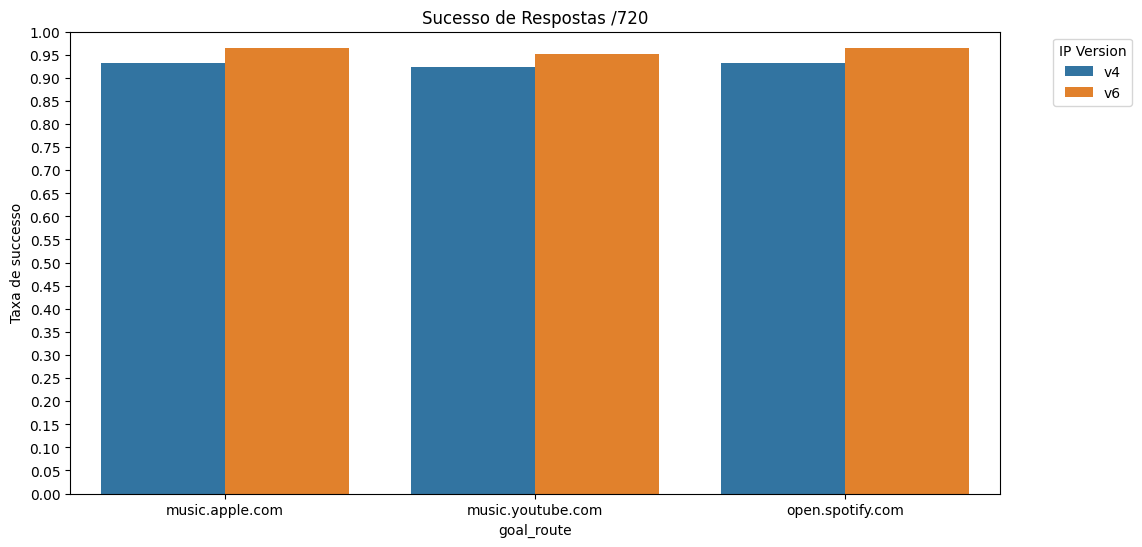

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count total occurrences and successful responses
total_counts = dataframe.groupby(["goal_route", "ip_version"]).size().reset_index(name="total_attempts")
success_counts = dataframe[dataframe["destination_ip_responded"]].groupby(["goal_route", "ip_version"]).size().reset_index(name="successful_attempts")

# Merge the data
merged_df = pd.merge(total_counts, success_counts, on=["goal_route", "ip_version"], how="left").fillna(0)

expected_total = 720 # merged_df["total_attempts"]
# Calculate success ratio
merged_df["success_ratio"] = merged_df["successful_attempts"] / 720

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x="goal_route", y="success_ratio", hue="ip_version")

yticks = np.arange(0, 1.05, 0.05)
plt.yticks(yticks)
# Labels and title
plt.ylabel("Taxa de successo")
plt.title("Sucesso de Respostas /720")
plt.ylim(0, 1)
plt.legend(title="IP Version", bbox_to_anchor=(1.05, 1), loc='upper left')


# Show plot
plt.show()



## Success Metric

In [ ]:


dataframe_success = dataframe[dataframe["location"] != "PH"]
dataframe_success = dataframe[dataframe["destination_ip_responded"]]

dataframe_success
# Find the minimum count across all locations
min_count = dataframe_success['location'].value_counts().min()

# Resample to the minimum count for each location
dataframe_success = dataframe_success.groupby('location').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

dataframe = dataframe_success


<ipython-input-27-c0b3004bf883>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataframe_success = dataframe_success.groupby('location').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


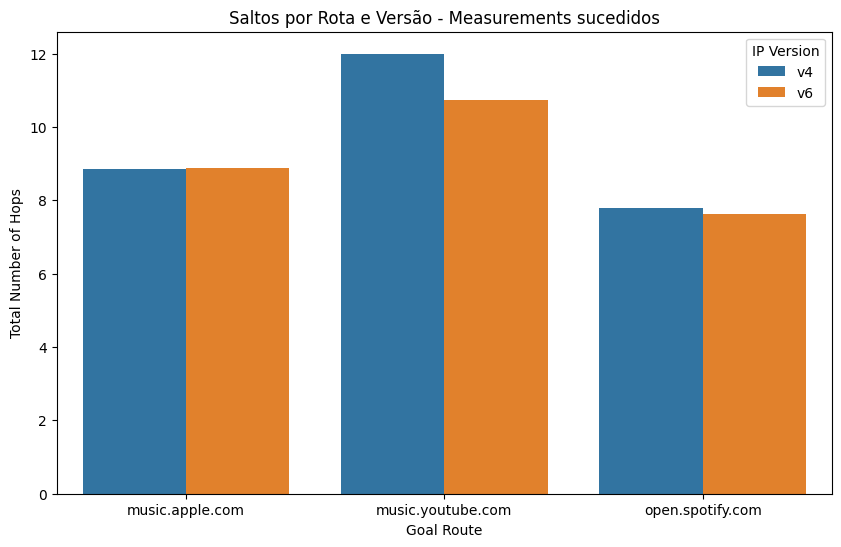

In [ ]:



def graph_of_hops_for(dataframe, title, average=False):

  grouped_df = dataframe.groupby(["goal_route", "ip_version"])["number_of_hops"]
  grouped_df = grouped_df.sum().reset_index() if not average else grouped_df.mean().reset_index()

  # Create the bar plot
  plt.figure(figsize=(10, 6))
  sns.barplot(data=grouped_df, x="goal_route", y="number_of_hops", hue="ip_version")

  # Labels and title
  plt.xlabel("Goal Route")
  plt.ylabel("Total Number of Hops")
  plt.title(title)
  plt.legend(title="IP Version")

  # Show the plot
  plt.show()

graph_of_hops_for(dataframe_success, "Saltos por Rota e Versão - Measurements sucedidos",
                  average=True)


<ipython-input-42-37b393ed81e6>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="IP Version", bbox_to_anchor=(1.05, 1), loc='upper left')


2880


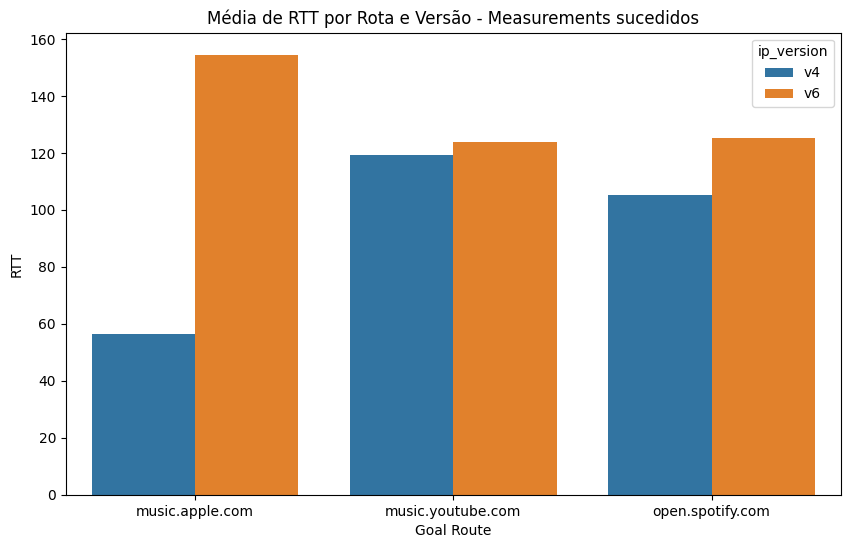

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt
import seaborn as sns

def graph_of_rtt_for(dataframe, title, average=False, show=True, ax=None, add_to_x=None, set_x=None):
    # Group data by 'goal_route' and 'ip_version' and sum 'rtt'
    grouped_df = dataframe.groupby(["goal_route", "ip_version"])["rtt"]
    grouped_df = grouped_df.sum().reset_index() if not average else grouped_df.mean().reset_index()

    if add_to_x != None:
      grouped_df["goal_route"] = grouped_df["goal_route"] + " - " + add_to_x

    if set_x != None:
      grouped_df["goal_route"] = set_x
    # Use the provided axis or create a new one
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))  # Create figure and axis if none is provided
        ax.legend(title="IP Version", bbox_to_anchor=(1.05, 1), loc='upper left')
    sns.barplot(data=grouped_df, x="goal_route", y="rtt", hue="ip_version", ax=ax)

    # Labels and title
    ax.set_xlabel("Goal Route")
    ax.set_ylabel("RTT")
    ax.set_title(title)



    if show and ax is None:  # Only show if a new figure was created
        plt.show()

    return ax

graph_of_rtt_for(dataframe_success, "Média de RTT por Rota e Versão - Measurements sucedidos",
                 average=True)
print(len(dataframe_success))

<Axes: >

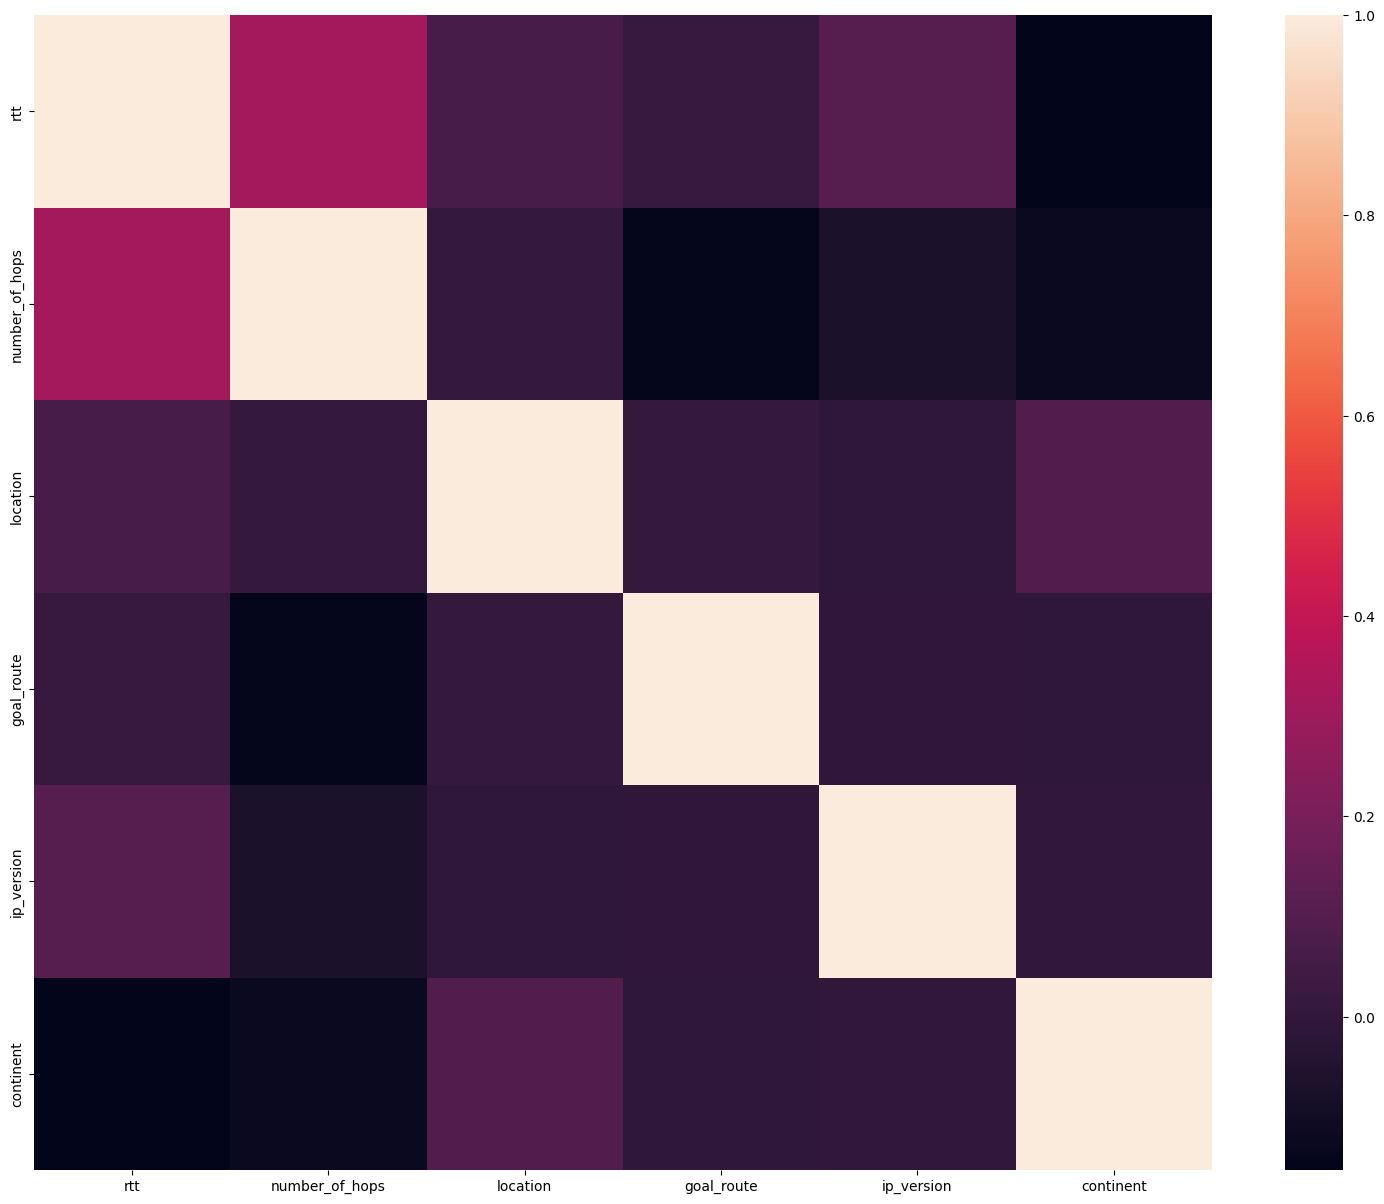

In [ ]:
f = plt.figure(figsize=(19, 15))

dataframe_corr = dataframe_success.select_dtypes(include=[np.number])
dataframe_corr.drop(columns=["probe_id", "end_time", "hour", "minute"], inplace=True)
dataframe_corr['location'] = dataframe_success['location'].astype('category')
dataframe_corr['location'] = dataframe_corr['location'].cat.codes
dataframe_corr['goal_route'] = dataframe_success['goal_route'].astype('category')
dataframe_corr['goal_route'] = dataframe_corr['goal_route'].cat.codes
dataframe_corr['ip_version'] = dataframe_success['ip_version'].astype('category')
dataframe_corr['ip_version'] = dataframe_corr['ip_version'].cat.codes
dataframe_corr['continent'] = dataframe_success['continent'].astype('category')
dataframe_corr['continent'] = dataframe_corr['continent'].cat.codes
corr = dataframe_corr.corr()
sns.heatmap(corr,  )

## Metric over Time

<ipython-input-45-b14d0f2618db>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


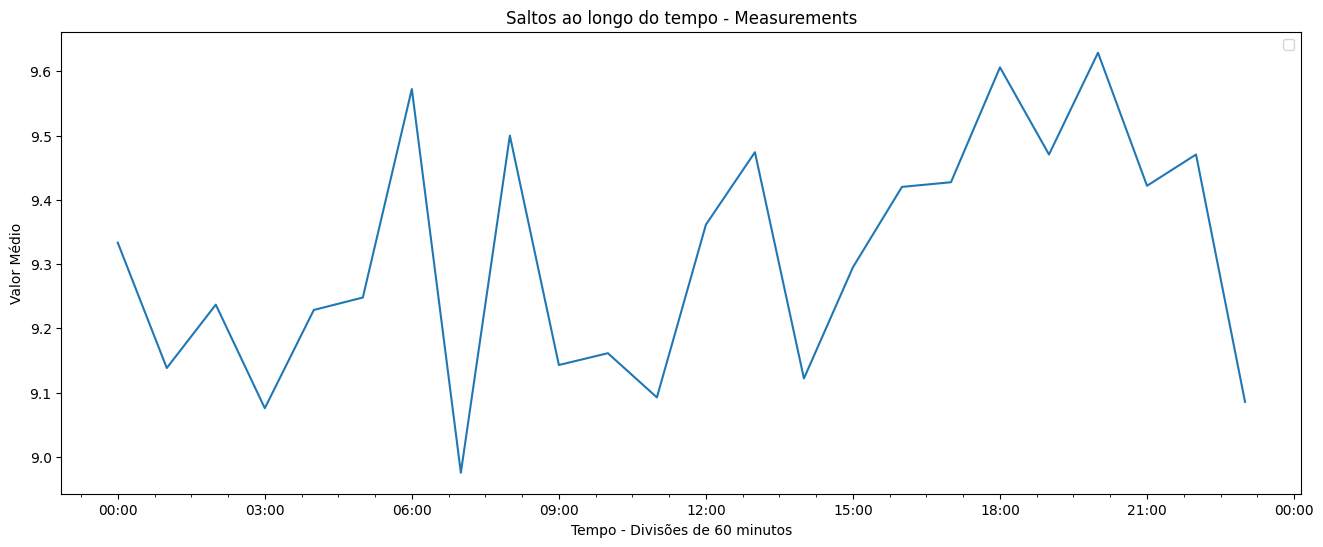

<ipython-input-45-b14d0f2618db>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


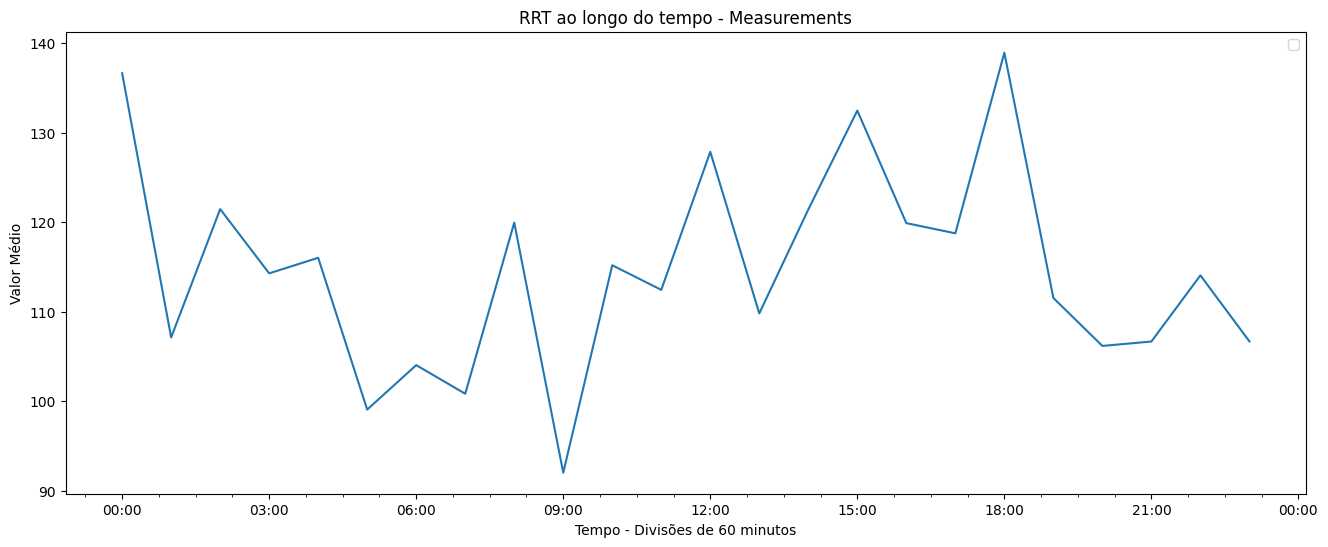

<Axes: title={'center': 'RRT ao longo do tempo - Measurements'}, xlabel='Tempo - Divisões de 60 minutos', ylabel='Valor Médio'>

In [ ]:
import math
import matplotlib.dates as md
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator


def line_graph_for(dataframe, title, y_value, ax=None, label=None, show=True, divided_by=1):
    # Define the window size (n)
    n = 1  # You can change this value as needed
    # Sort the data by 'timestamp'
    dataframe = dataframe.sort_values("timestamp")

    # Group the data by hour and compute the average of 'number_of_hops'
    df_grouped = dataframe.groupby('hour', as_index=False).agg(
        number_of_hops_avg=('number_of_hops', 'mean')
    )

    separation_minutes = 60
    dataframe['rounded_minute'] = (dataframe['minute'] // separation_minutes) * separation_minutes
    dataframe['hour_minute'] = dataframe['hour'].astype(str).str.zfill(2) + ':' + dataframe['rounded_minute'].astype(str).str.zfill(2)

    df_grouped = dataframe.groupby('hour_minute', as_index=False).agg(
        y_avg=(y_value, 'mean')
    )
    df_grouped['y_avg'] = df_grouped['y_avg'] / divided_by
    # Add a dummy date (e.g., '2000-01-01') to 'hour_minute' and convert to datetime
    df_grouped['datetime'] = pd.to_datetime('2000-01-01 ' + df_grouped['hour_minute'], format='%Y-%m-%d %H:%M')

    # If no axis is provided, create a new figure and axis
    if ax is None:
        plt.figure(figsize=(16, 6))
        ax = plt.gca()

    # Create the line plot with the label for the legend
    sns.lineplot(data=df_grouped, x="datetime", y="y_avg", markers=True, ax=ax, label=label)

    # Format the x-axis
    majorFmt = md.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(majorFmt)

    # Set the minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator())

    # Labels and title
    ax.set_xlabel("Tempo - Divisões de " + str(separation_minutes) + " minutos")
    ax.set_ylabel(f"Valor Médio")
    ax.set_title(title)

    # Show the legend
    ax.legend()

    # Show the plot if requested
    if show:
        plt.show()

    return ax  # Return the axis for chaining

# Create the first plot
line_graph_for(dataframe_success, "Saltos ao longo do tempo - Measurements", "number_of_hops", show=True)

# Chain the second plot onto the same axis
line_graph_for(dataframe_success, "RRT ao longo do tempo - Measurements", "rtt", show=True)


In [ ]:
'''
ax = line_graph_for(dataframe_success, "Saltos ao longo do tempo - Measurements", "number_of_hops", show=False,
                    label="Saltos")

# Chain the second plot onto the same axis
line_graph_for(dataframe_success, "RRT e Saltos ao longo do tempo - Measurements", "rtt", show=True, ax=ax,
               divided_by=15,
               label="RTT - Dividido por 20")
'''

'\nax = line_graph_for(dataframe_success, "Saltos ao longo do tempo - Measurements", "number_of_hops", show=False, \n                    label="Saltos")\n\n# Chain the second plot onto the same axis\nline_graph_for(dataframe_success, "RRT e Saltos ao longo do tempo - Measurements", "rtt", show=True, ax=ax,\n               divided_by=15,\n               label="RTT - Dividido por 20")\n'

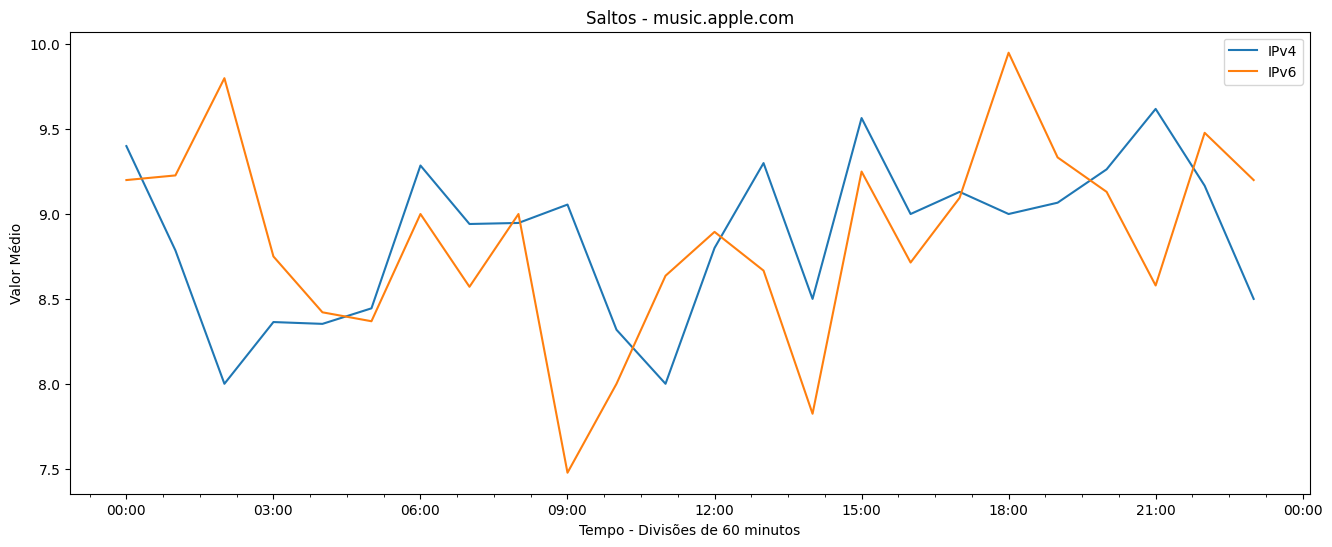

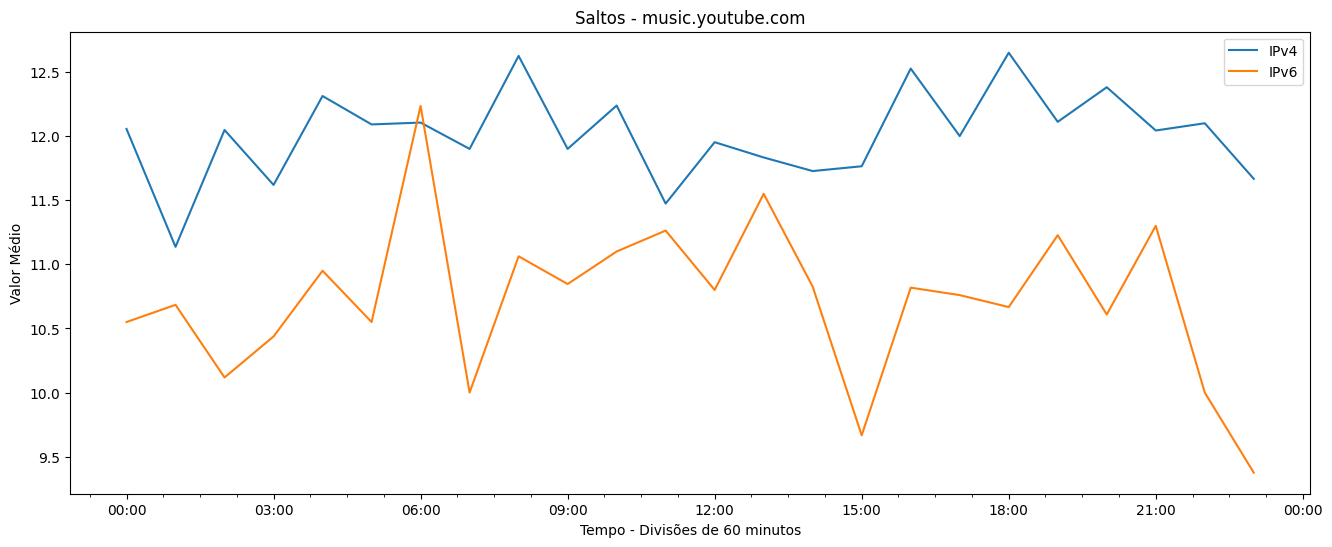

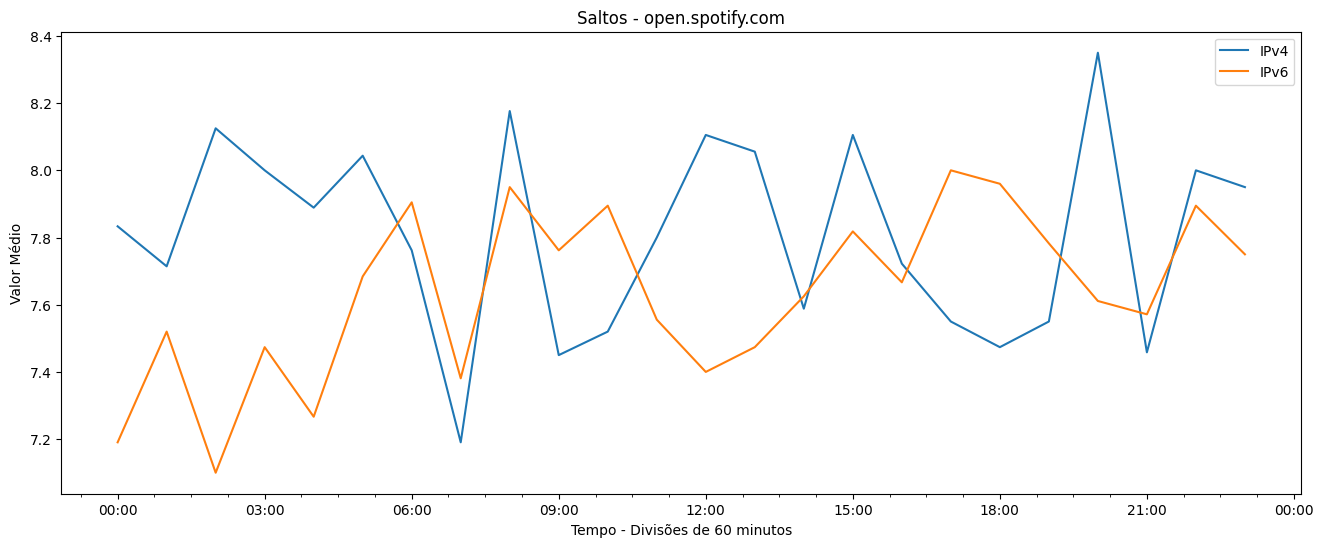

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure timestamp is in datetime format
dataframe["timestamp"] = pd.to_datetime(dataframe["timestamp"])



# Get unique combinations of 'goal_route' and 'ip_version'
group_combinations = dataframe.groupby("goal_route").agg(
    ip_version=('ip_version', 'first')  # or any other aggregation function
).reset_index()

# Loop through each group combination and create a separate plot
for _, group in group_combinations.iterrows():
    goal_route = group["goal_route"]
    ip_version = group["ip_version"]

    # Filter the dataframe for the current combination
    filtered_df = dataframe[(dataframe["goal_route"] == goal_route)]


    ax = line_graph_for(filtered_df[(filtered_df["ip_version"] == "v4")], "",
                    "number_of_hops", show=False, label="IPv4")

    line_graph_for(filtered_df[(filtered_df["ip_version"] == "v6")], "Saltos - " + goal_route,
                    "number_of_hops", show=True, ax=ax, label="IPv6")



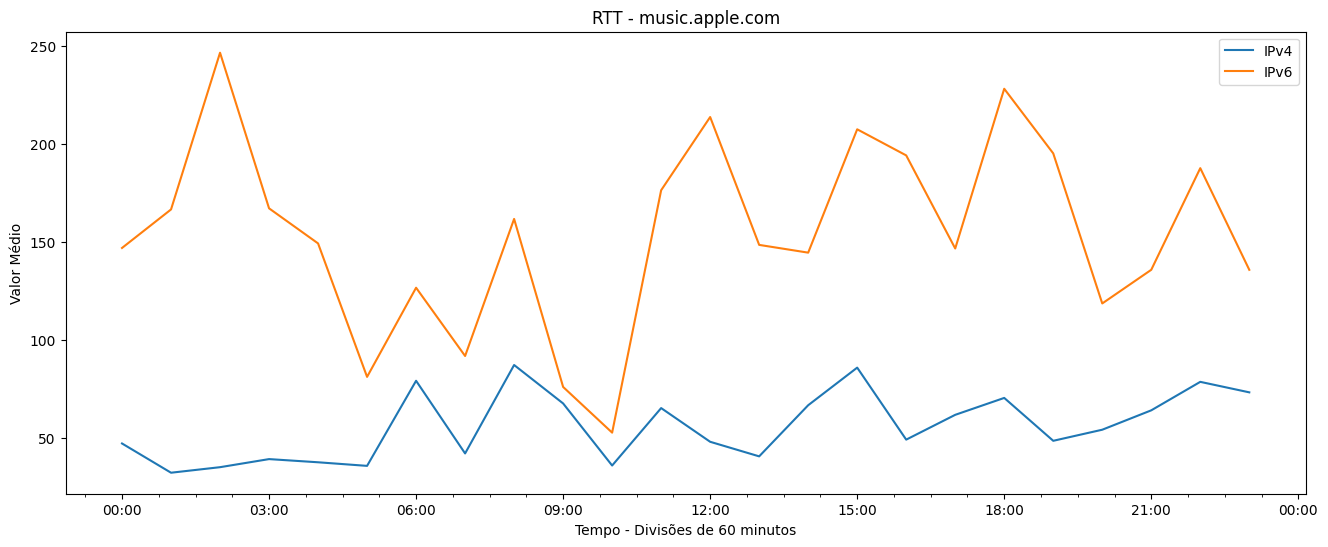

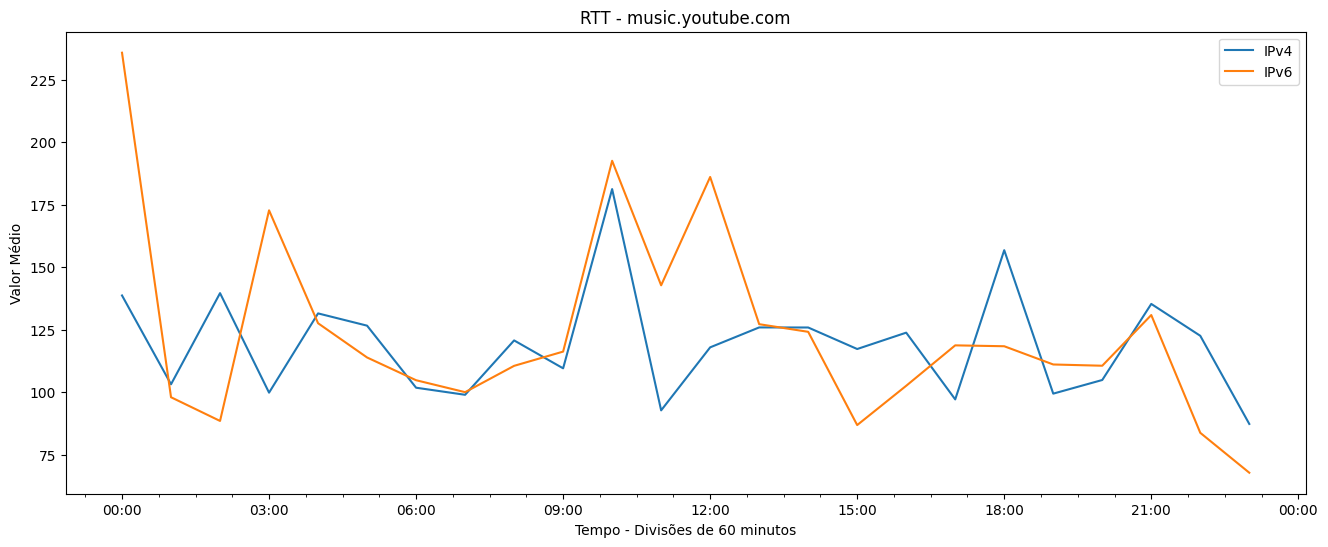

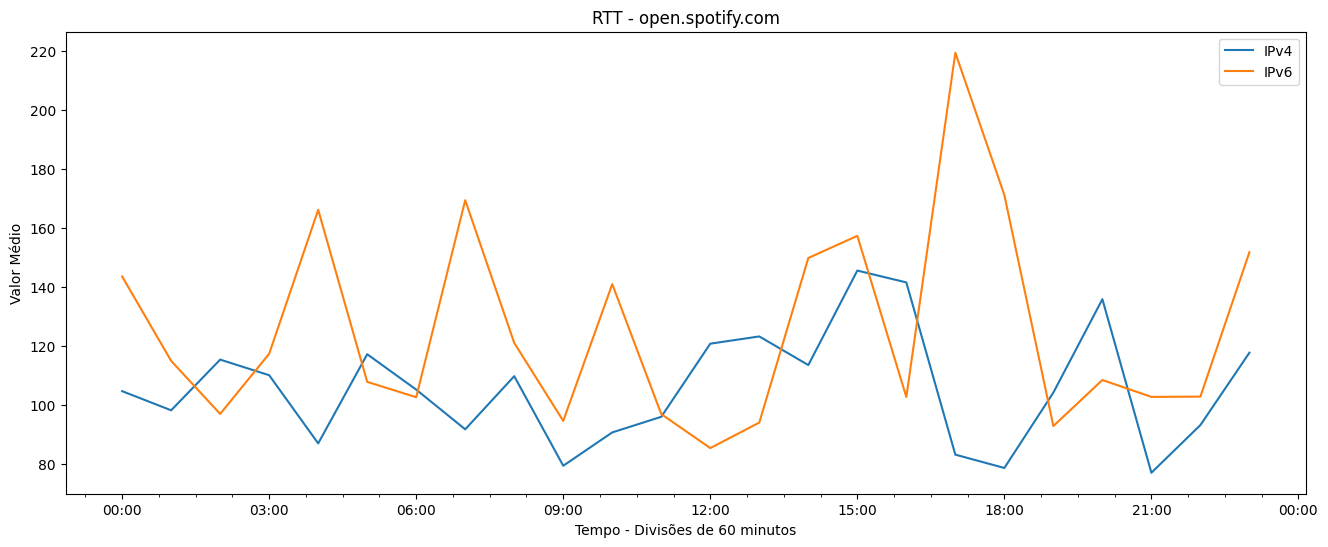

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure timestamp is in datetime format
dataframe["timestamp"] = pd.to_datetime(dataframe["timestamp"])



# Get unique combinations of 'goal_route' and 'ip_version'
group_combinations = dataframe.groupby(["goal_route"]).size().reset_index()[["goal_route"]]

# Loop through each group combination and create a separate plot
for _, group in group_combinations.iterrows():
    goal_route = group["goal_route"]

    # Filter the dataframe for the current combination
    filtered_df = dataframe[(dataframe["goal_route"] == goal_route)]


    #line_graph_for(filtered_df, "RTT - " + goal_route + " com " + ip_version ,    "rtt")

    ax = line_graph_for(filtered_df[(filtered_df["ip_version"] == "v4")], "",
                    "rtt", show=False, label="IPv4")

    line_graph_for(filtered_df[(filtered_df["ip_version"] == "v6")], "RTT - " + goal_route,
                    "rtt", show=True, ax=ax, label="IPv6")



## Per location

<ipython-input-29-bf438c12d893>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="IP Version", bbox_to_anchor=(1.05, 1), loc='upper left')
<ipython-input-29-bf438c12d893>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="IP Version", bbox_to_anchor=(1.05, 1), loc='upper left')
<ipython-input-29-bf438c12d893>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="IP Version", bbox_to_anchor=(1.05, 1), loc='upper left')
<ipython-input-29-bf438c12d893>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore ar

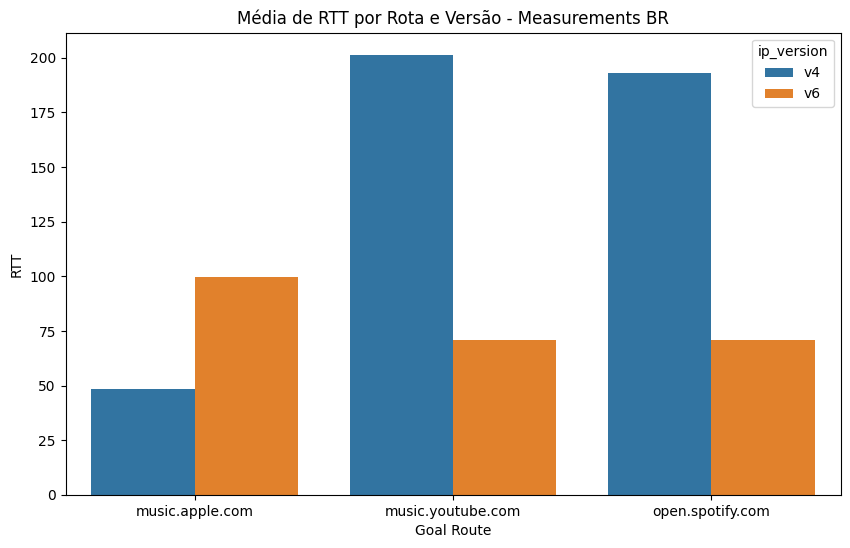

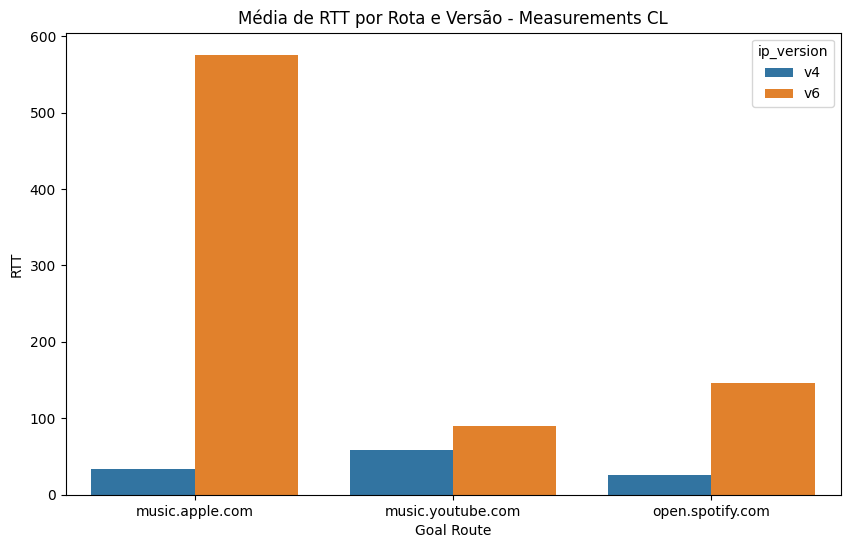

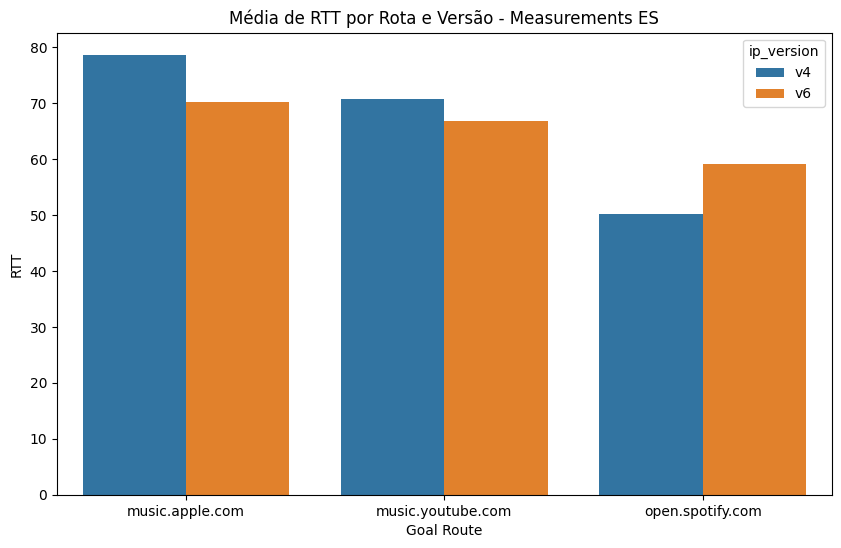

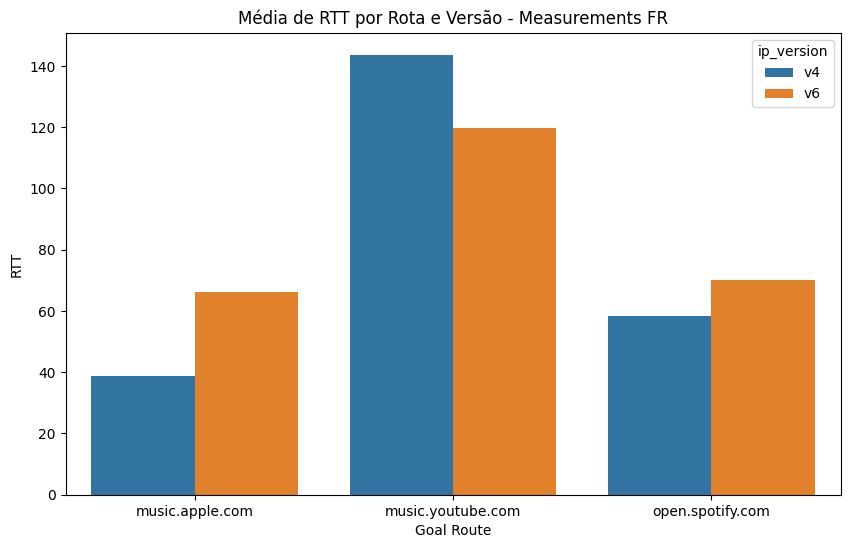

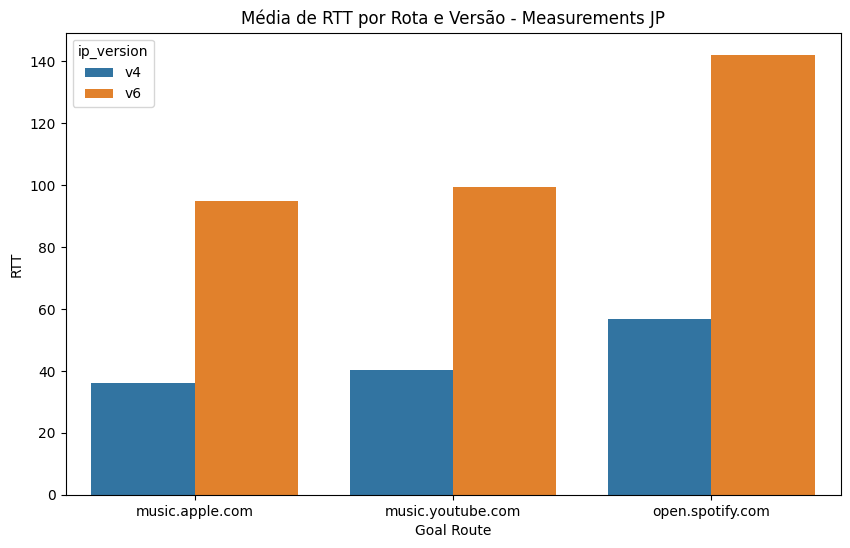

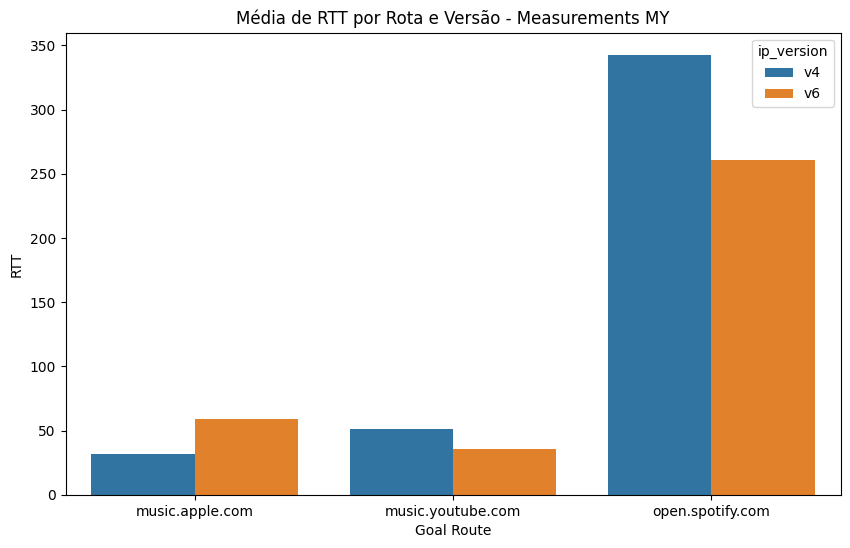

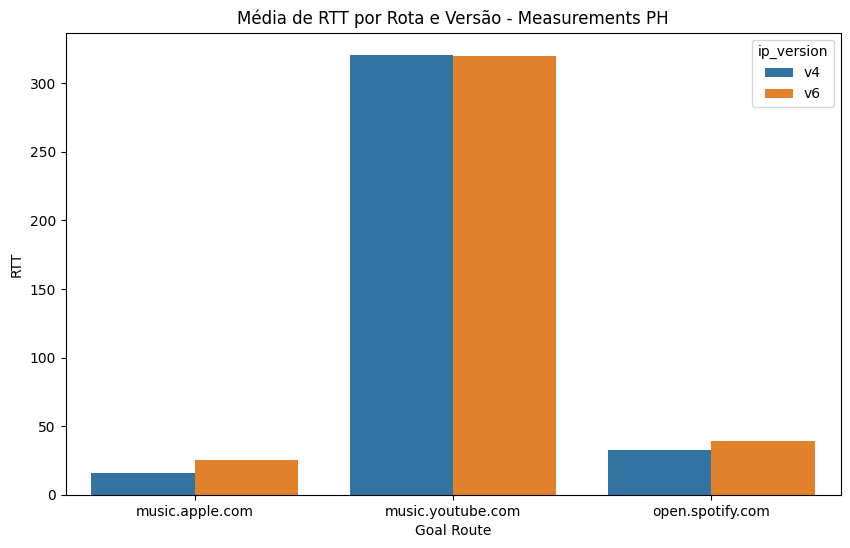

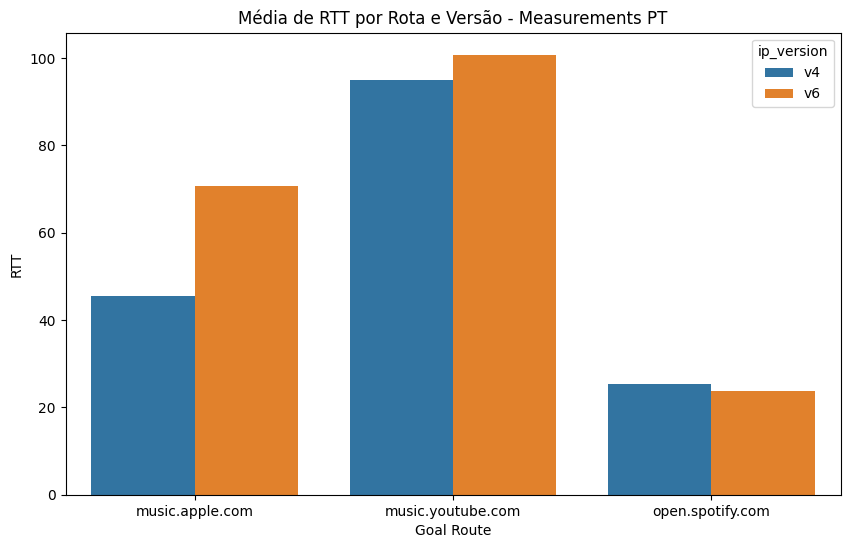

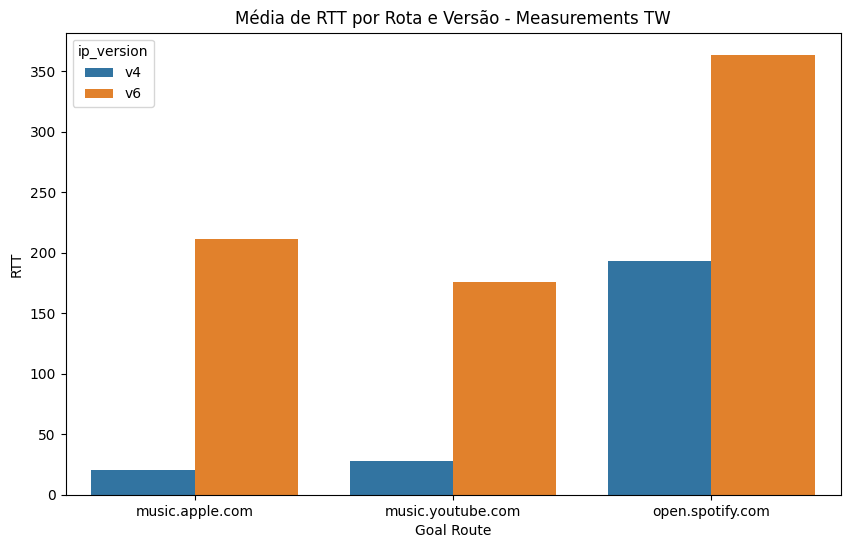

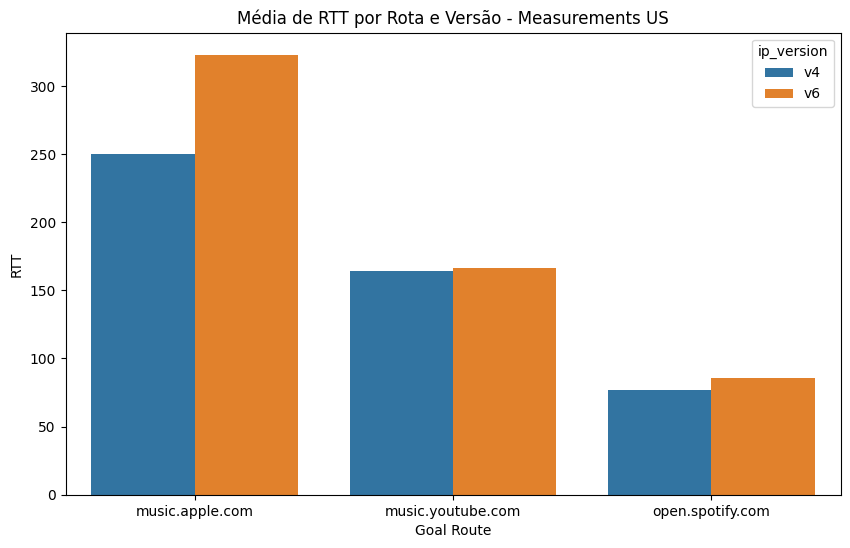

In [ ]:

# Ensure timestamp is in datetime format
dataframe["timestamp"] = pd.to_datetime(dataframe["timestamp"])


# Get unique combinations of 'goal_route' and 'ip_version'
group_combinations = dataframe.groupby(["location" ]).size().reset_index()[["location"]]

# Loop through each group combination and create a separate plot
for _, group in group_combinations.iterrows():

    location =  group["location"]

    # Filter the dataframe for the current combination
    filtered_df = dataframe[(dataframe['location'] == location)]

    filtered_df = filtered_df.sort_values("timestamp")
    graph_of_rtt_for(filtered_df, "Média de RTT por Rota e Versão - Measurements " + location, average=True)

<ipython-input-29-bf438c12d893>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="IP Version", bbox_to_anchor=(1.05, 1), loc='upper left')
<ipython-input-29-bf438c12d893>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="IP Version", bbox_to_anchor=(1.05, 1), loc='upper left')
<ipython-input-29-bf438c12d893>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="IP Version", bbox_to_anchor=(1.05, 1), loc='upper left')


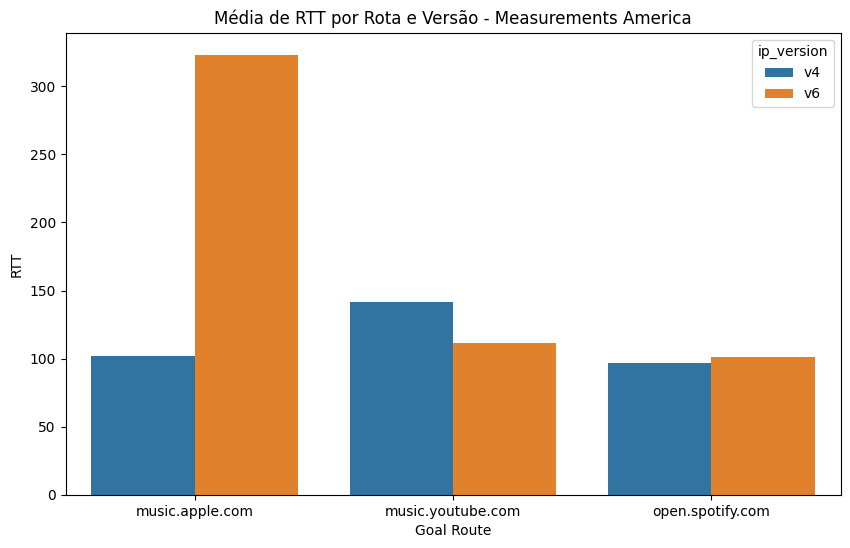

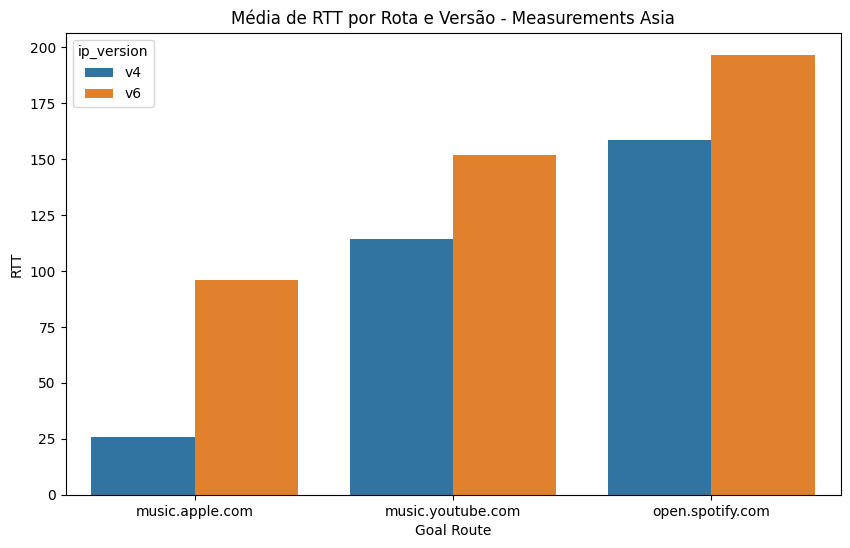

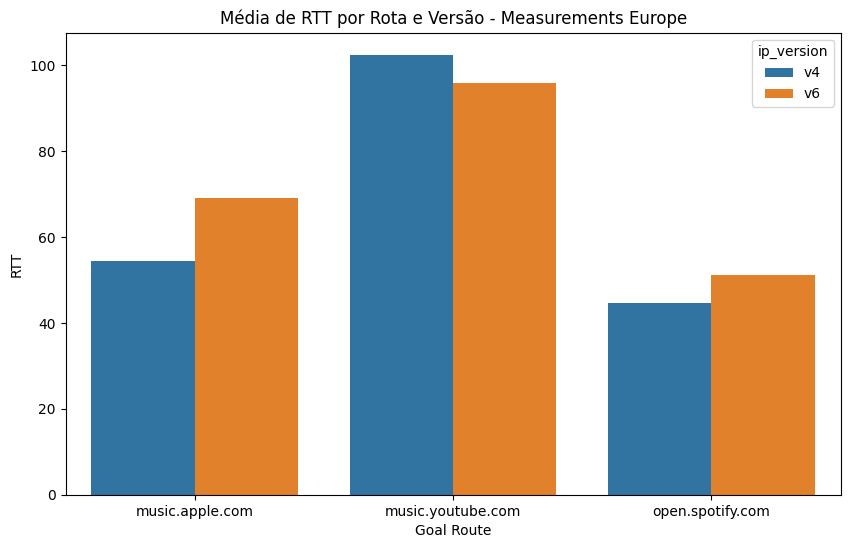

In [ ]:

# Ensure timestamp is in datetime format
dataframe["timestamp"] = pd.to_datetime(dataframe["timestamp"])


# Get unique combinations of 'goal_route' and 'ip_version'
group_combinations = dataframe.groupby(["continent" ]).size().reset_index()[["continent"]]

# Loop through each group combination and create a separate plot
for _, group in group_combinations.iterrows():

    continent =  group["continent"]

    # Filter the dataframe for the current combination
    filtered_df = dataframe[(dataframe['continent'] == continent)]

    filtered_df = filtered_df.sort_values("timestamp")
    graph_of_rtt_for(filtered_df, "Média de RTT por Rota e Versão - Measurements " + continent, average=True)

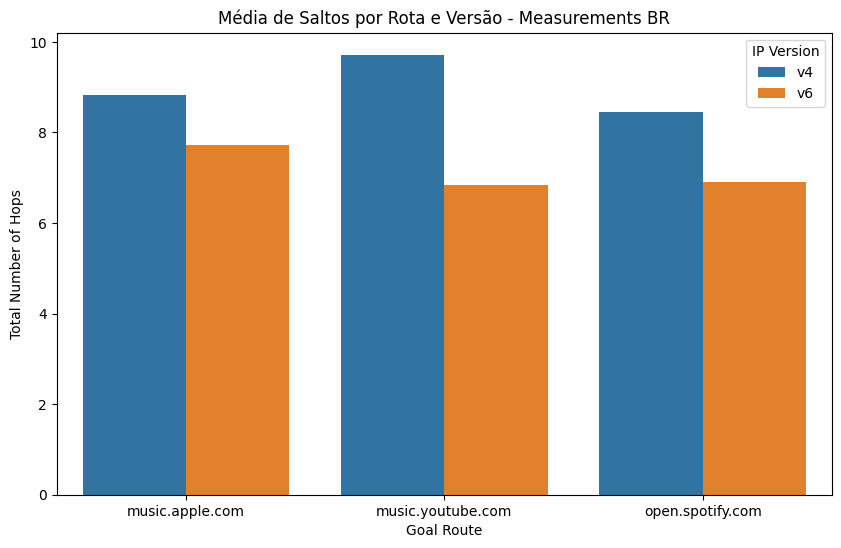

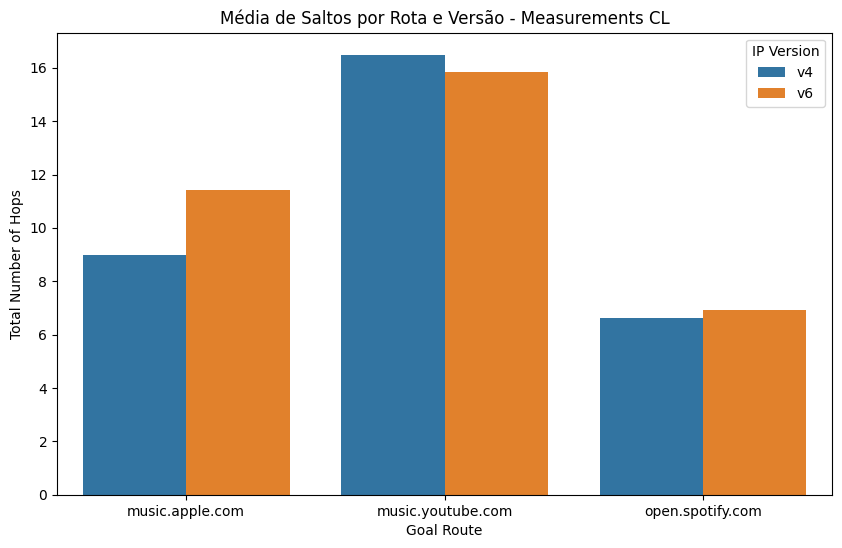

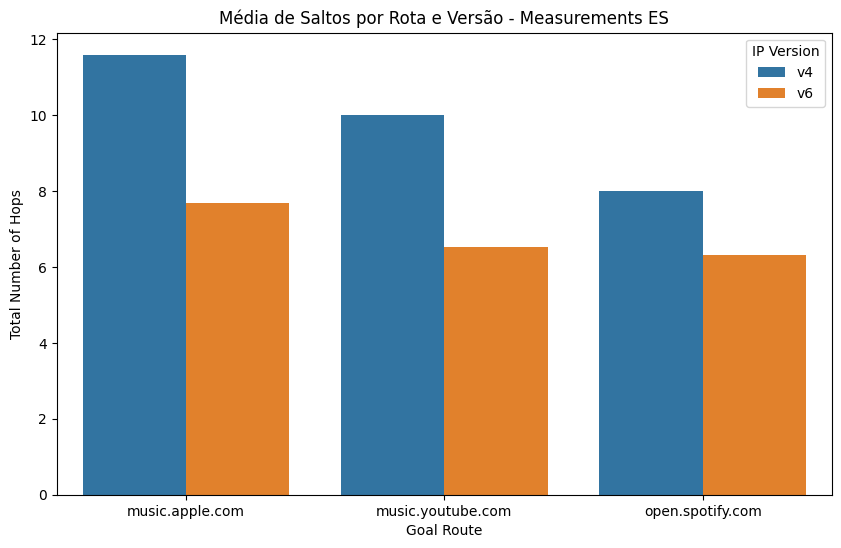

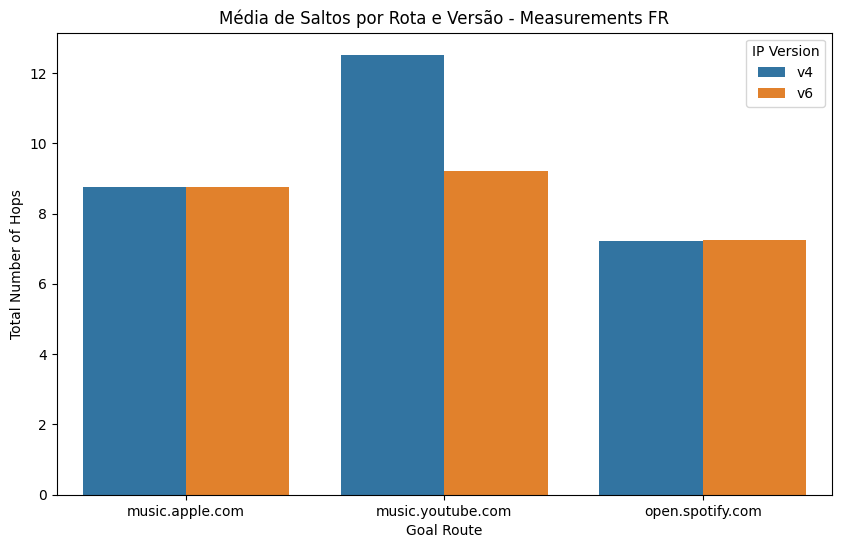

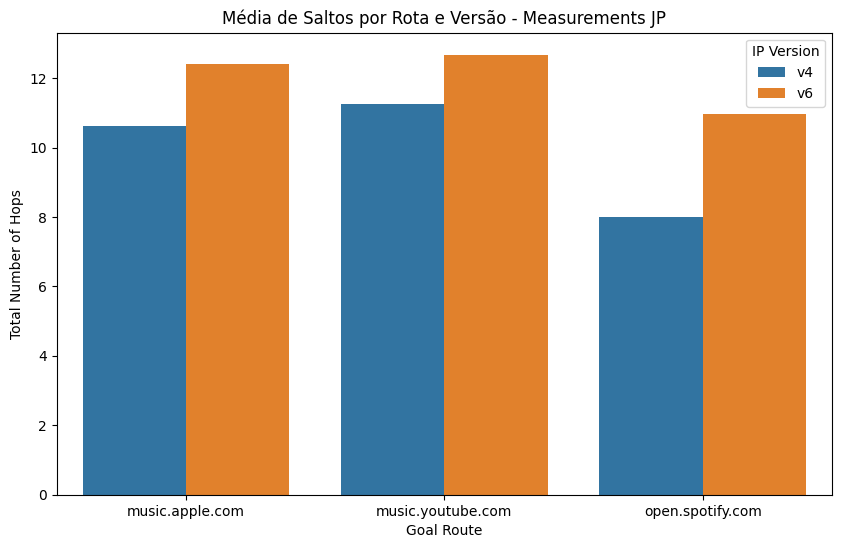

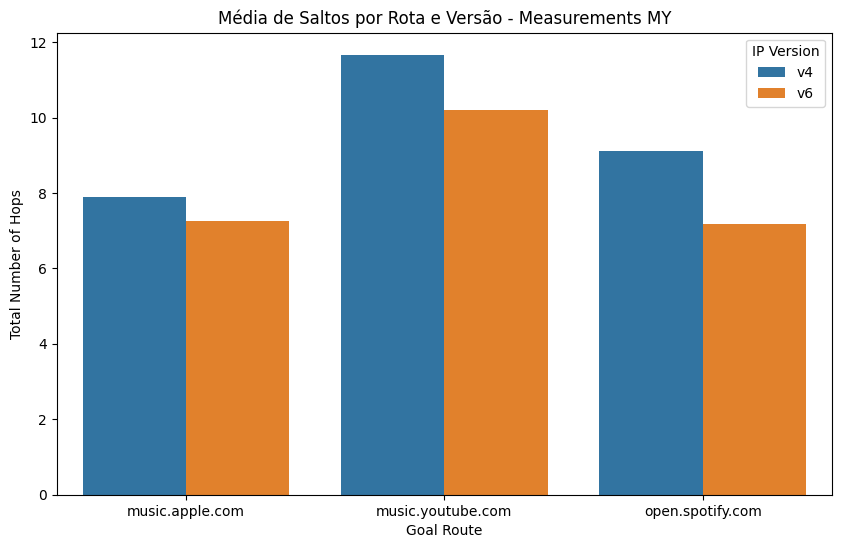

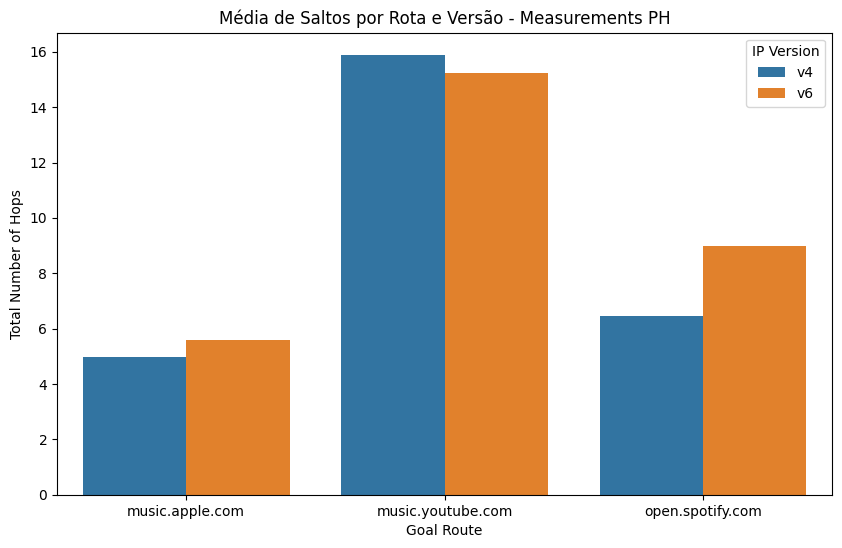

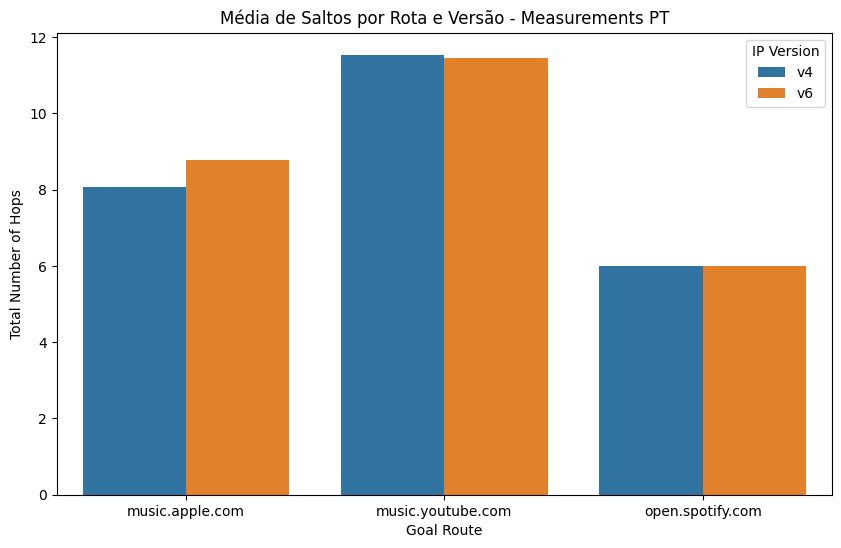

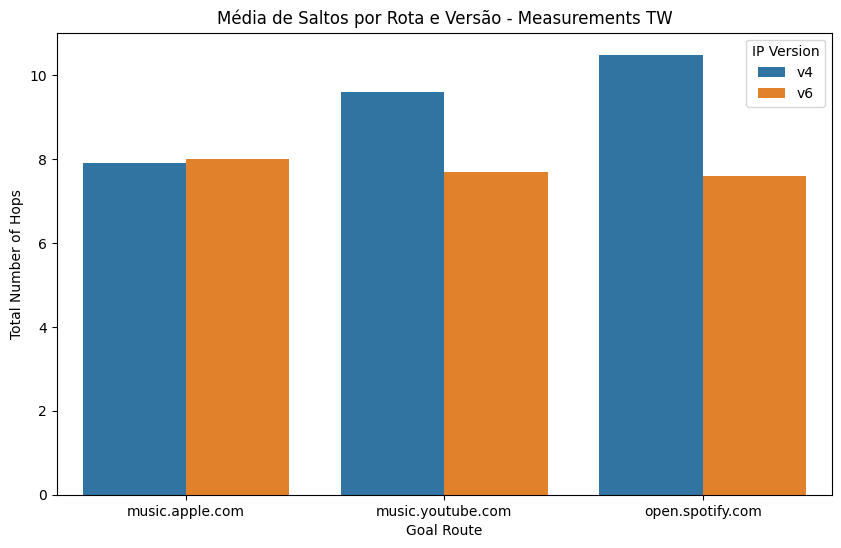

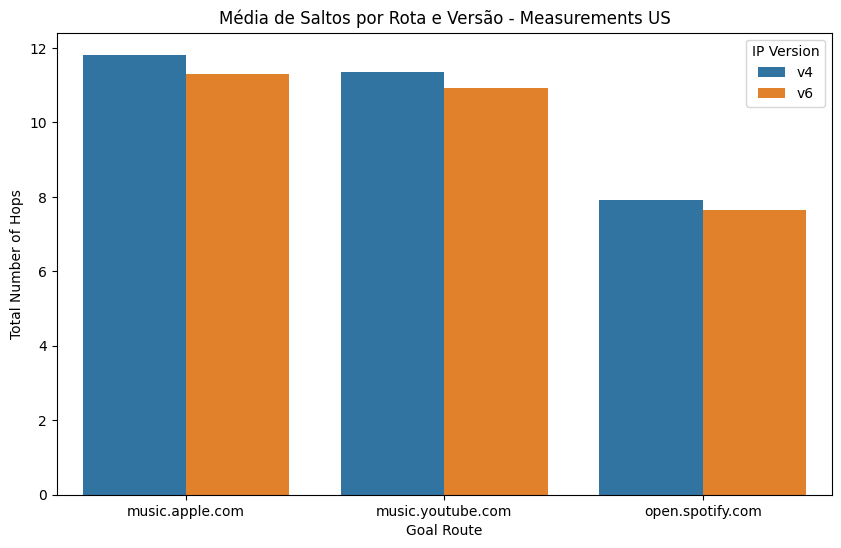

In [ ]:



# Ensure timestamp is in datetime format
dataframe["timestamp"] = pd.to_datetime(dataframe["timestamp"])


# Get unique combinations of 'goal_route' and 'ip_version'
group_combinations = dataframe.groupby(["location" ]).size().reset_index()[["location"]]

ax = None
# Loop through each group combination and create a separate plot
for _, group in group_combinations.iterrows():

    location =  group["location"]

    # Filter the dataframe for the current combination
    filtered_df = dataframe[(dataframe['location'] == location)]

    filtered_df = filtered_df.sort_values("timestamp")
    graph_of_hops_for(filtered_df, "Média de Saltos por Rota e Versão - Measurements " + location,
                      average=True,)



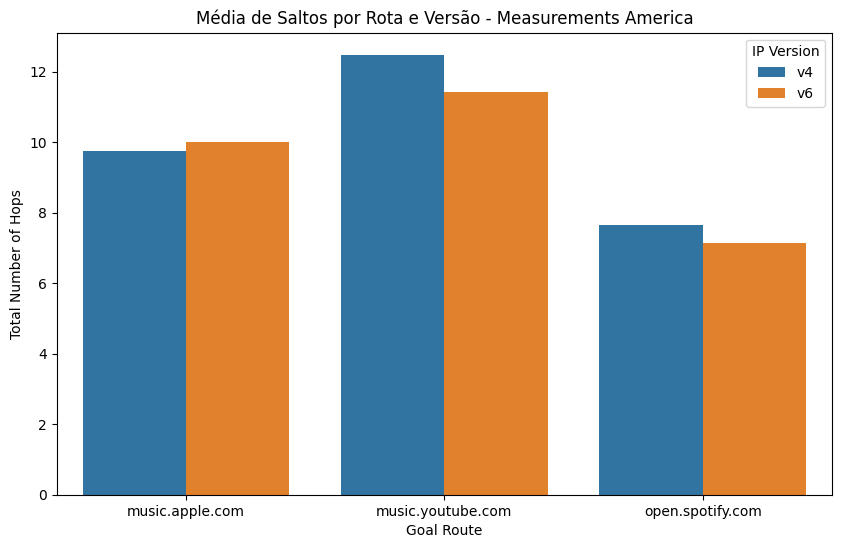

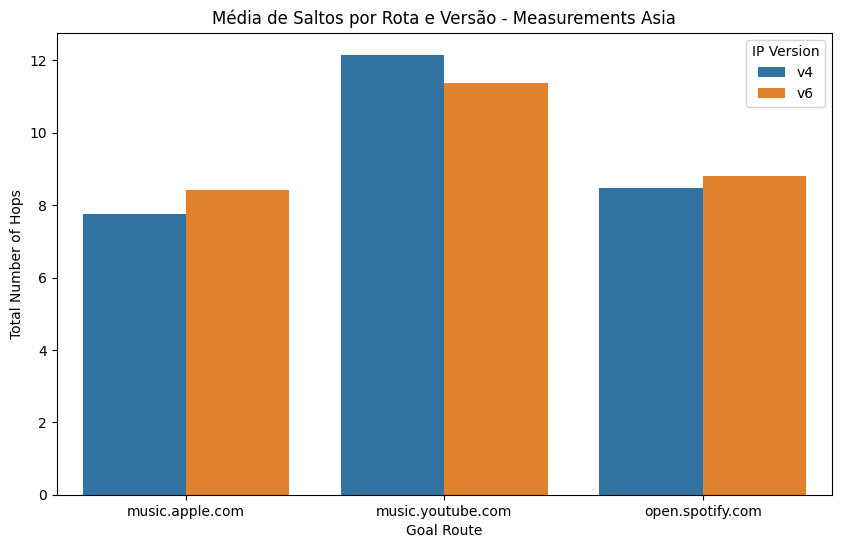

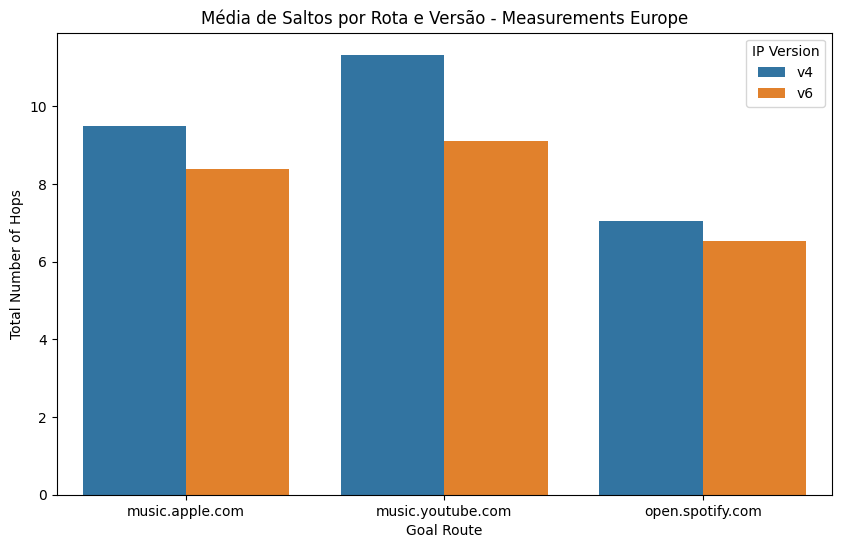

In [ ]:



# Ensure timestamp is in datetime format
dataframe["timestamp"] = pd.to_datetime(dataframe["timestamp"])


# Get unique combinations of 'goal_route' and 'ip_version'
group_combinations = dataframe.groupby(["continent" ]).size().reset_index()[["continent"]]

# Loop through each group combination and create a separate plot
for _, group in group_combinations.iterrows():

    continent =  group["continent"]

    # Filter the dataframe for the current combination
    filtered_df = dataframe[(dataframe['continent'] == continent)]

    filtered_df = filtered_df.sort_values("timestamp")
    graph_of_hops_for(filtered_df, "Média de Saltos por Rota e Versão - Measurements " + continent,
                      average=True)



<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


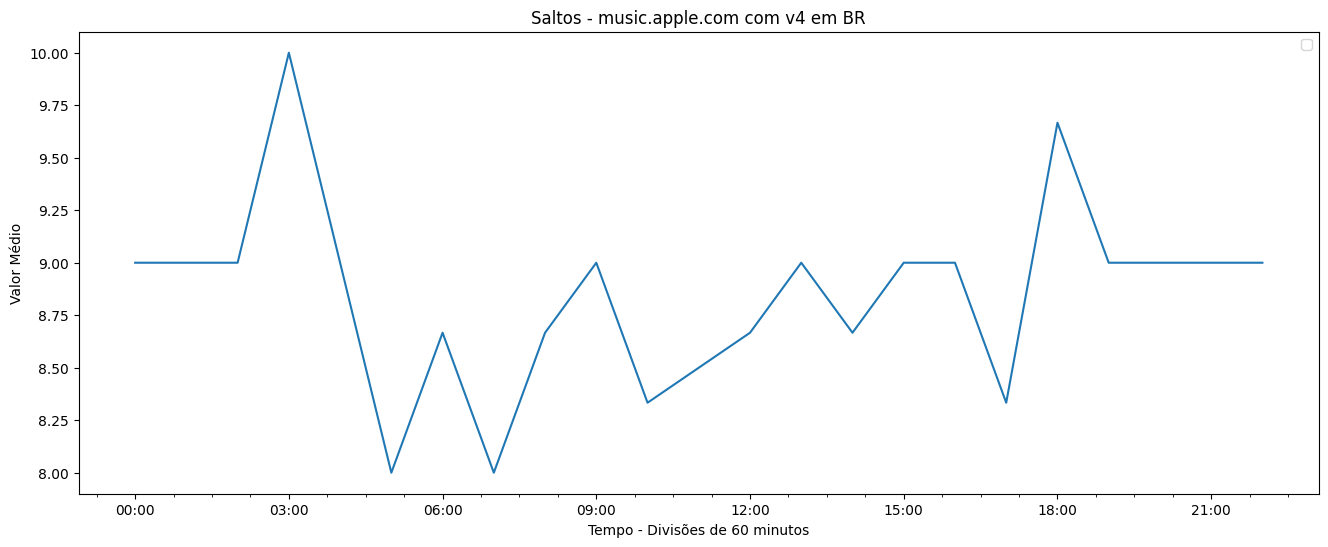

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


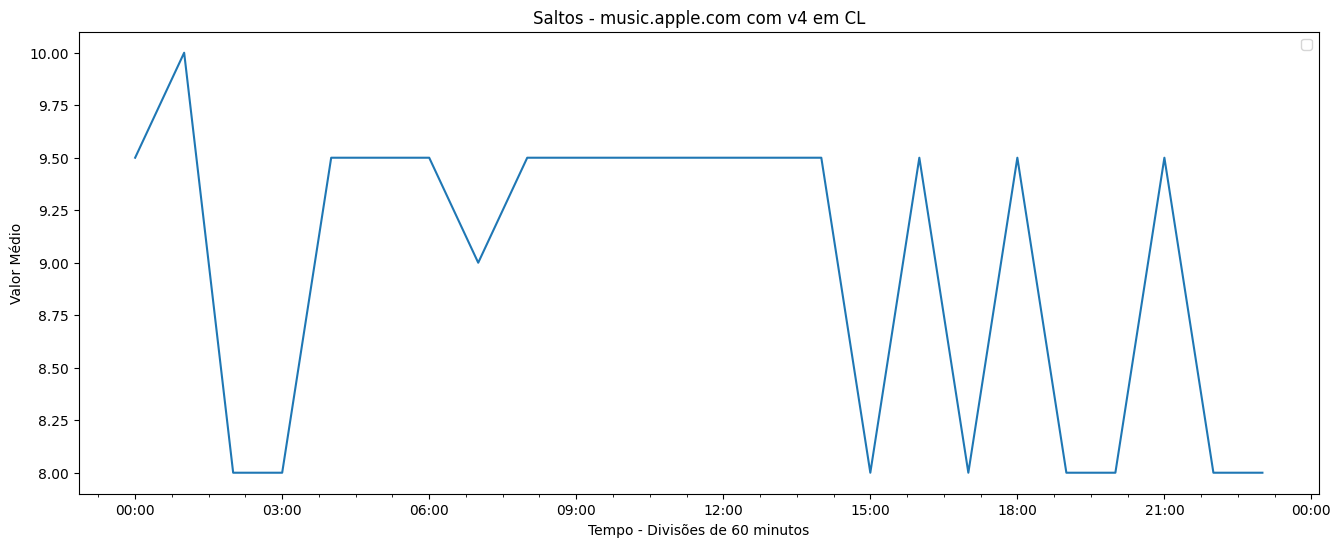

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


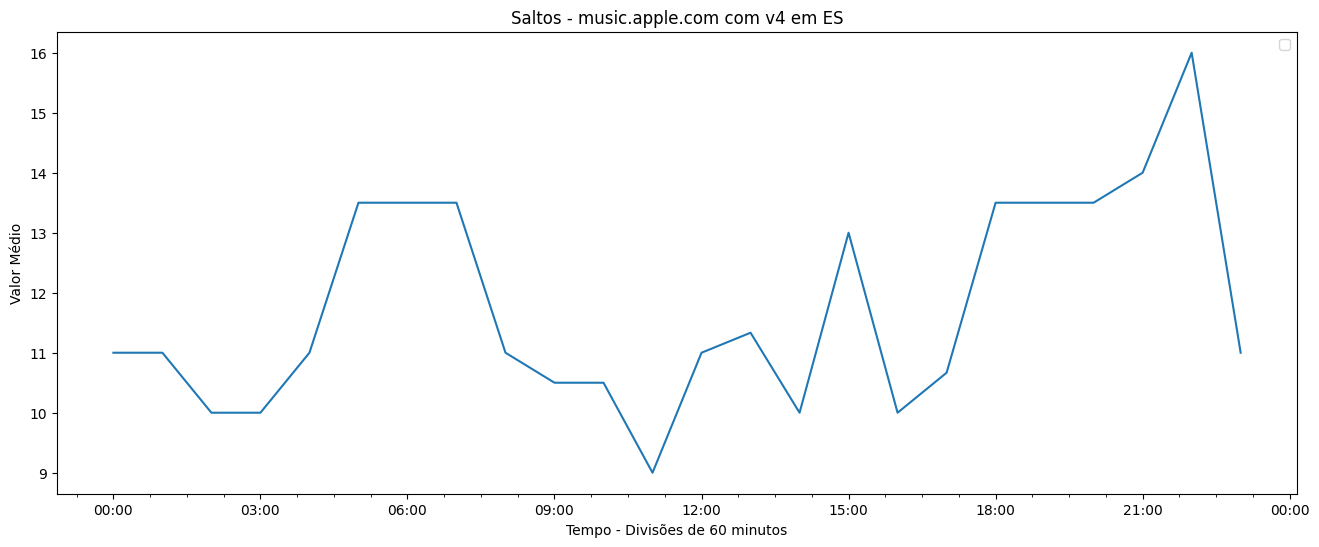

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


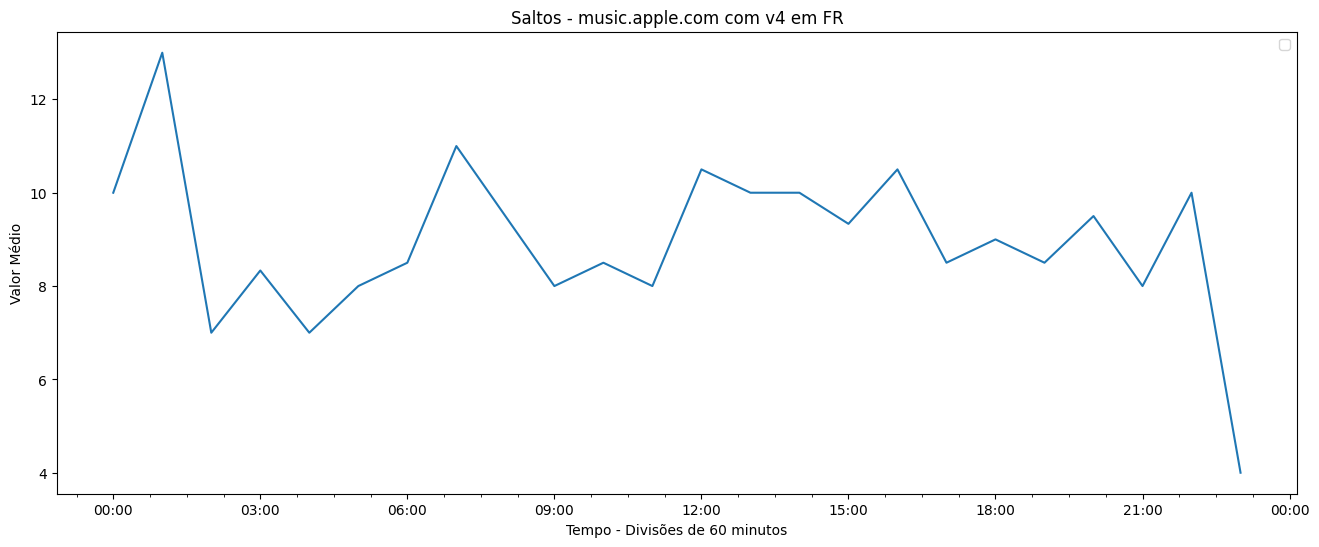

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


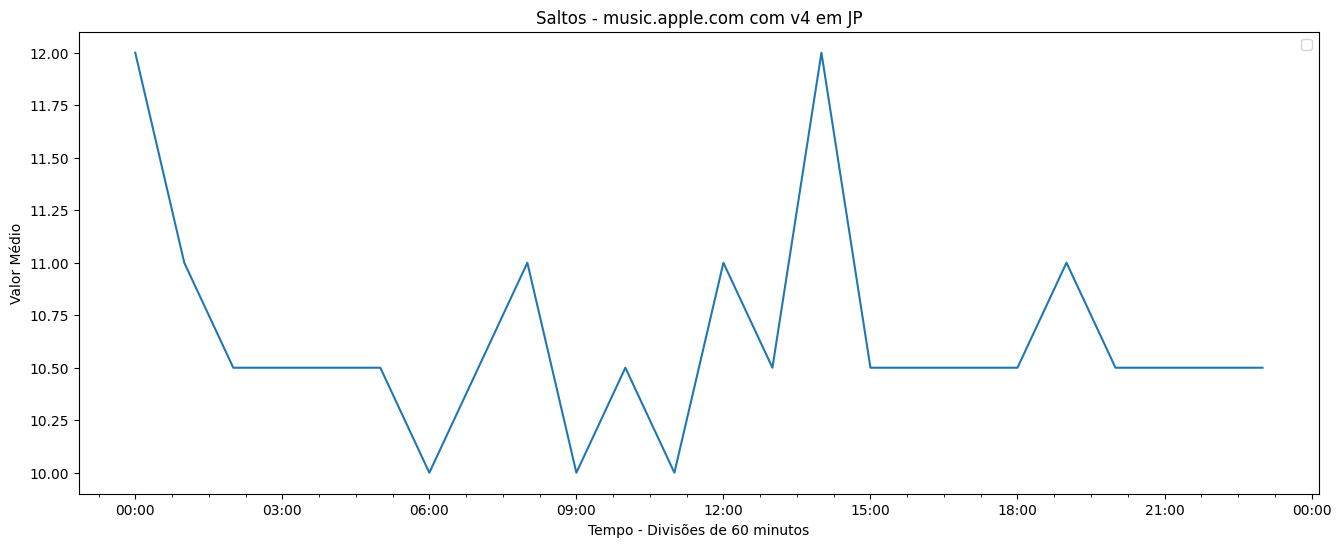

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


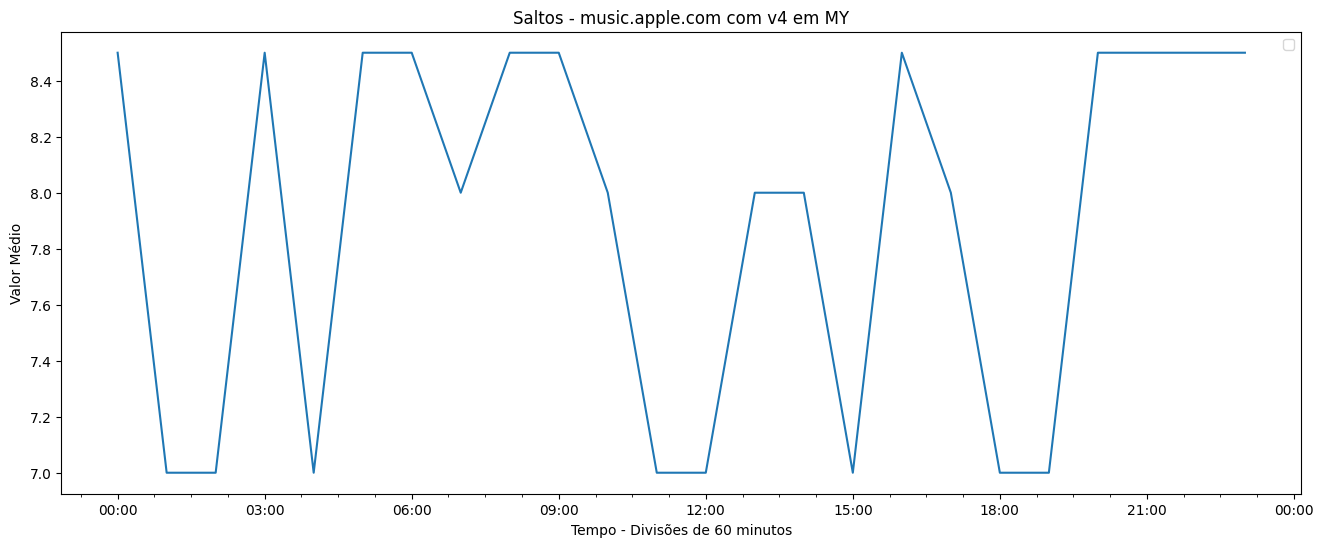

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


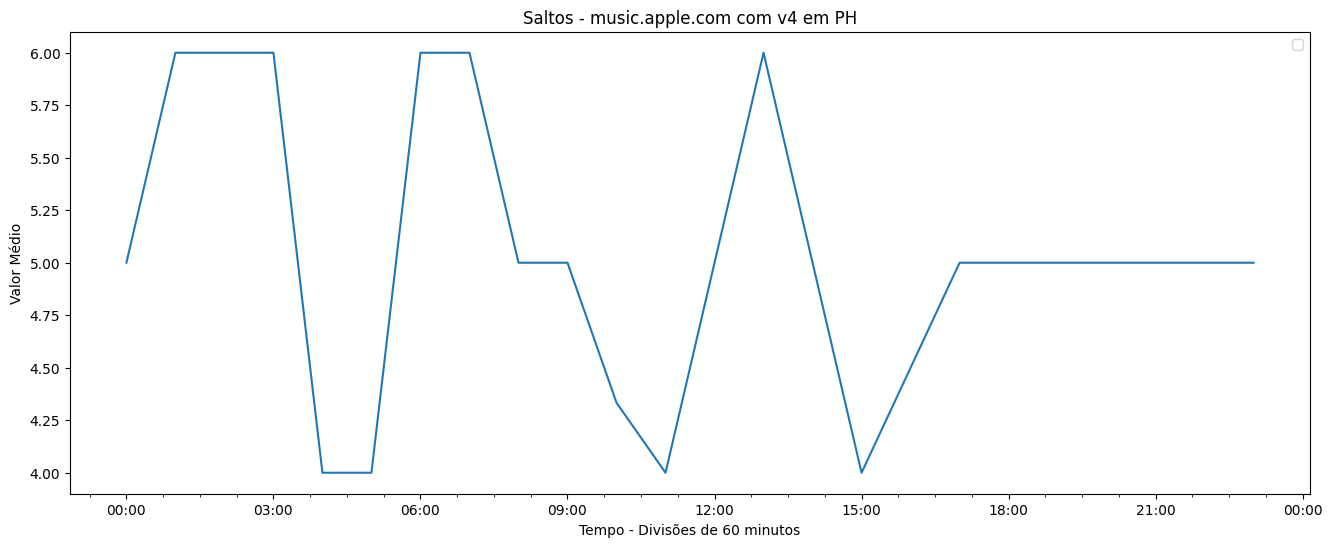

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


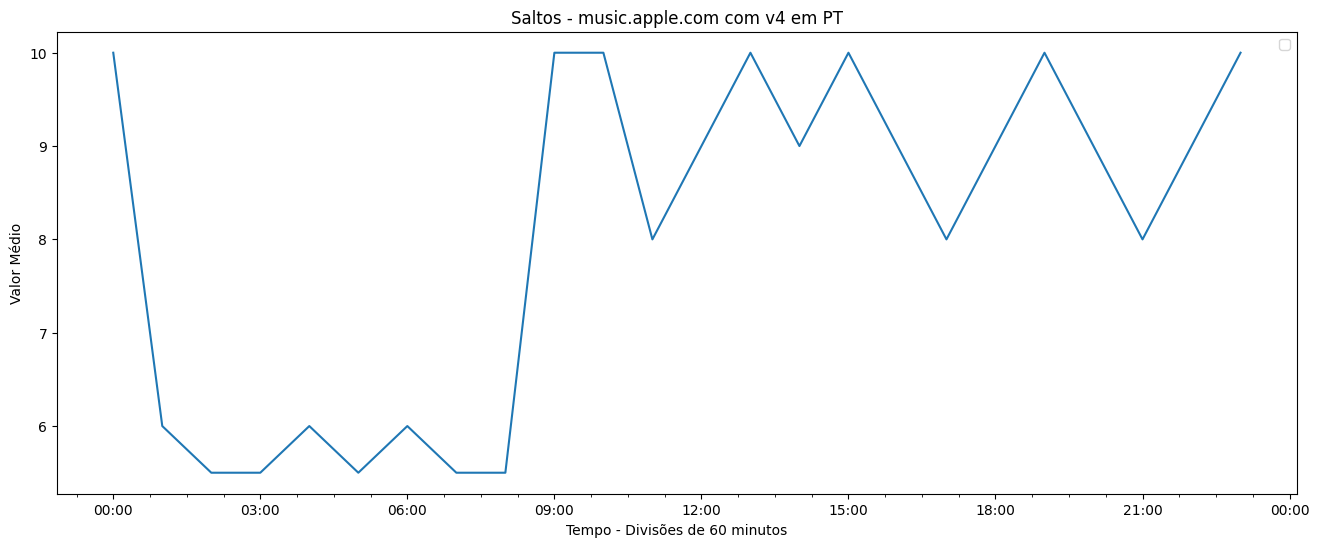

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


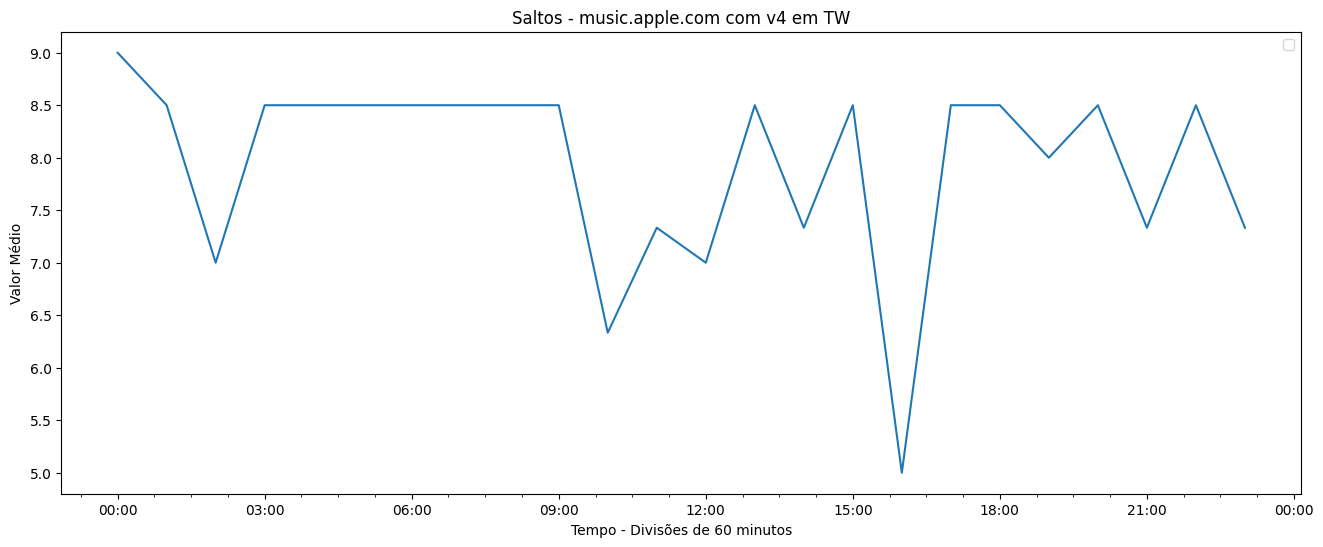

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


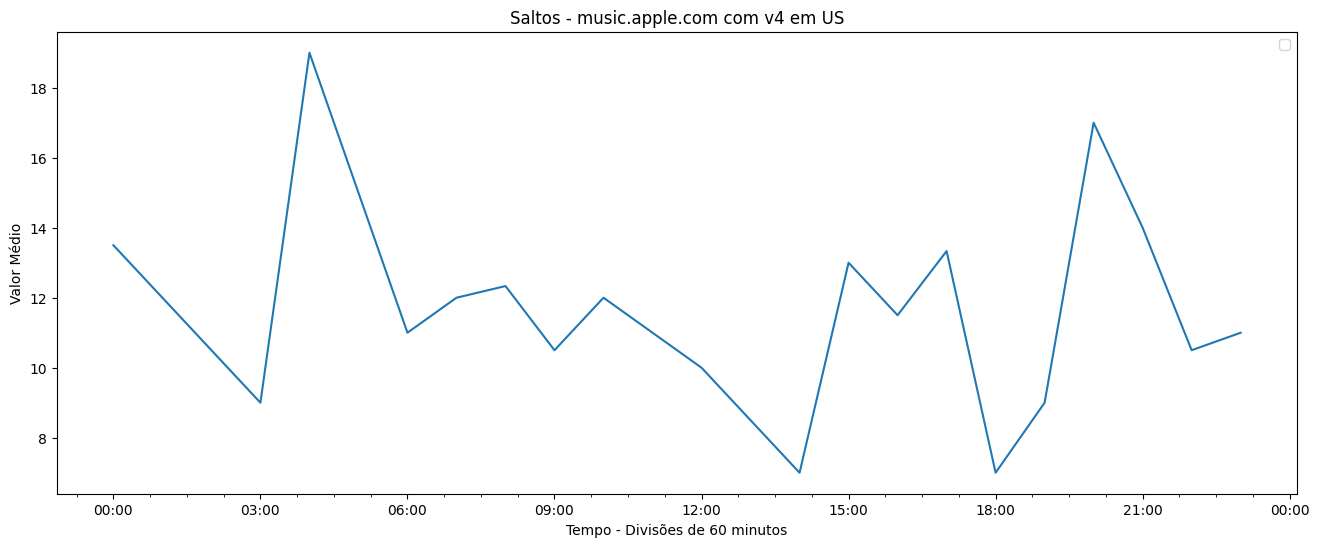

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


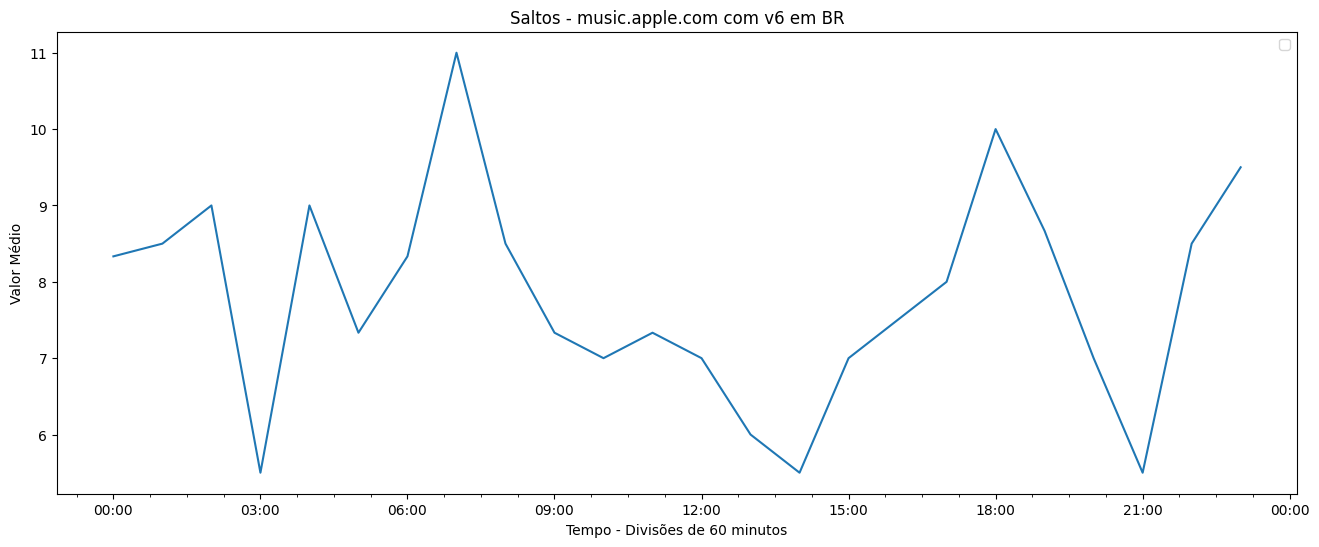

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


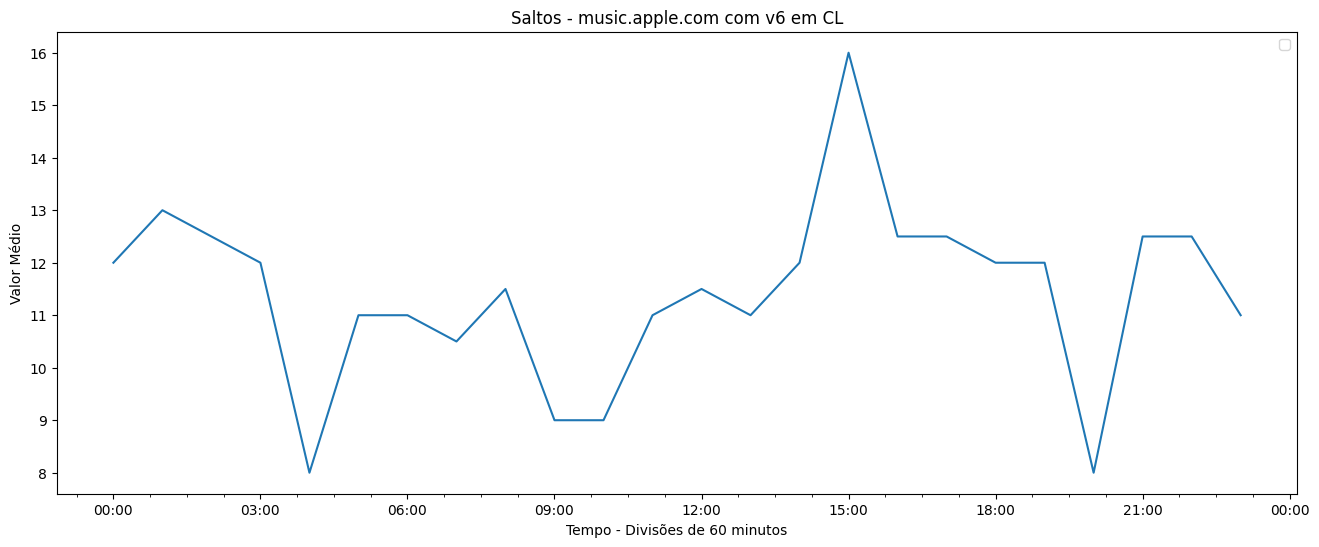

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


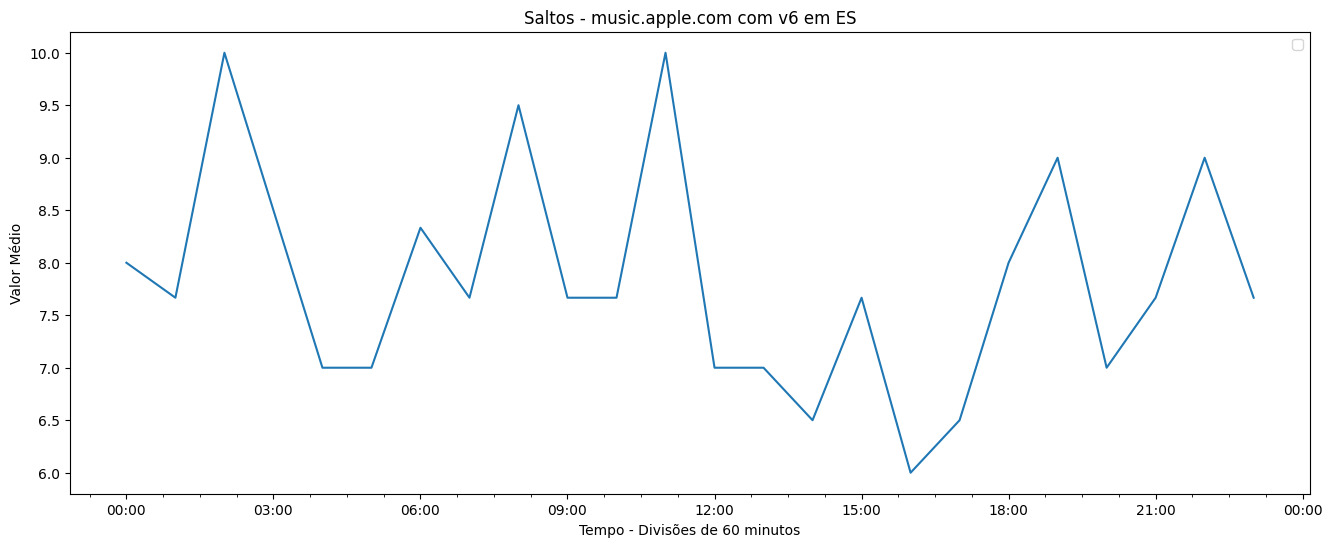

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


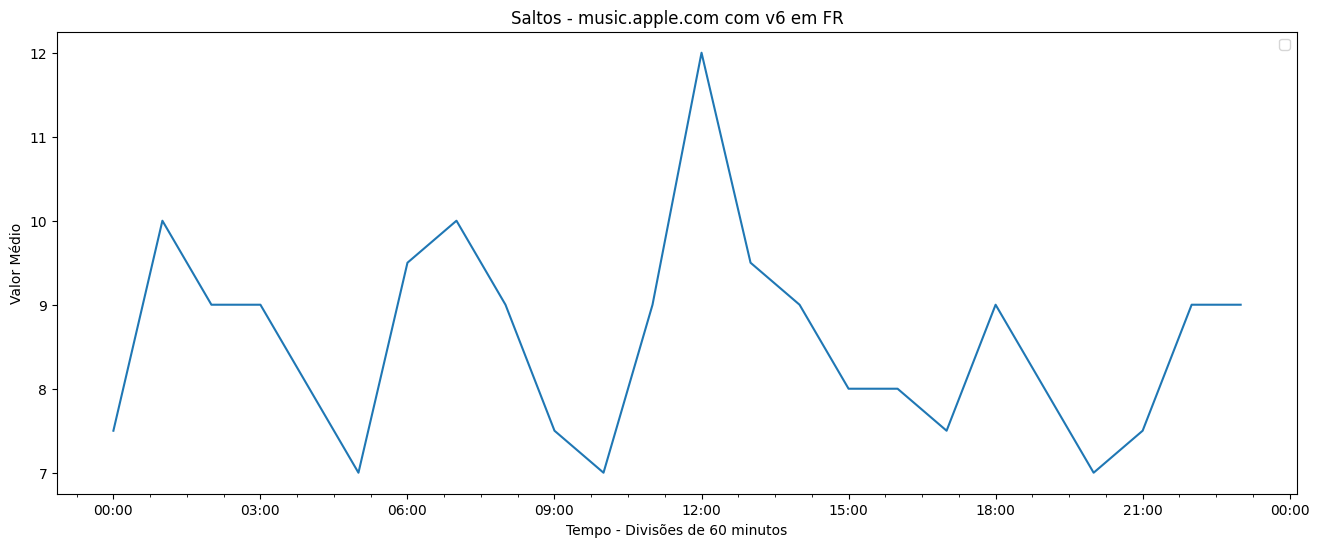

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


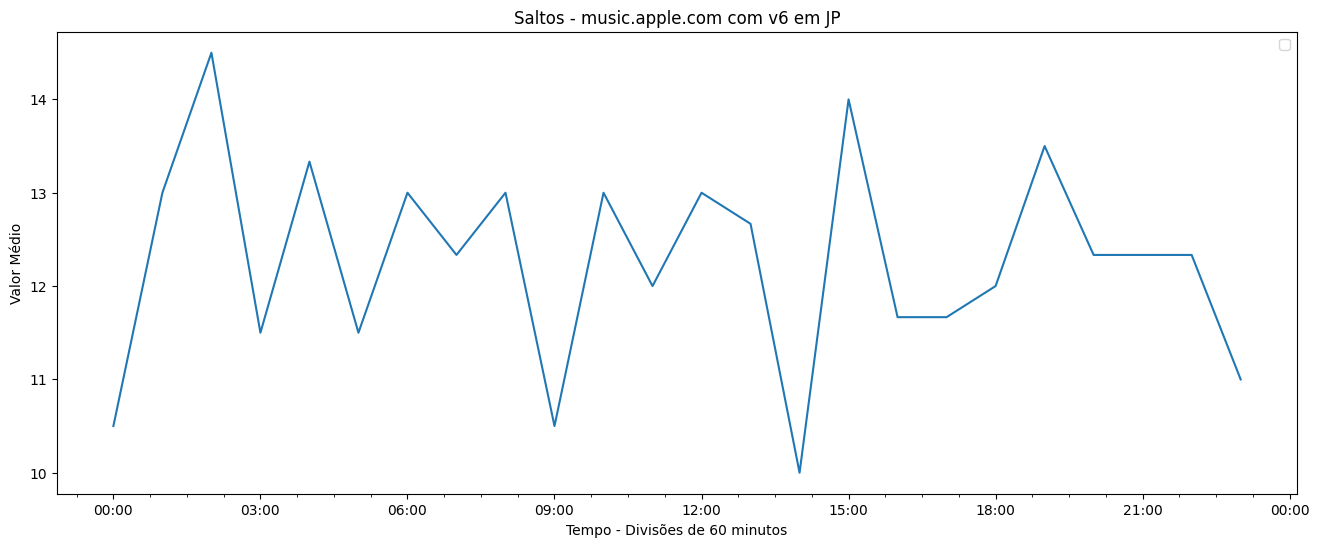

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


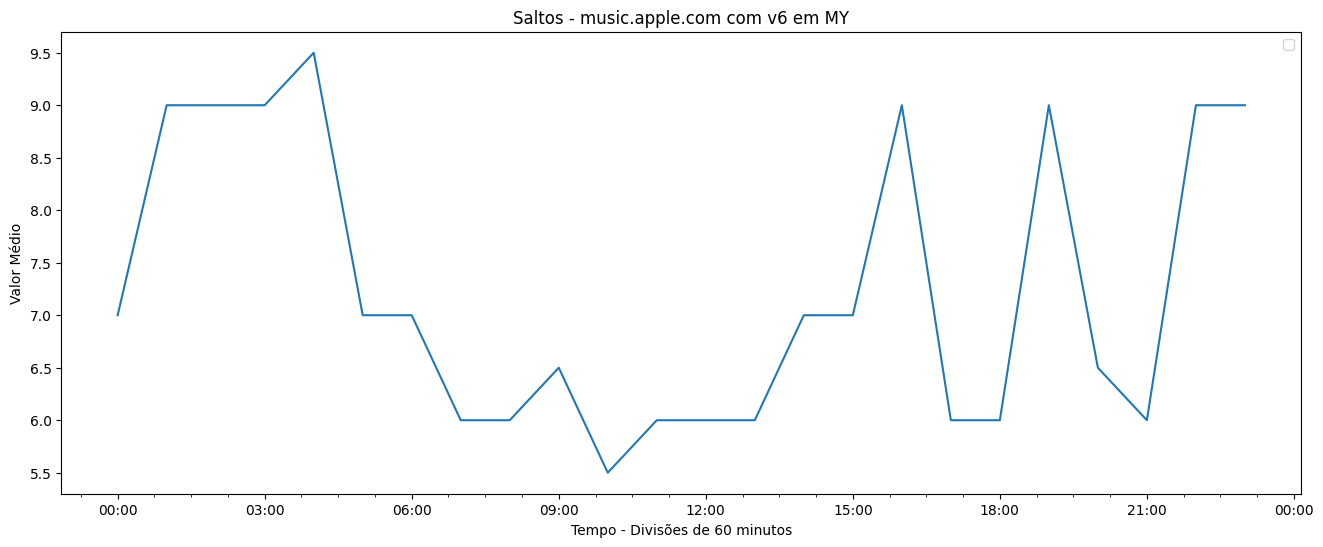

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


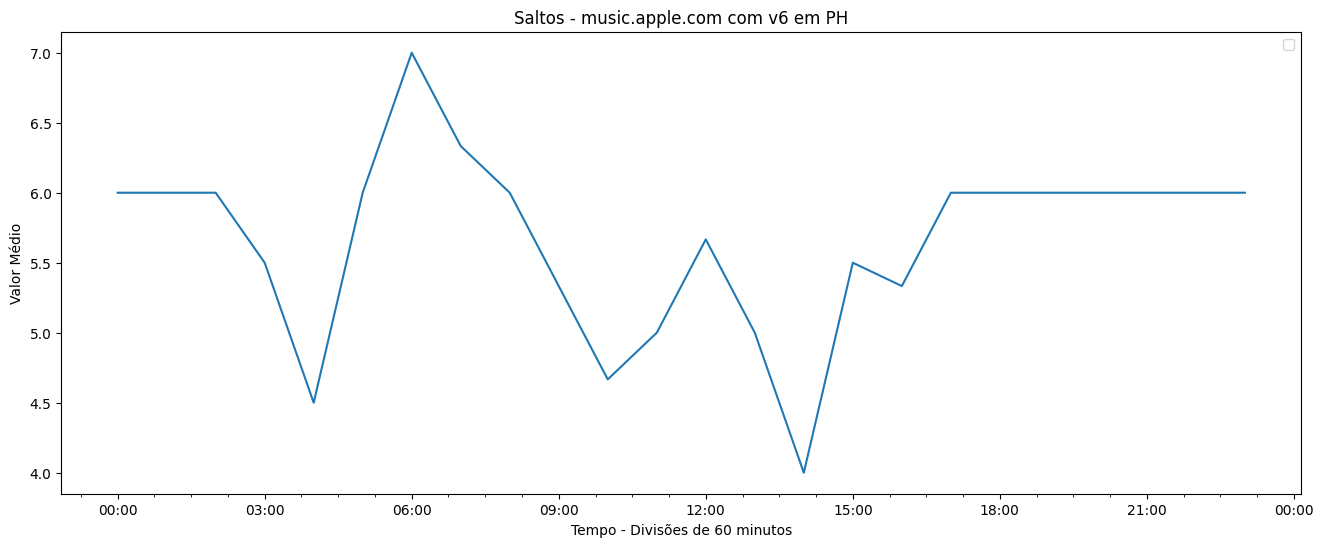

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


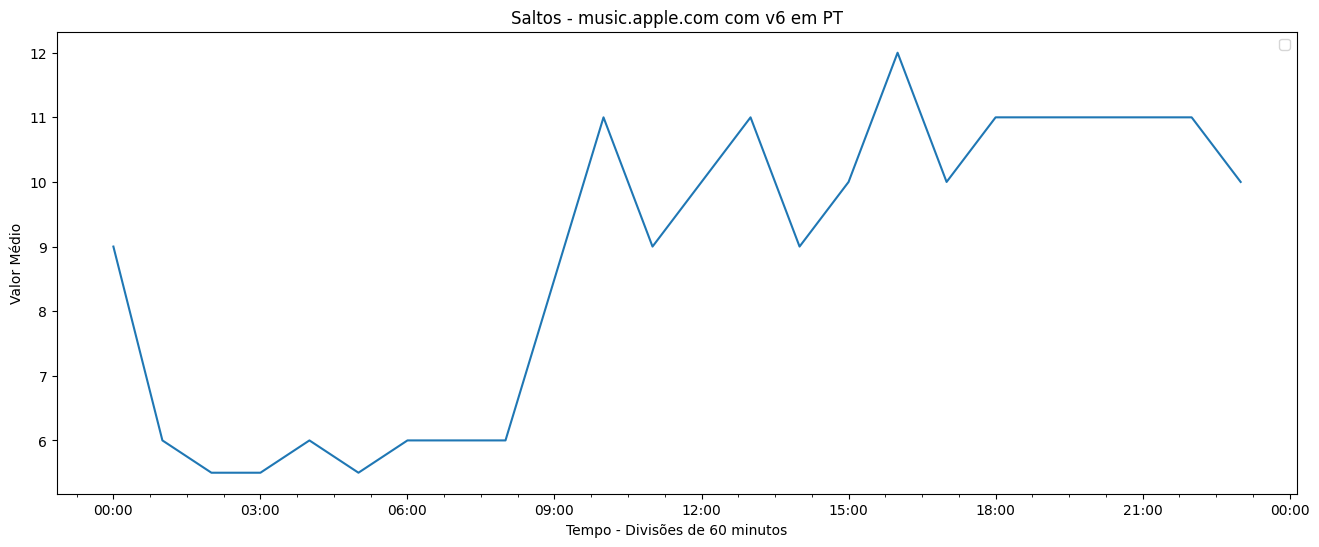

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


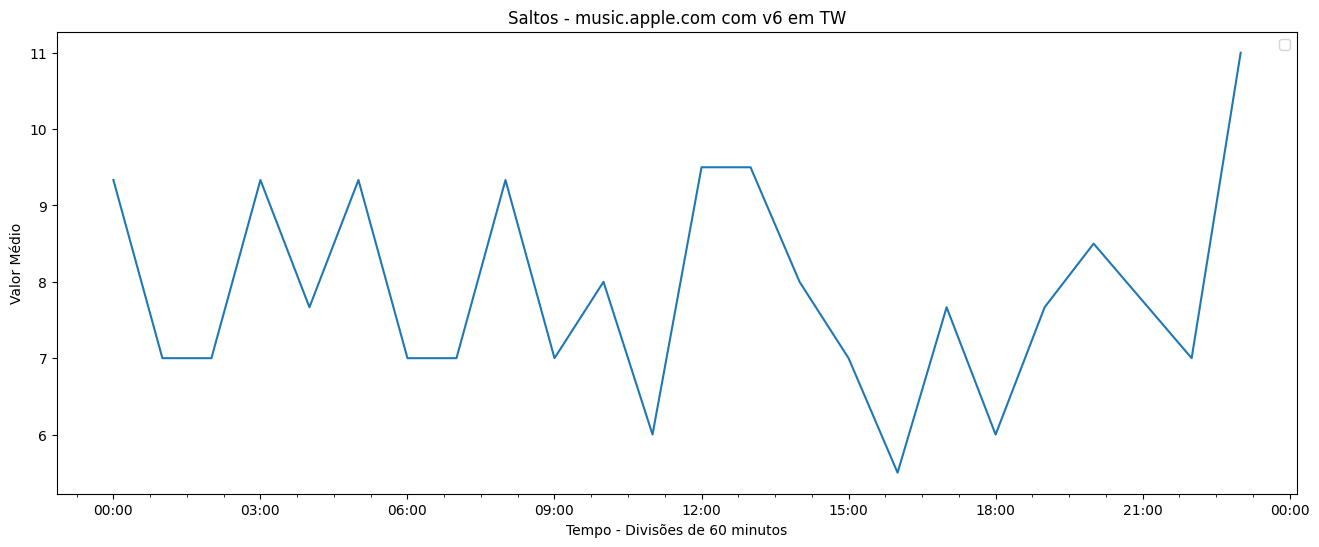

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


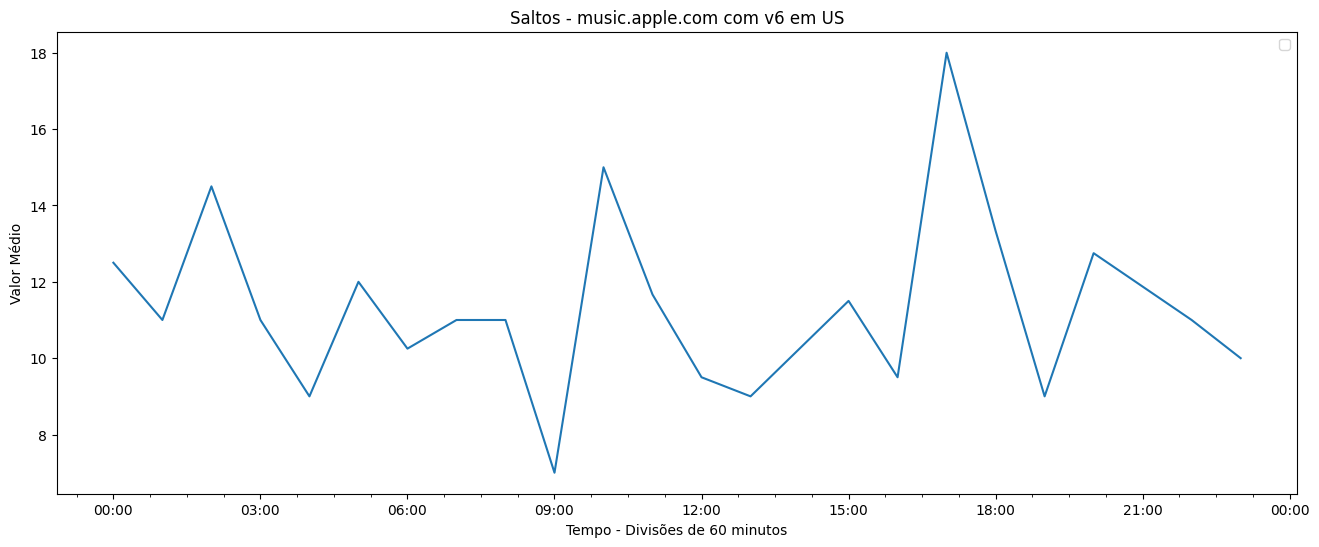

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


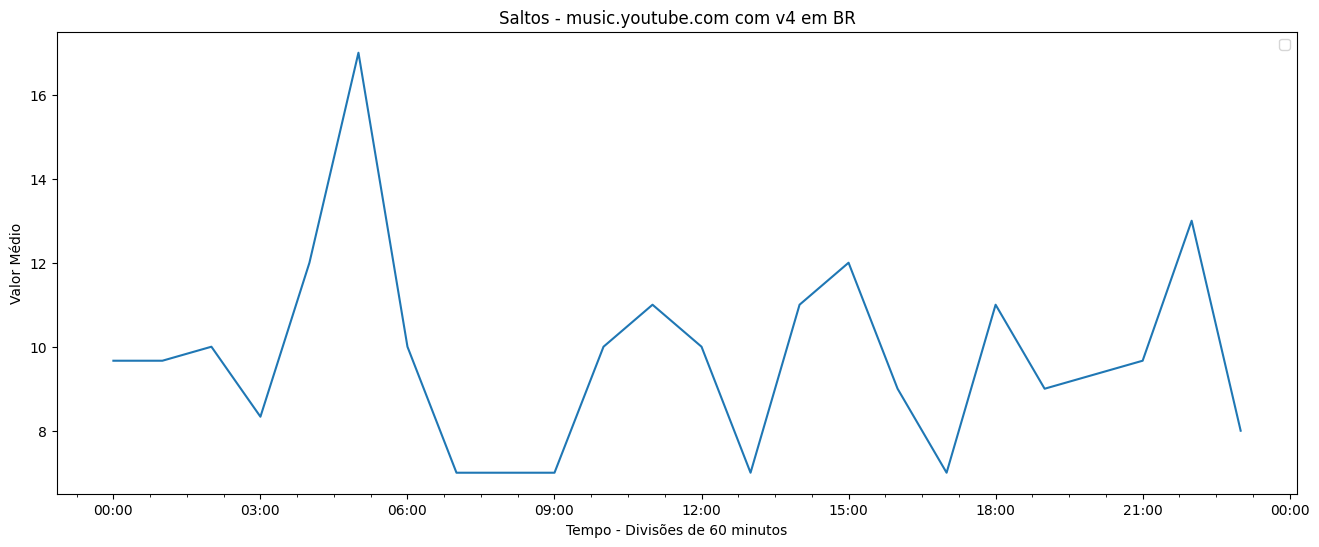

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


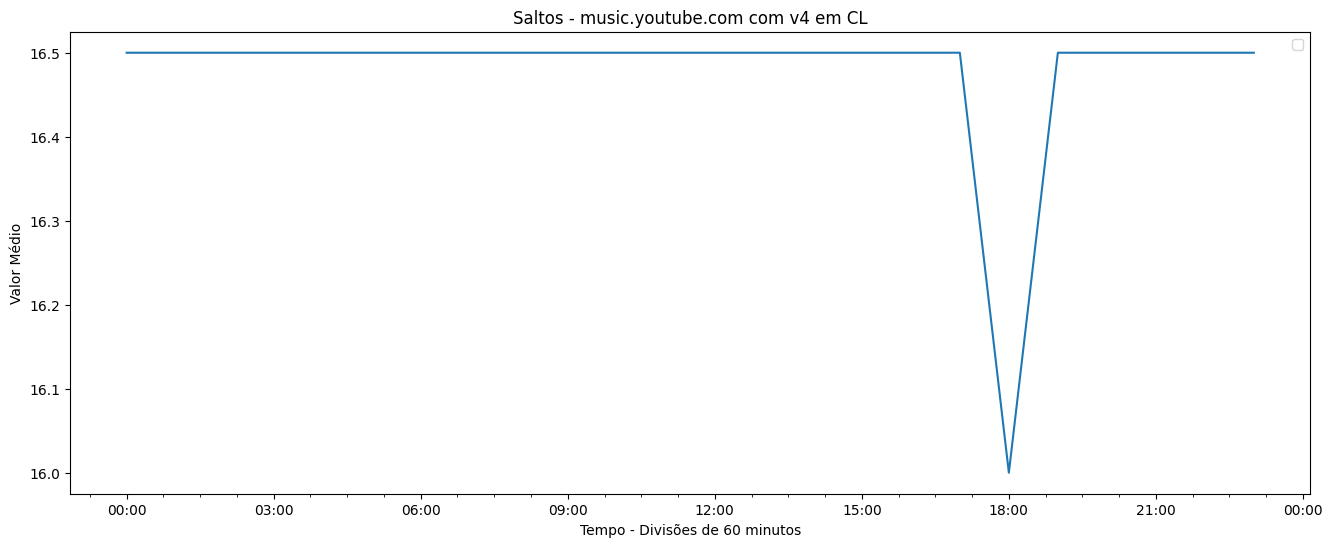

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


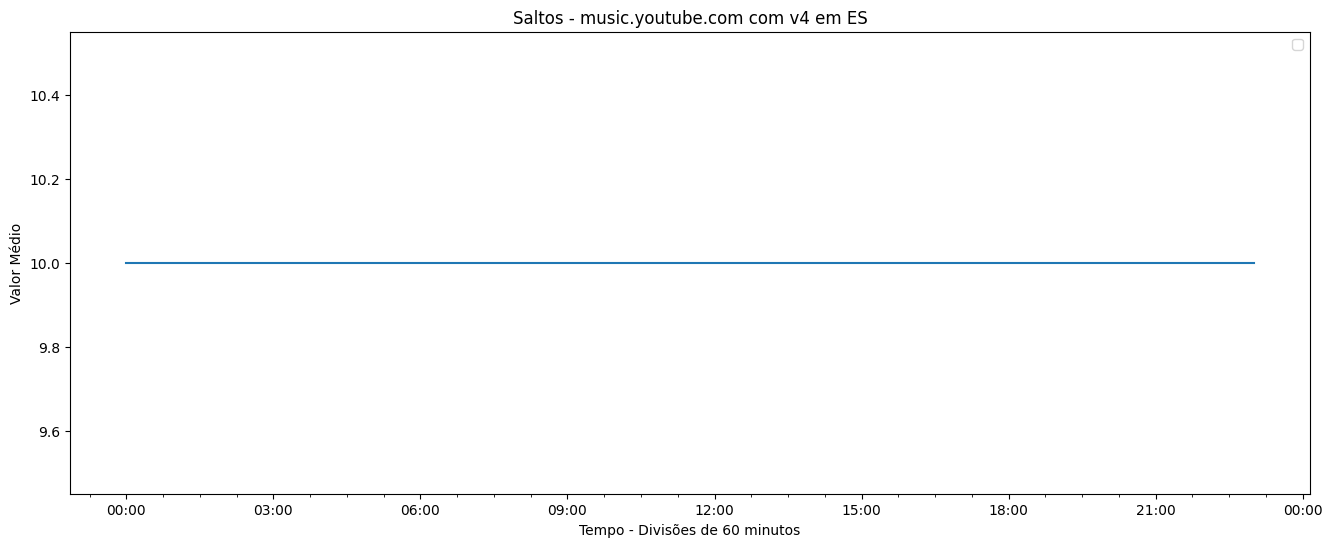

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


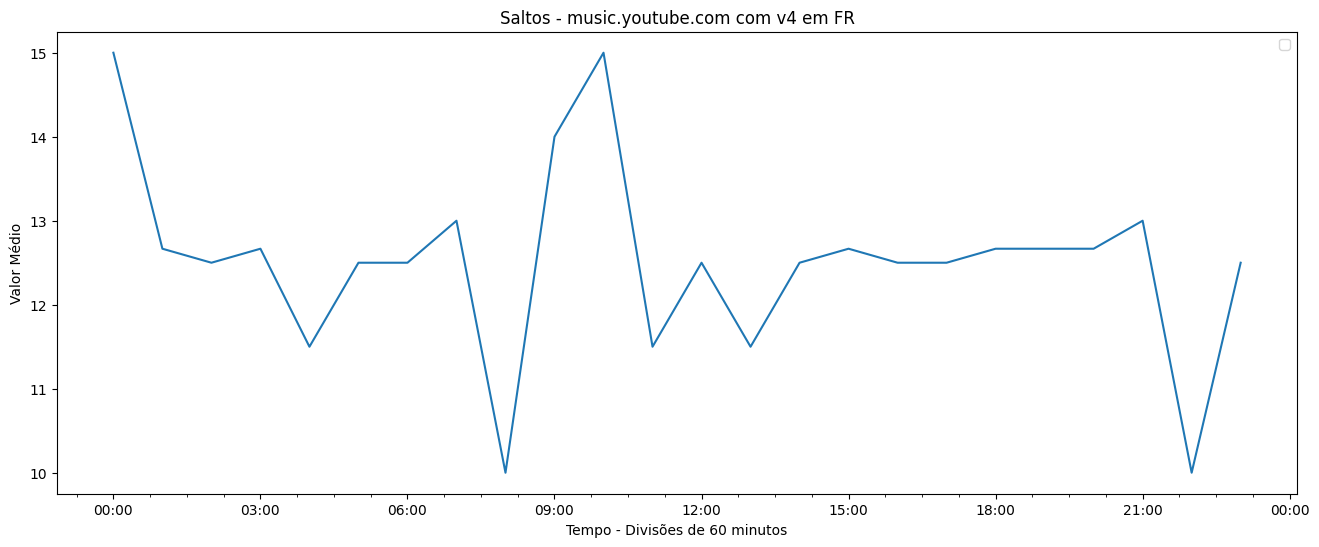

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


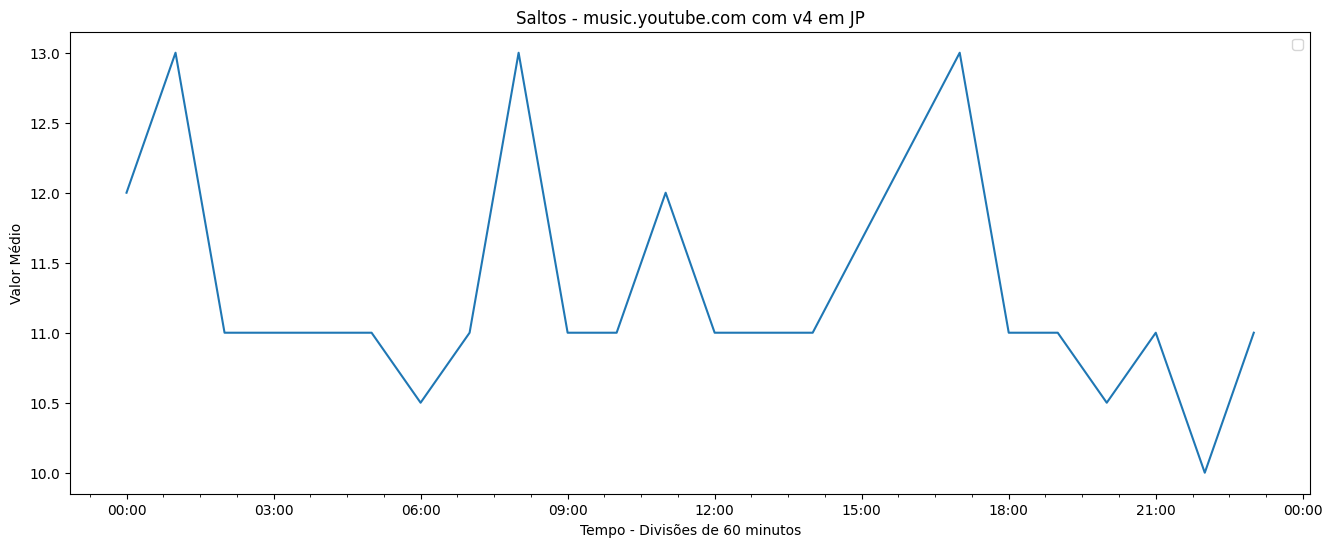

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


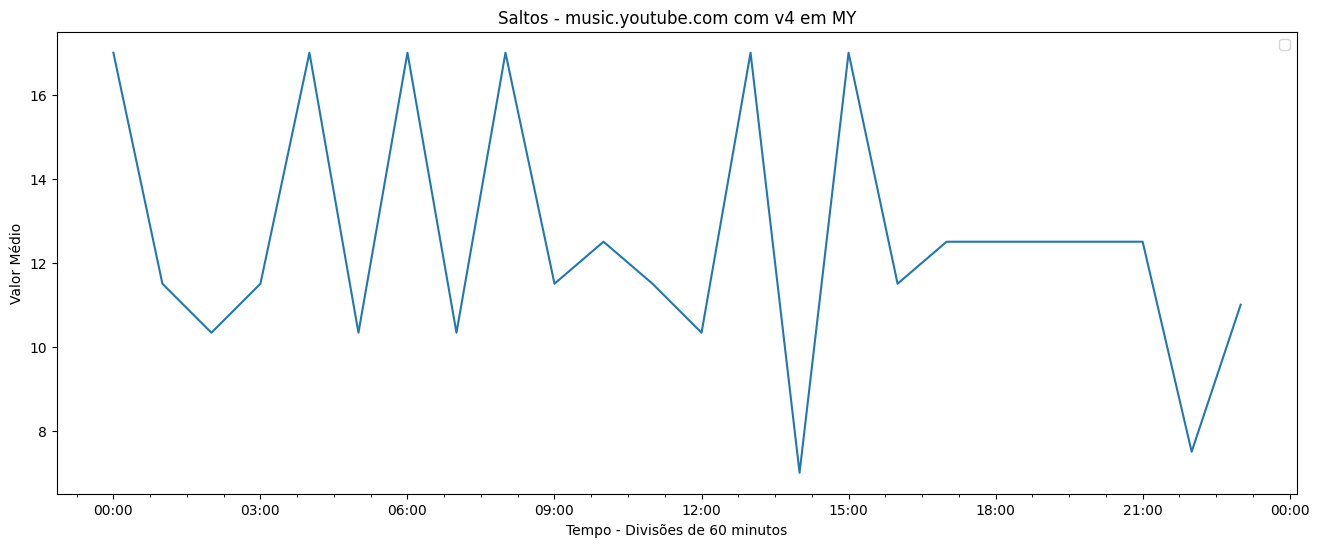

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


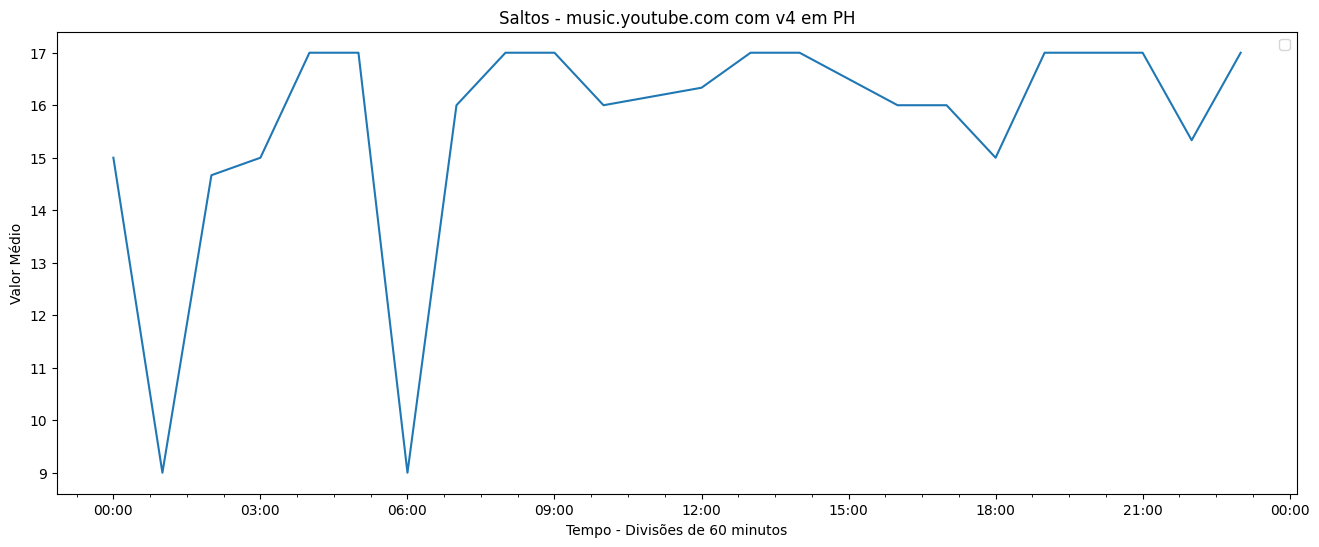

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


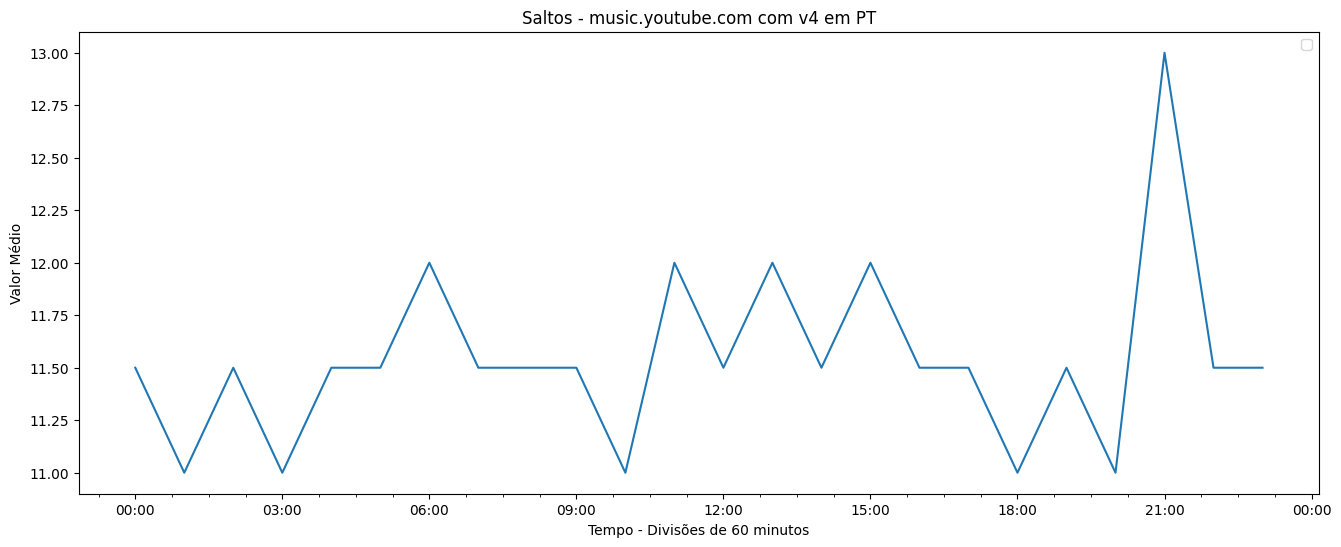

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


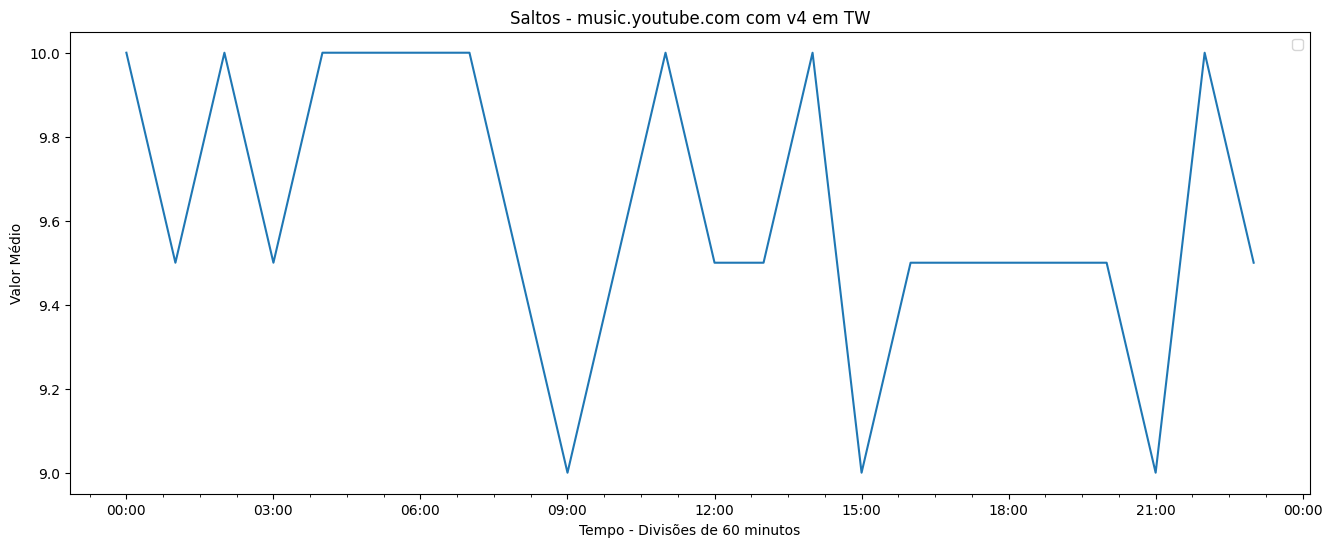

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


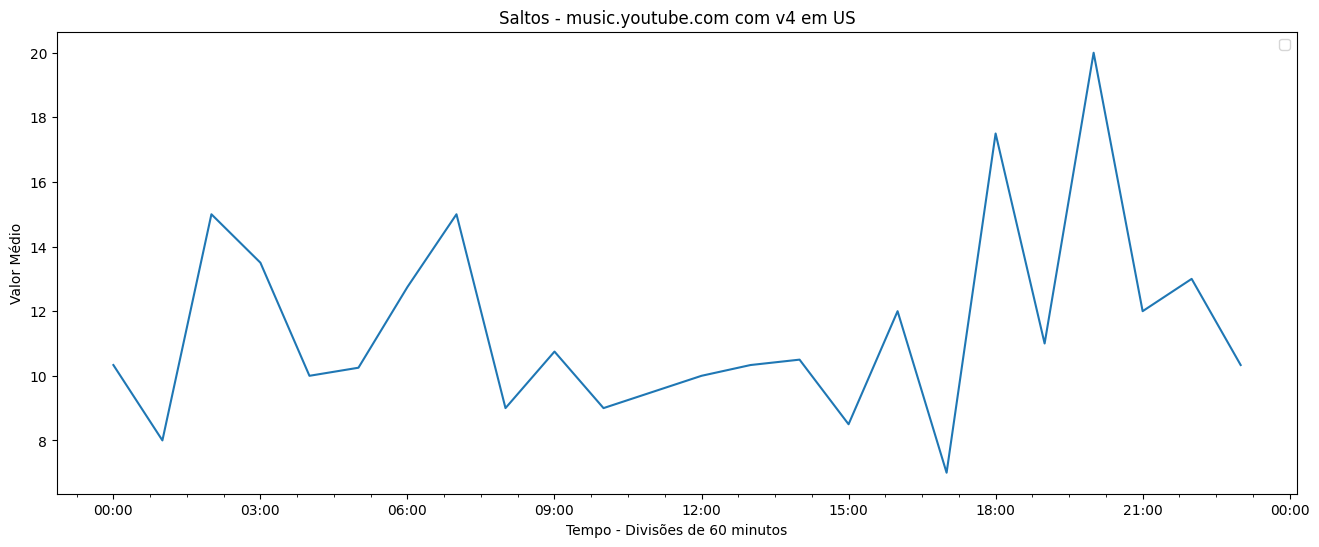

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


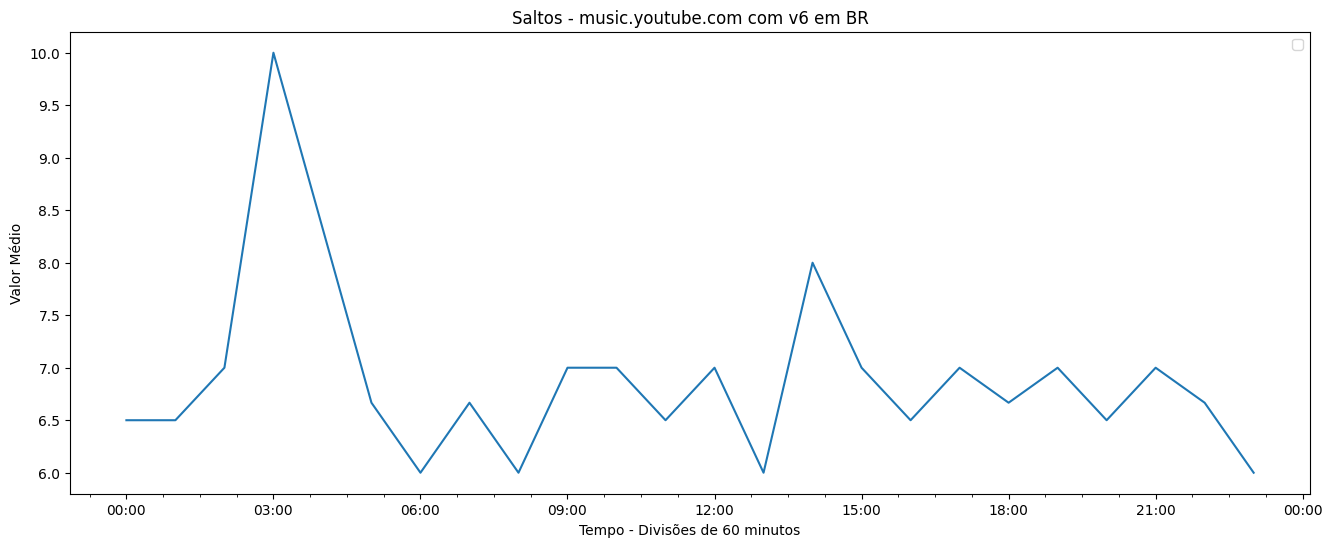

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


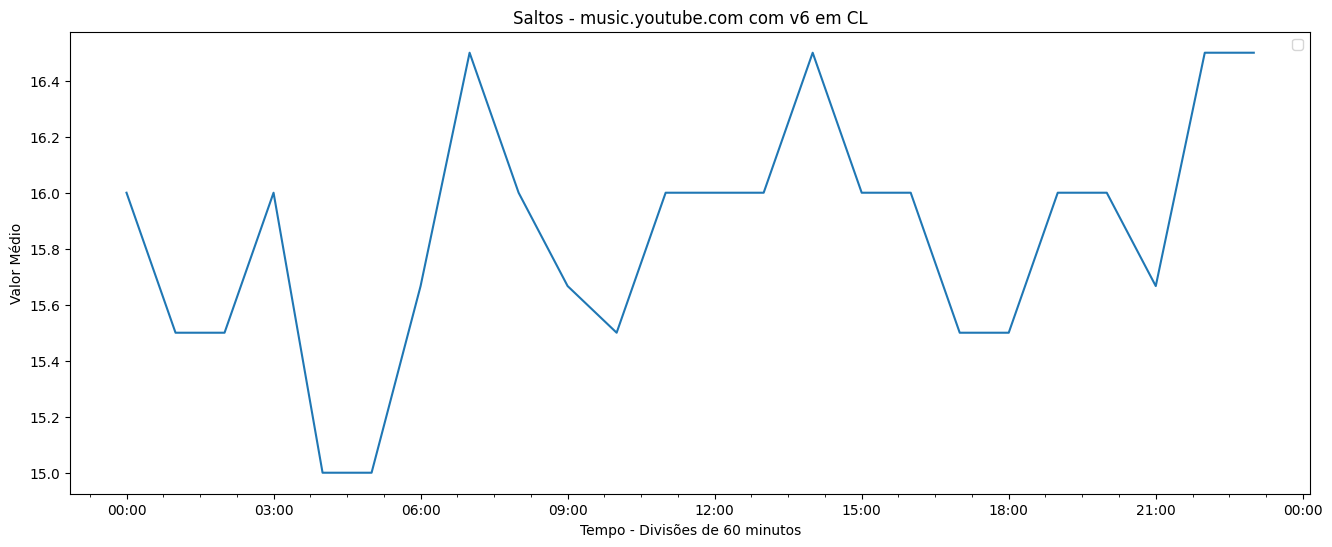

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


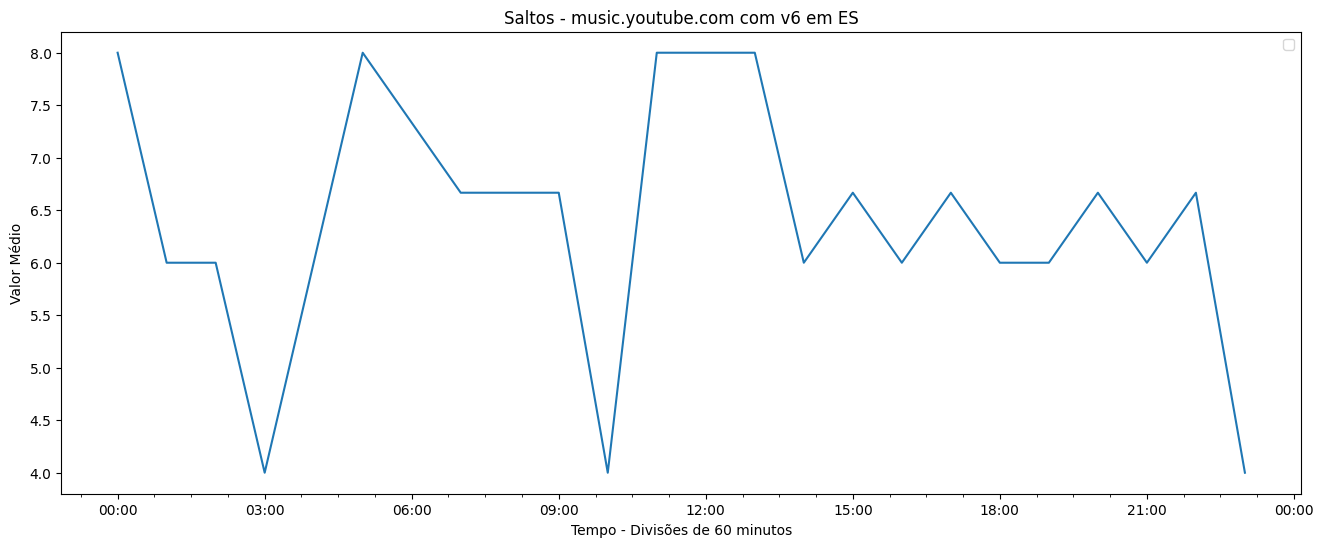

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


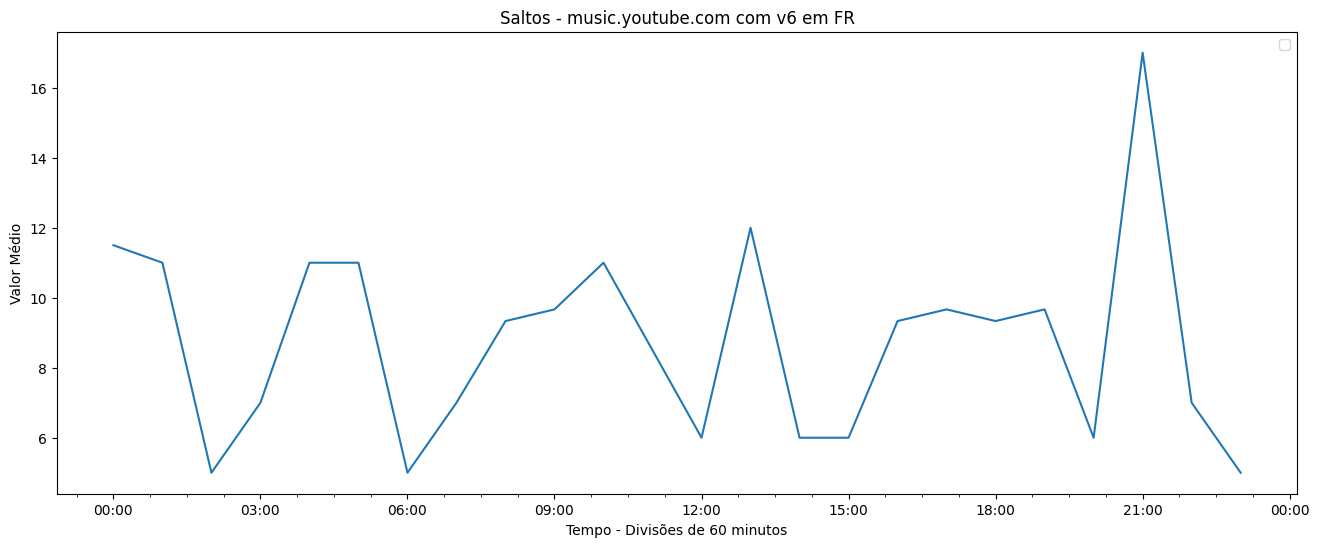

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


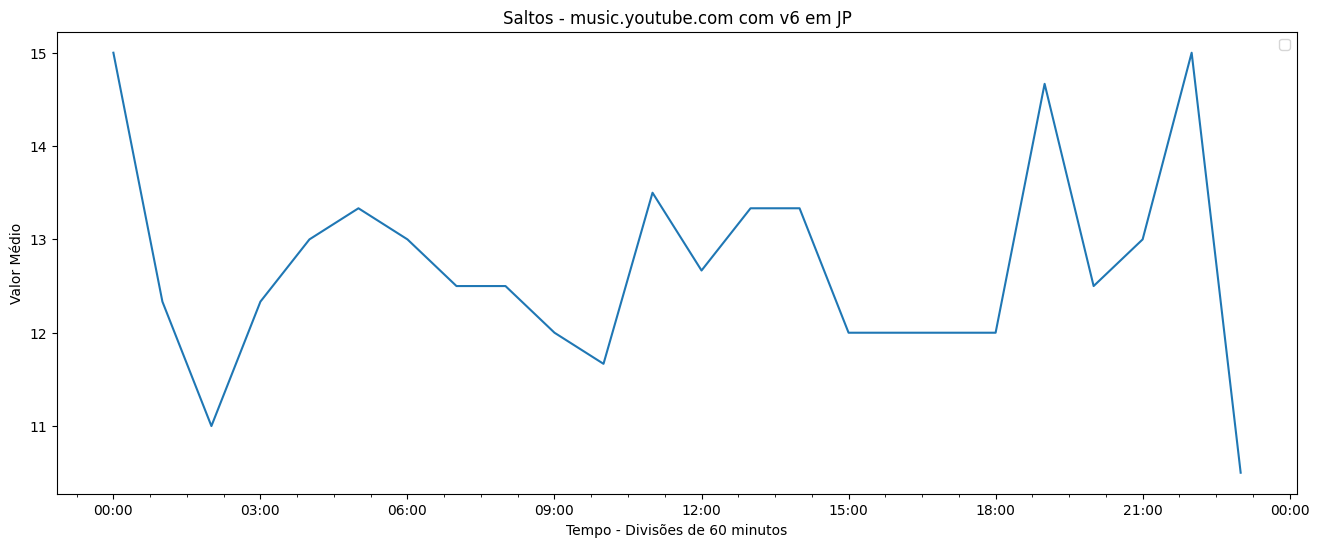

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


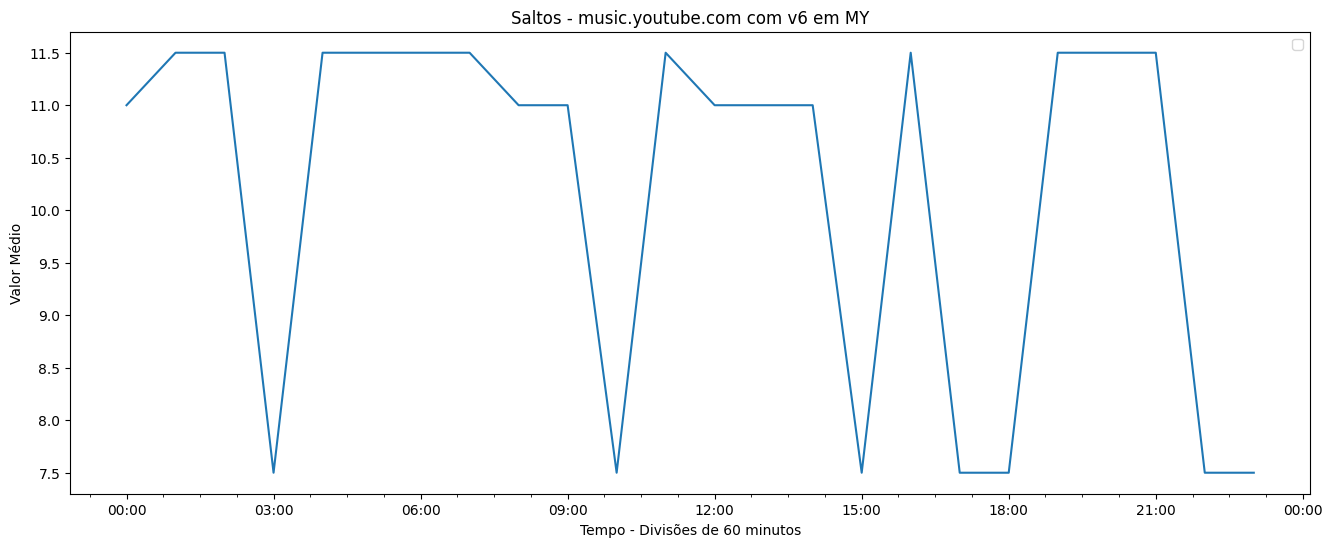

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


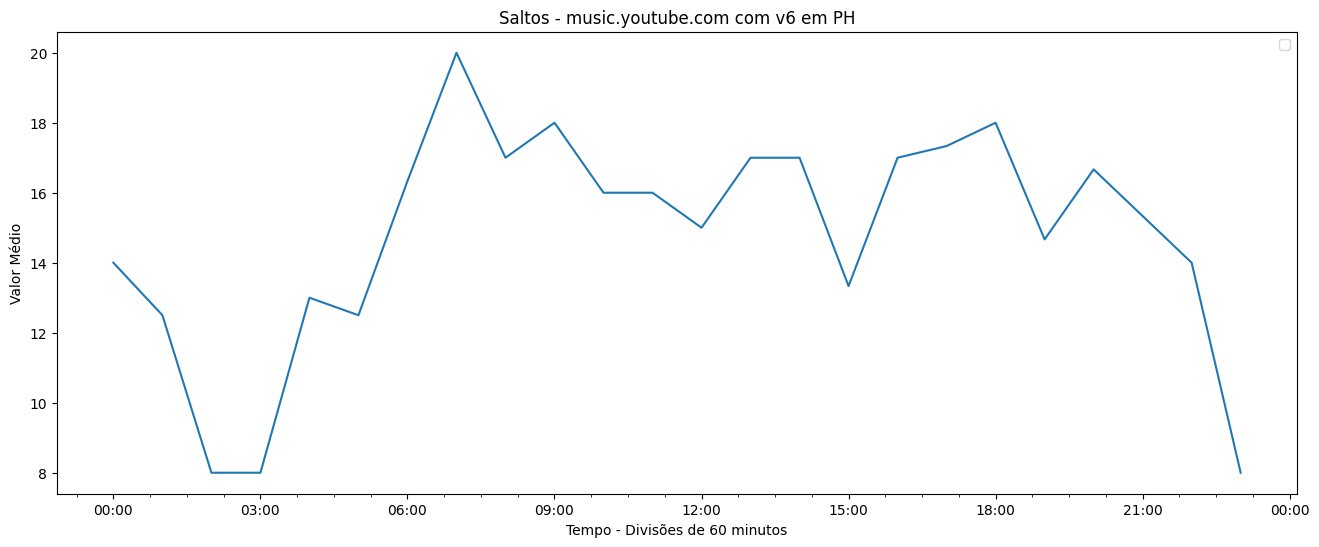

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


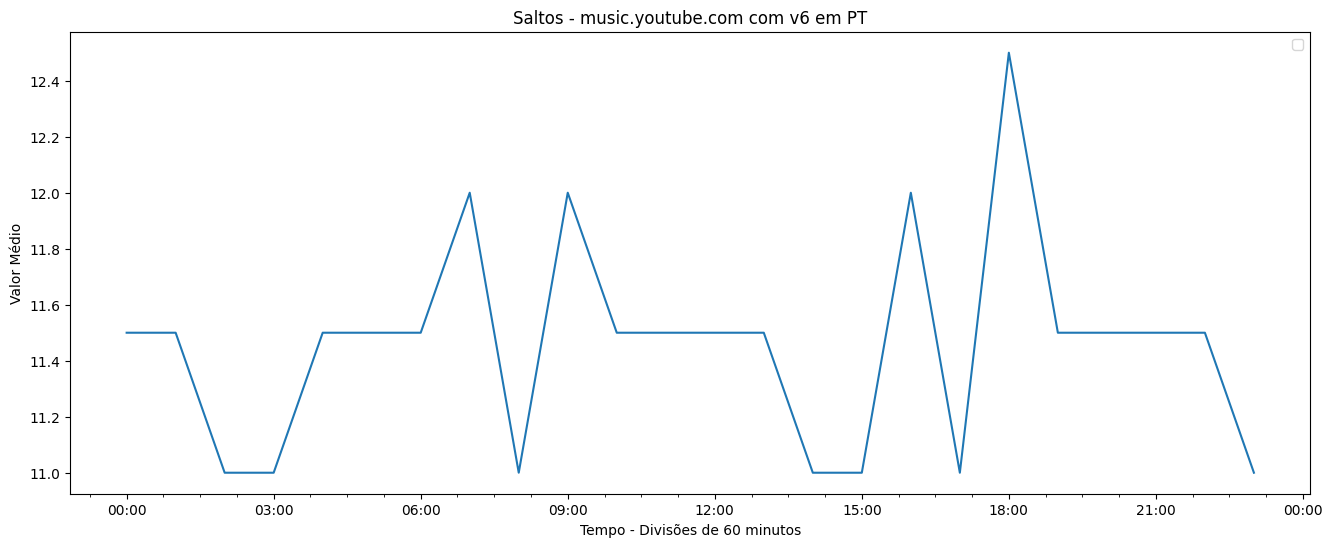

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


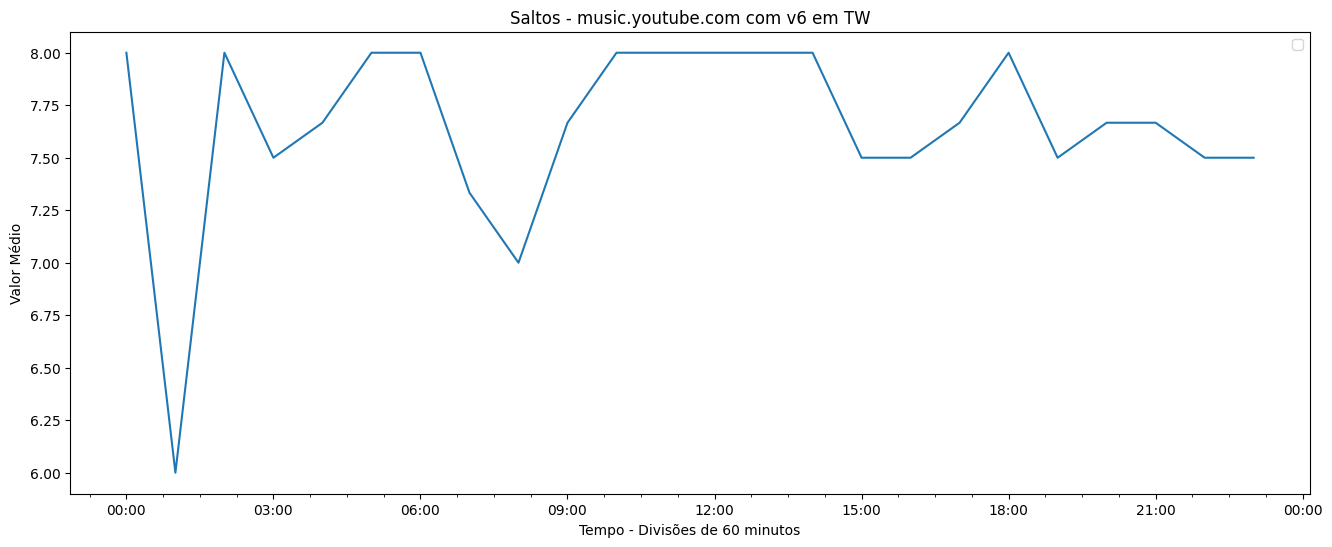

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


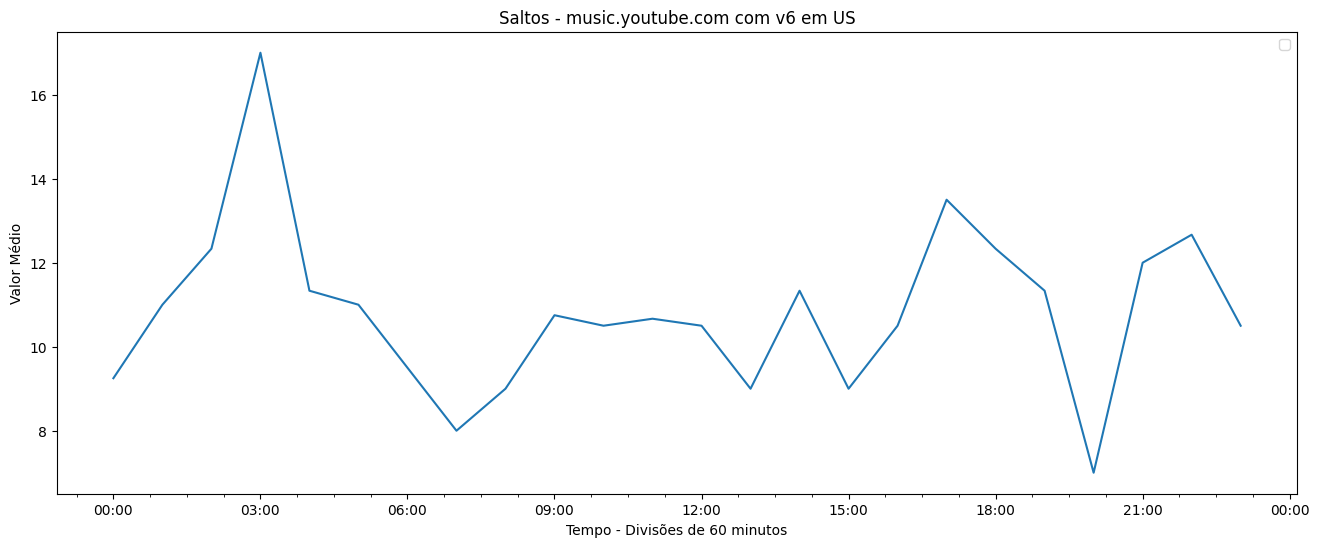

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


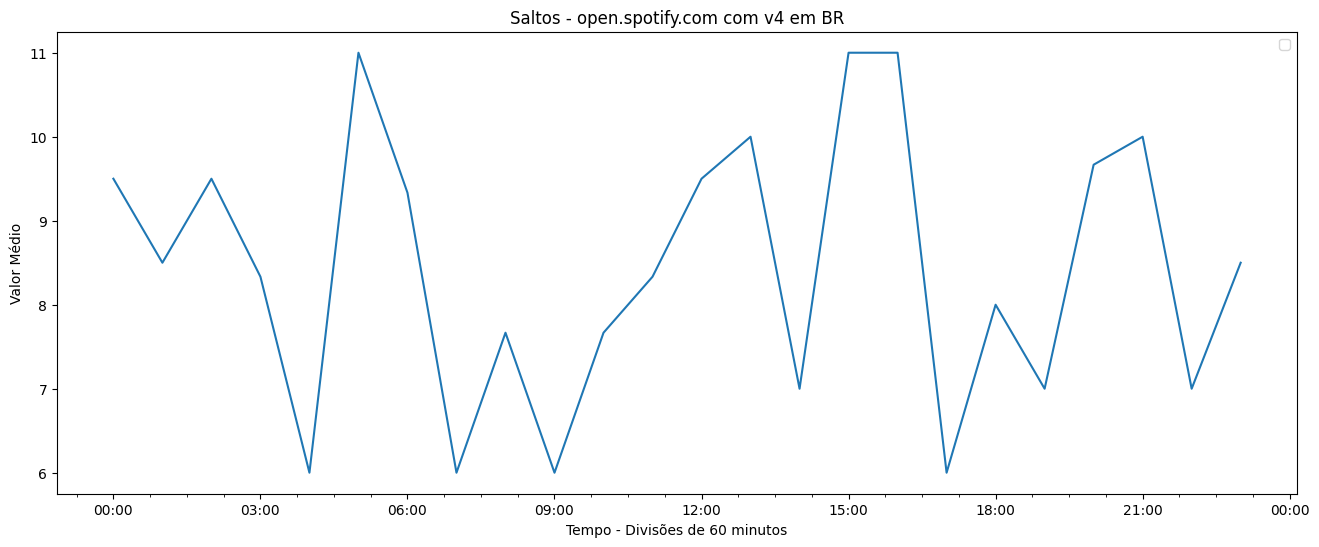

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


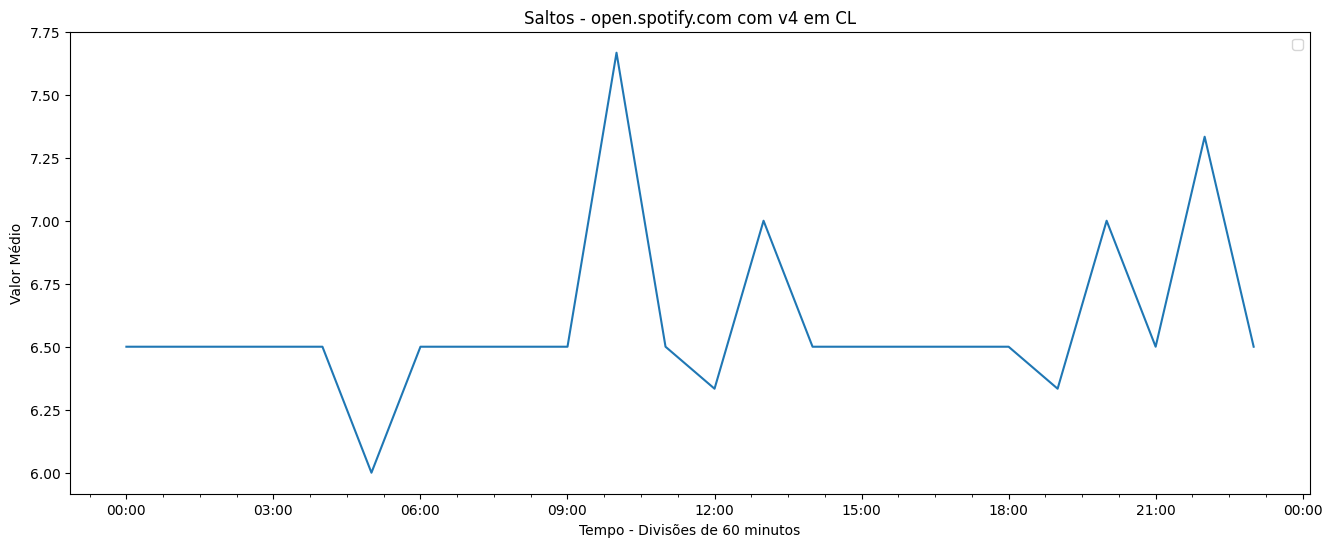

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


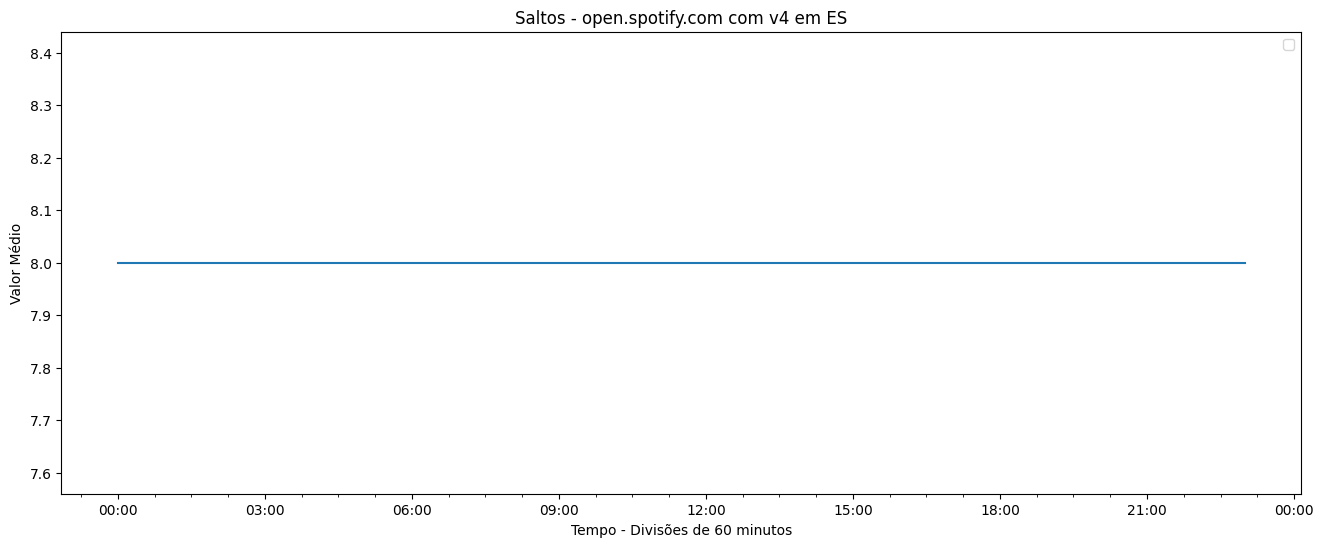

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


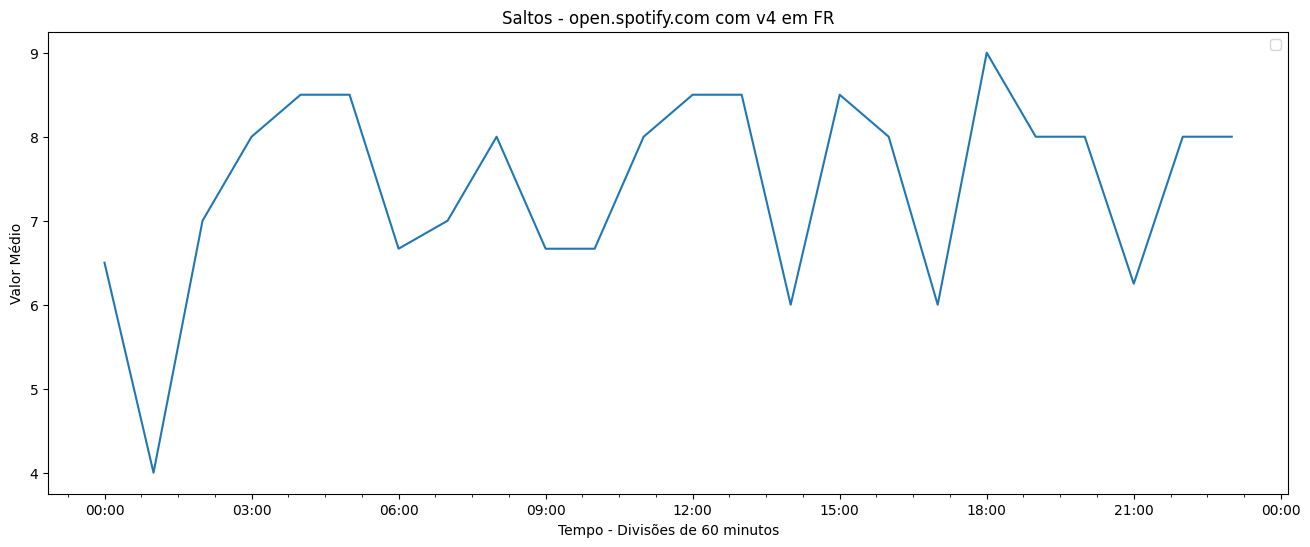

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


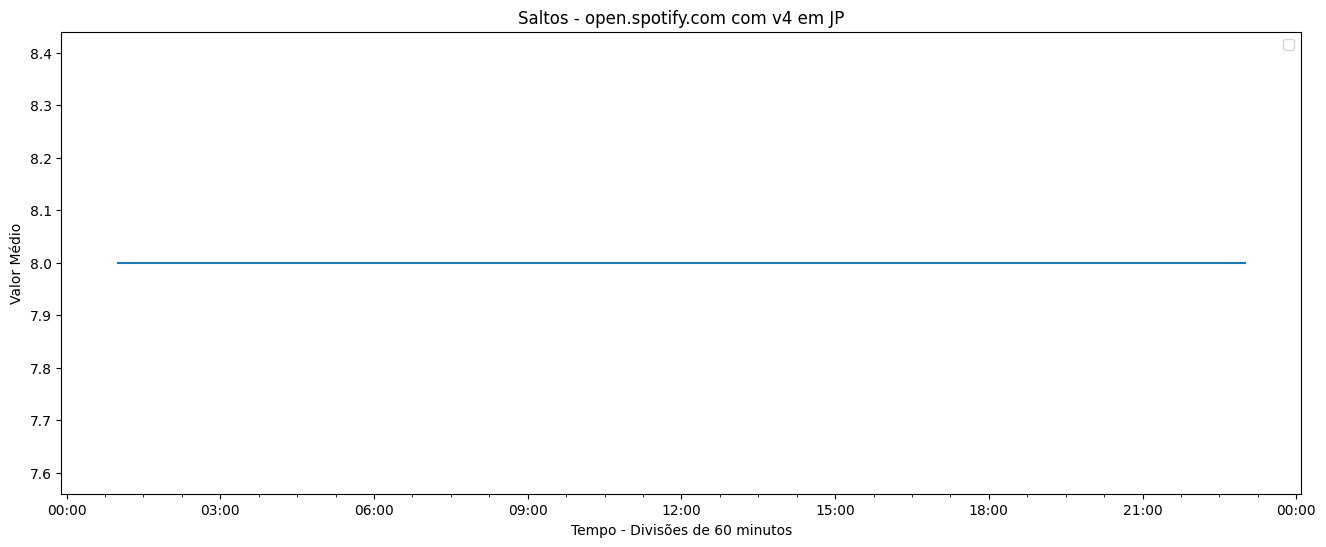

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


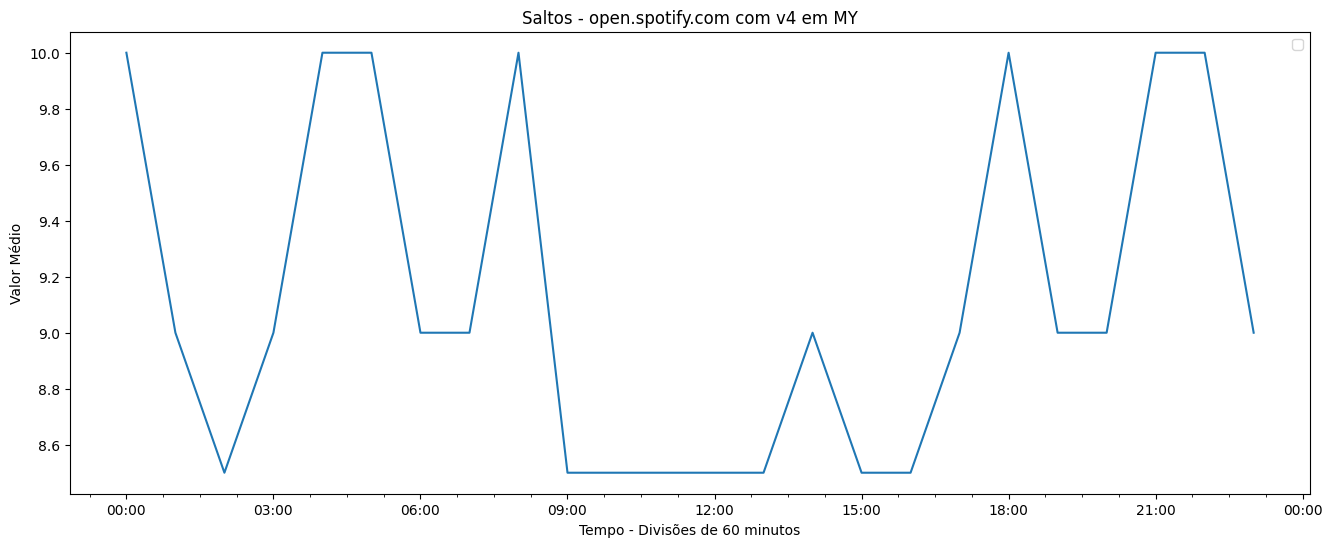

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


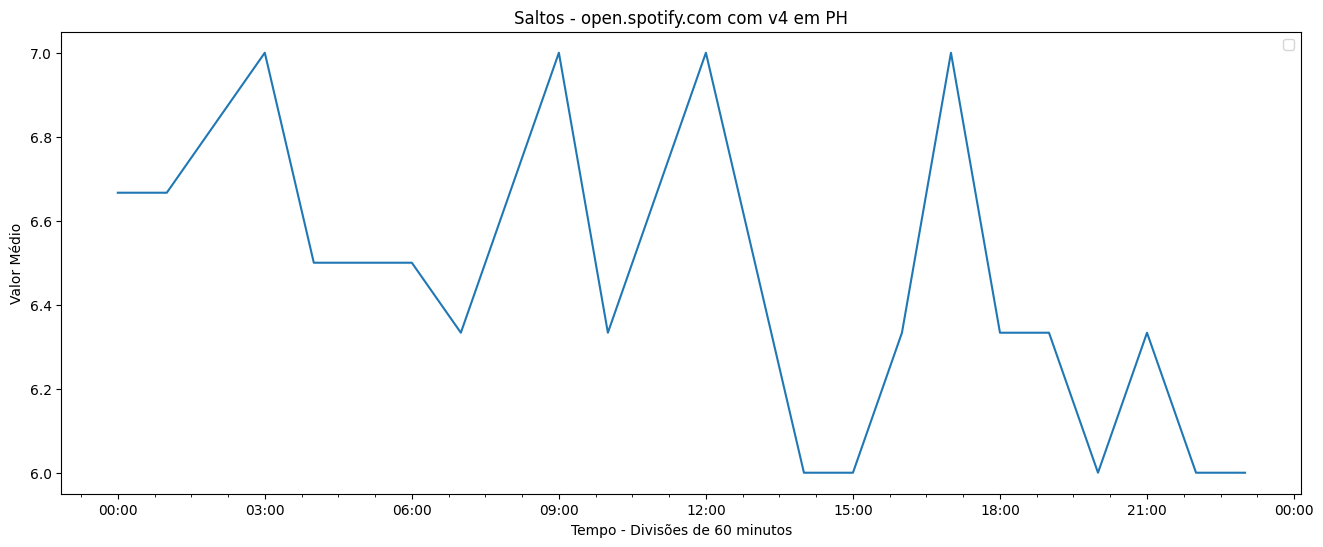

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


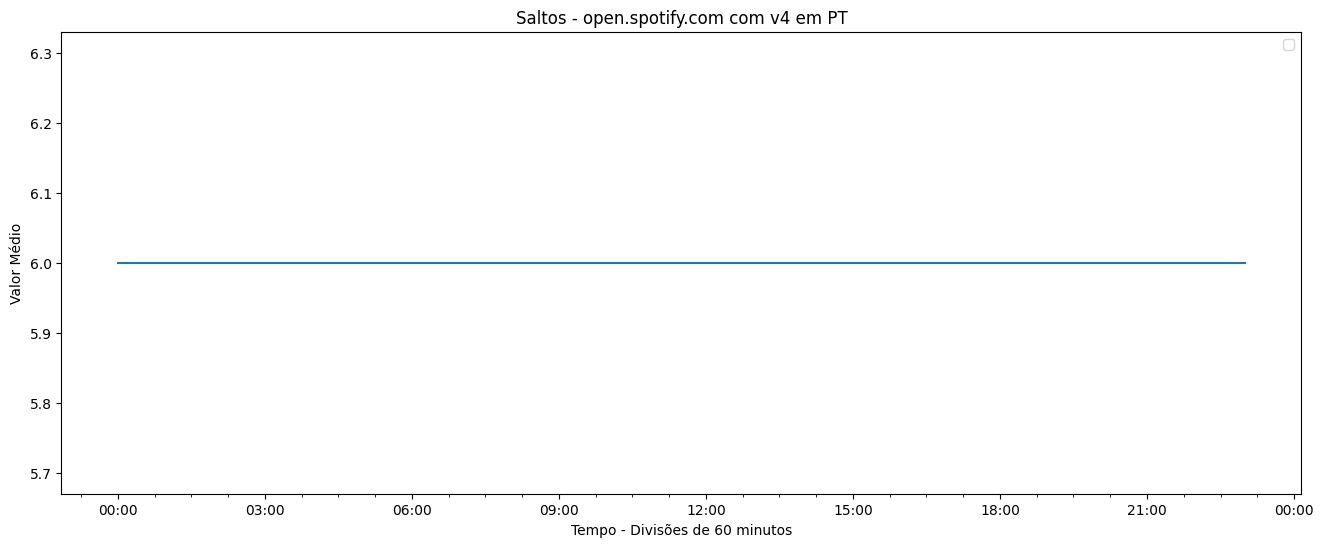

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


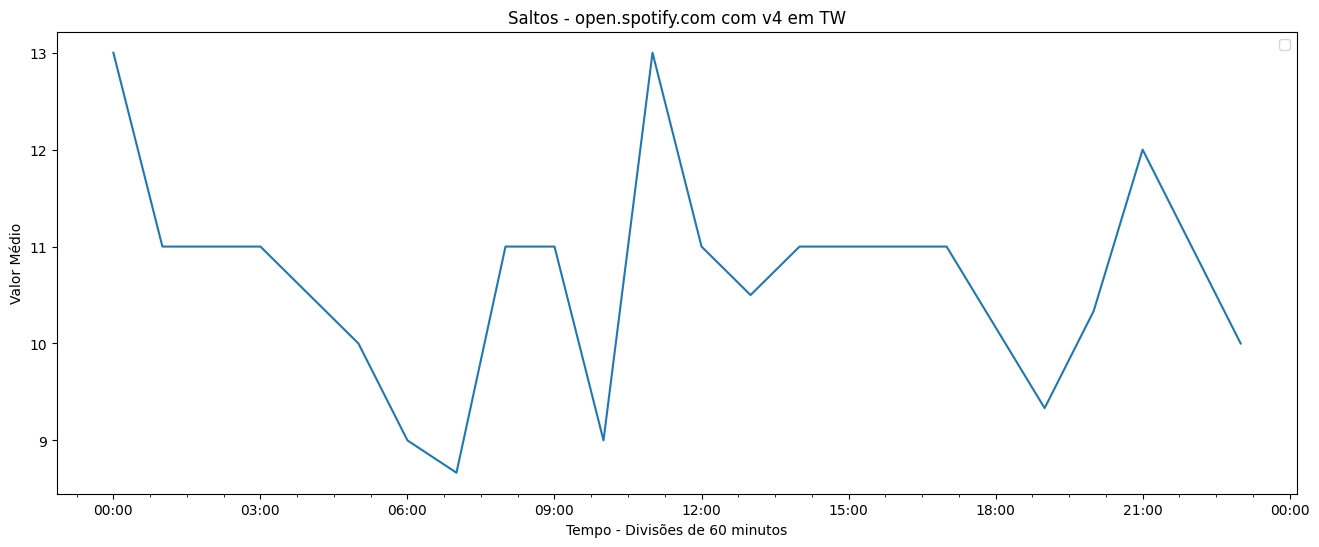

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


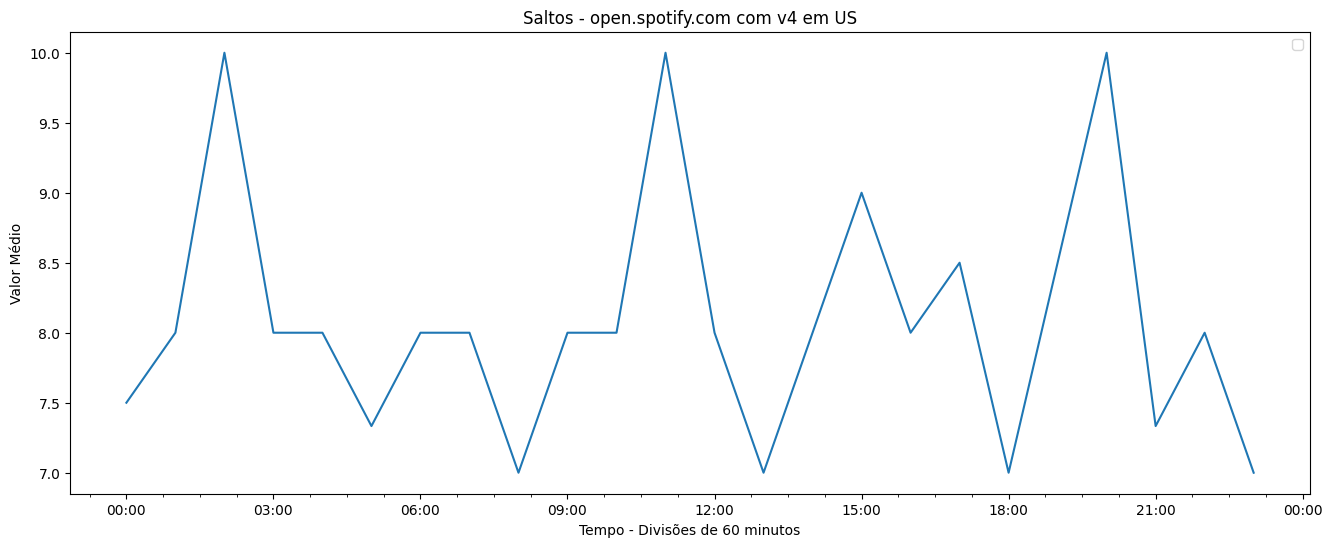

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


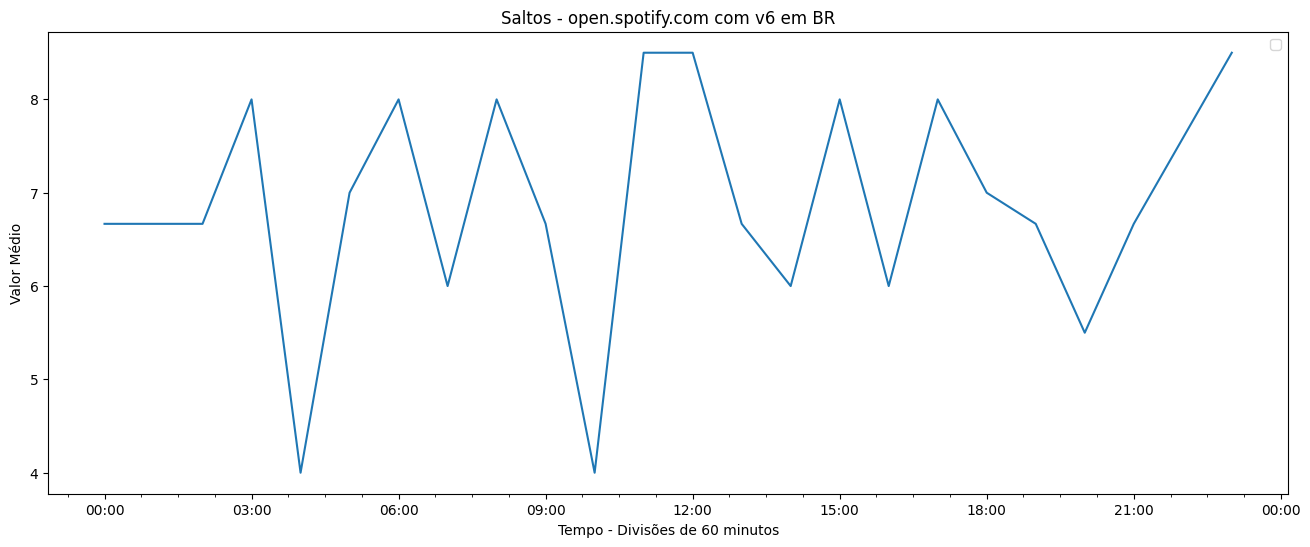

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


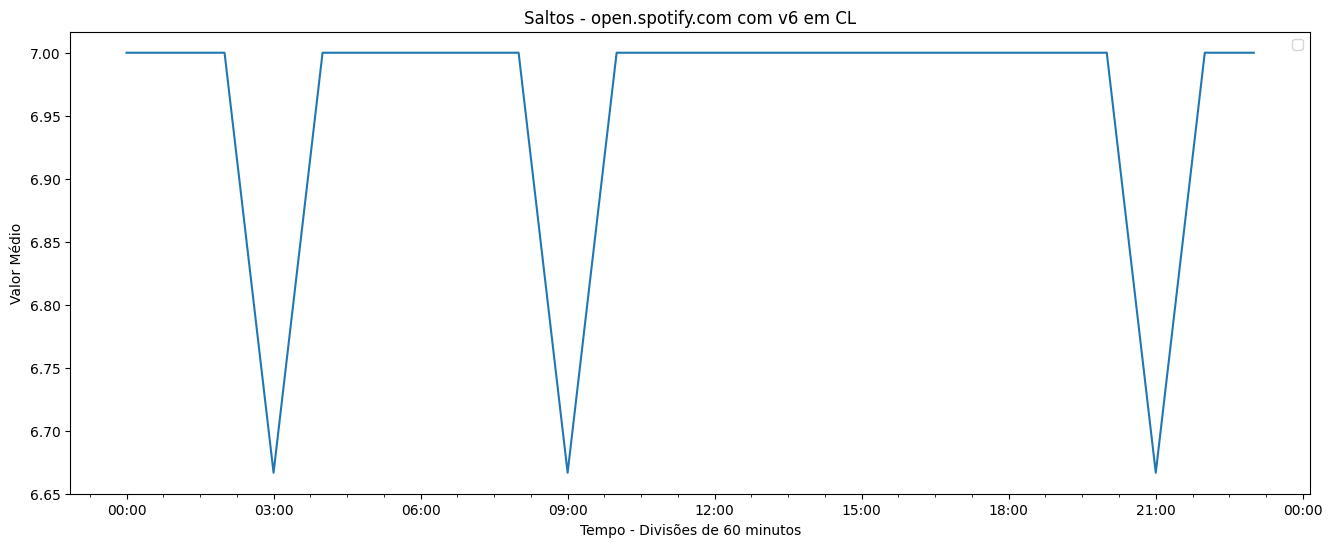

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


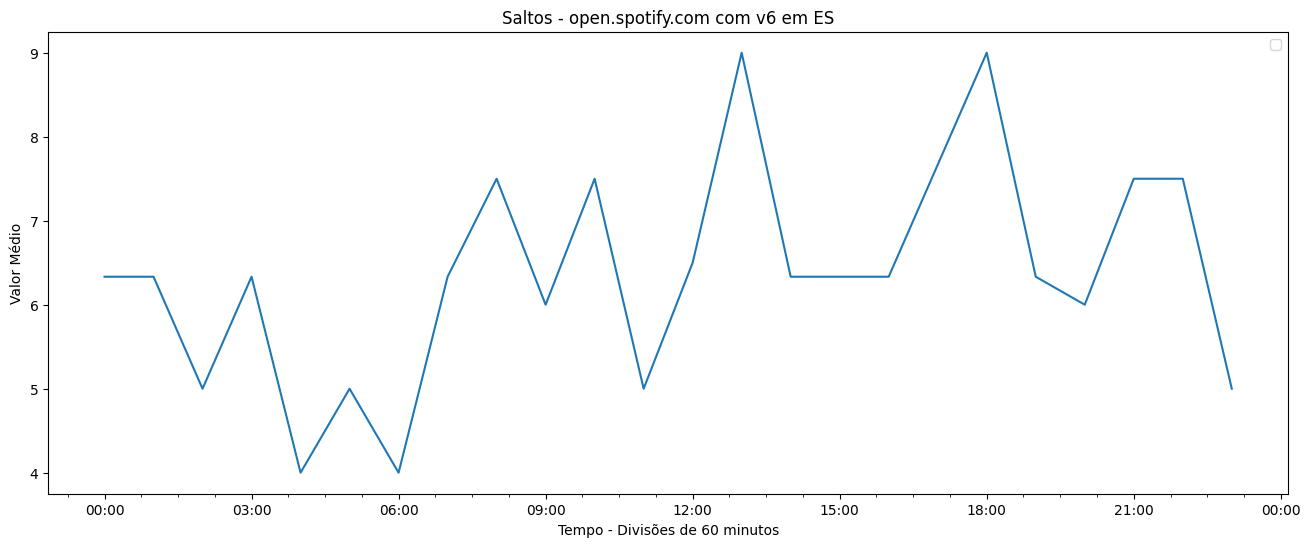

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


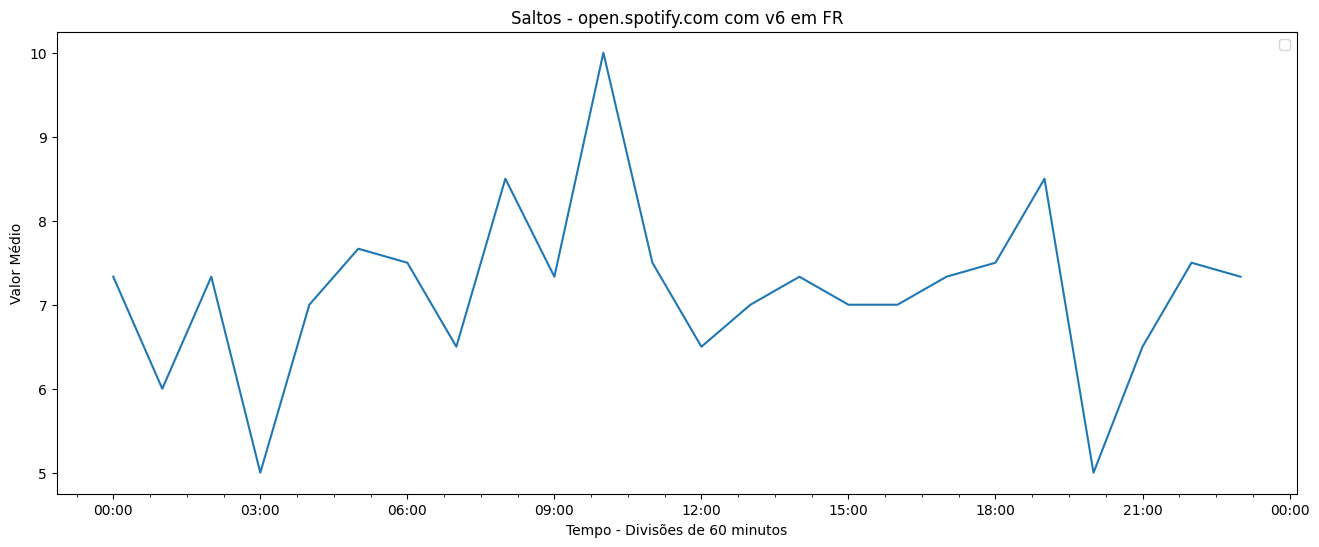

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


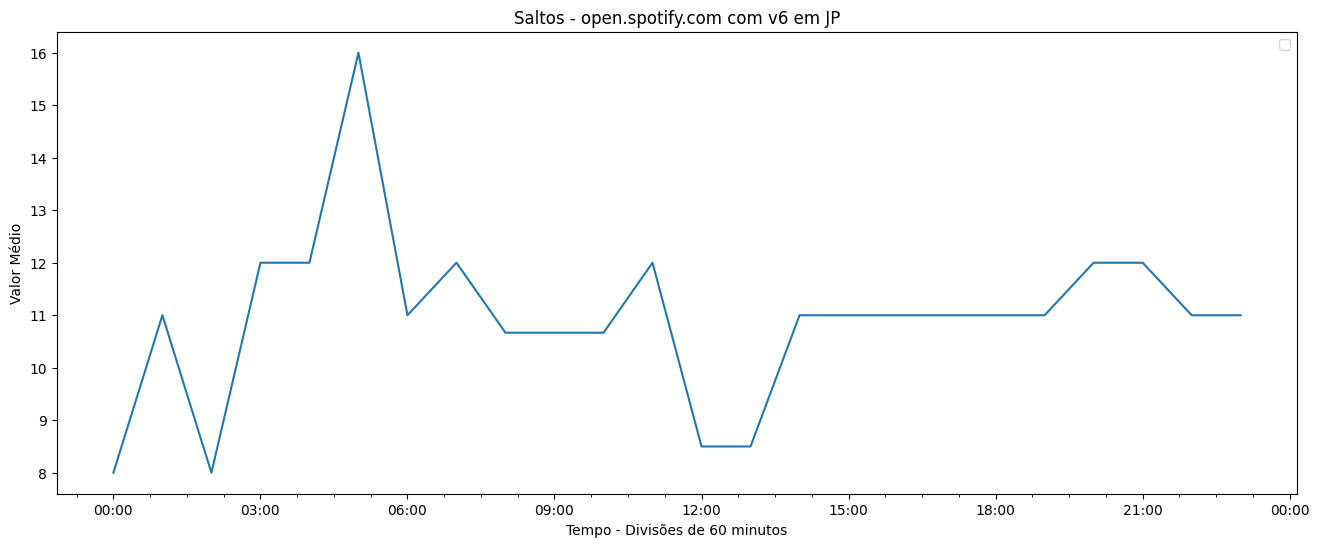

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


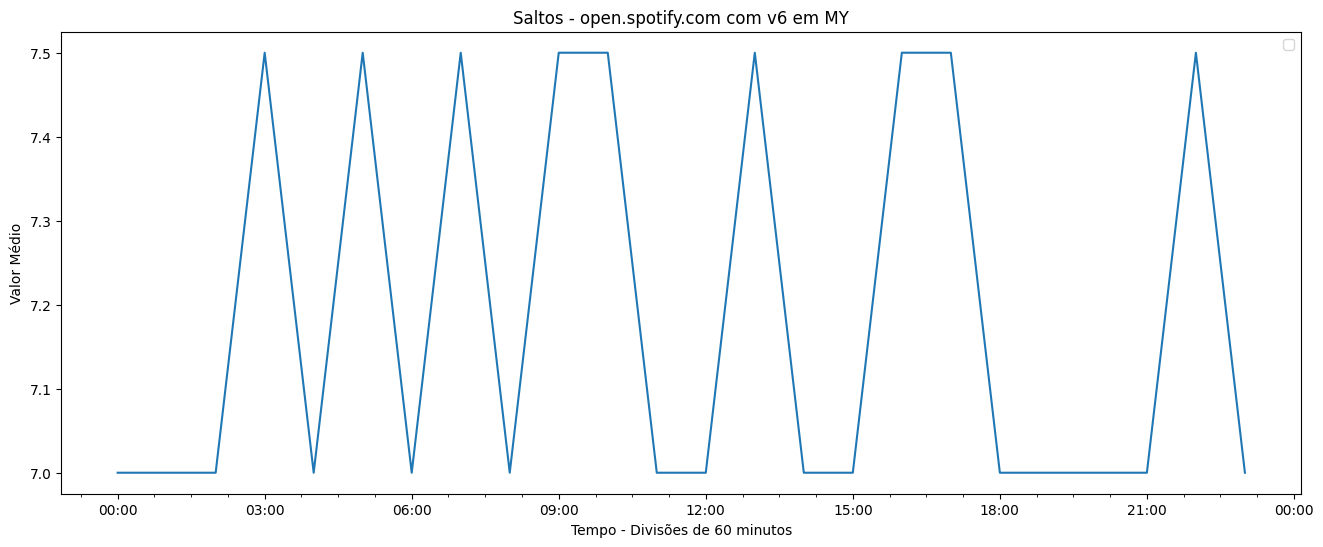

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


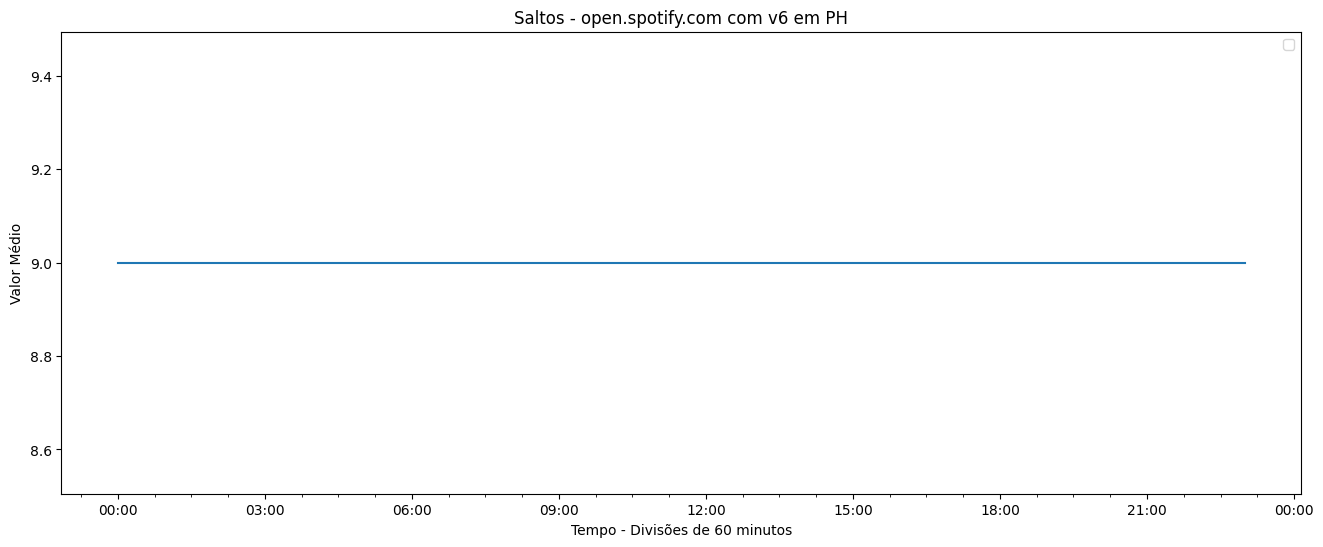

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


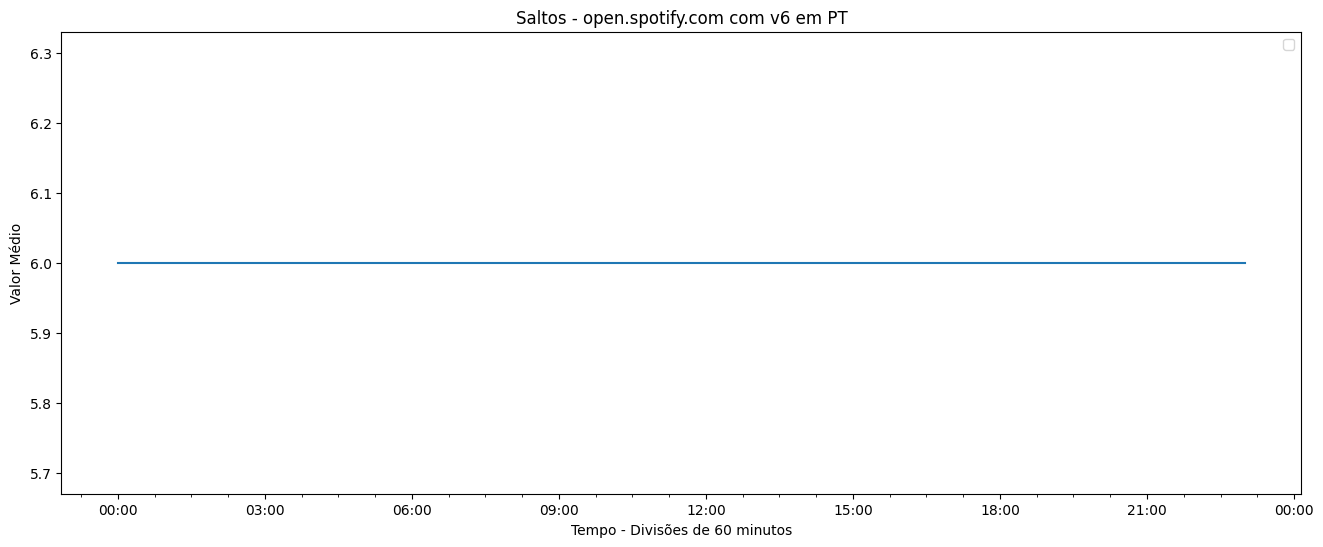

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


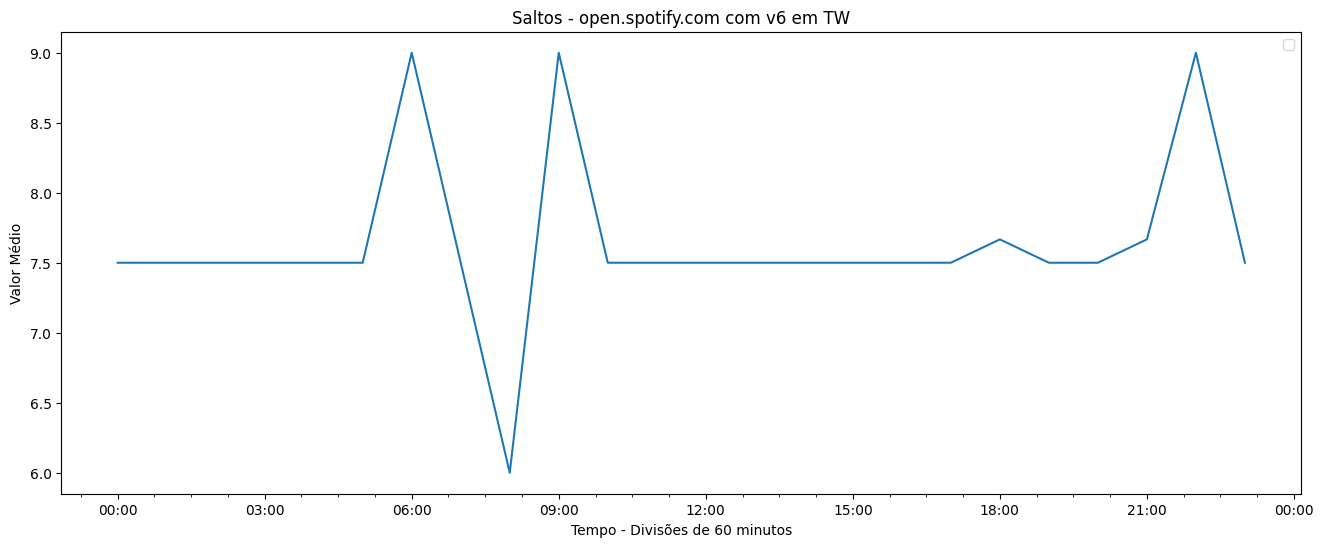

<ipython-input-31-9bca9b25443b>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


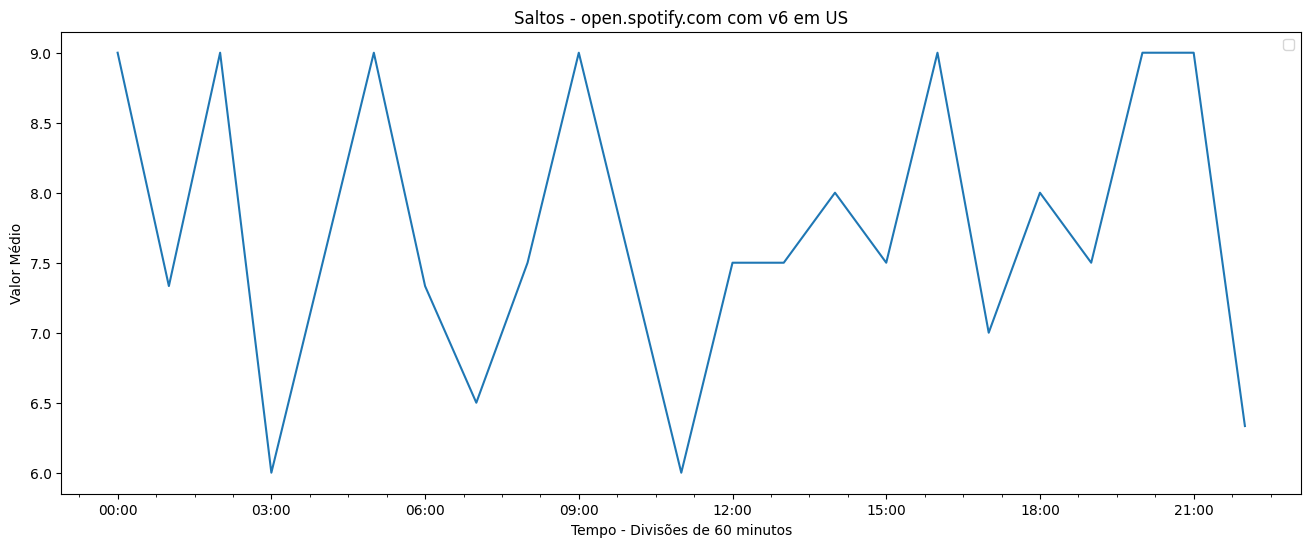

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure timestamp is in datetime format
dataframe["timestamp"] = pd.to_datetime(dataframe["timestamp"])



# Get unique combinations of 'goal_route' and 'ip_version'
group_combinations = dataframe.groupby(["goal_route", "ip_version", "location"]).size().reset_index()[["goal_route", "ip_version",
                                                                                                       "location"]]

# Loop through each group combination and create a separate plot
for _, group in group_combinations.iterrows():
    goal_route = group["goal_route"]
    ip_version = group["ip_version"]
    location = group["location"]

    # Filter the dataframe for the current combination
    filtered_df = dataframe[(dataframe["goal_route"] == goal_route) & (dataframe["ip_version"] == ip_version) & (dataframe["location"] == location)]
    title = "Saltos - " + goal_route + " com " + ip_version + " em " + location
    ax = line_graph_for(filtered_df, title, "number_of_hops")


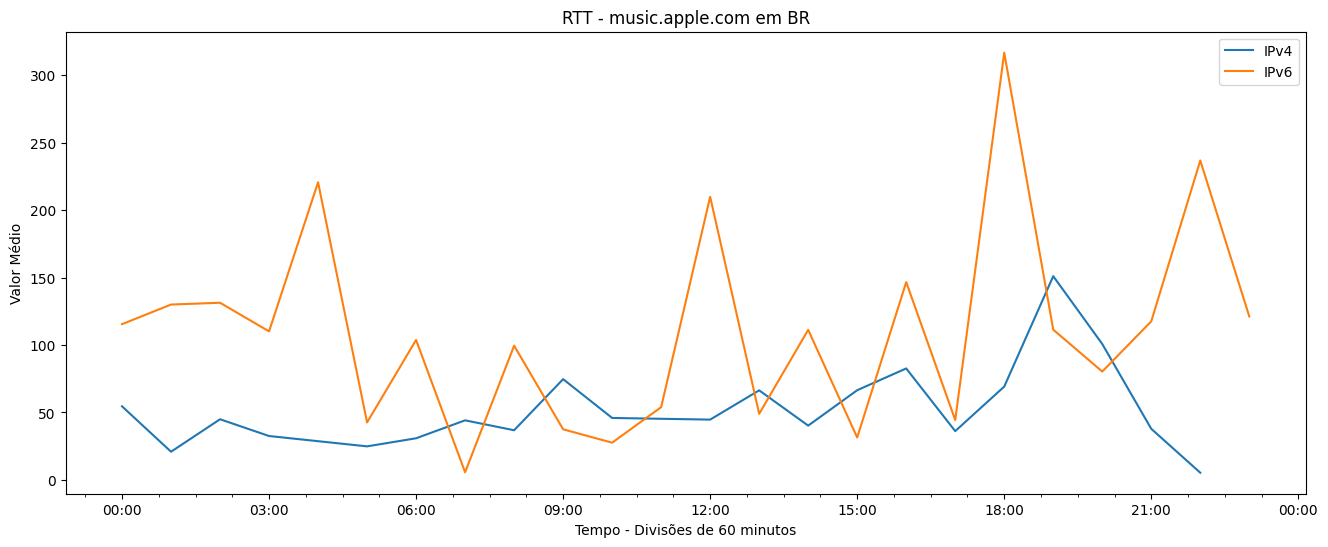

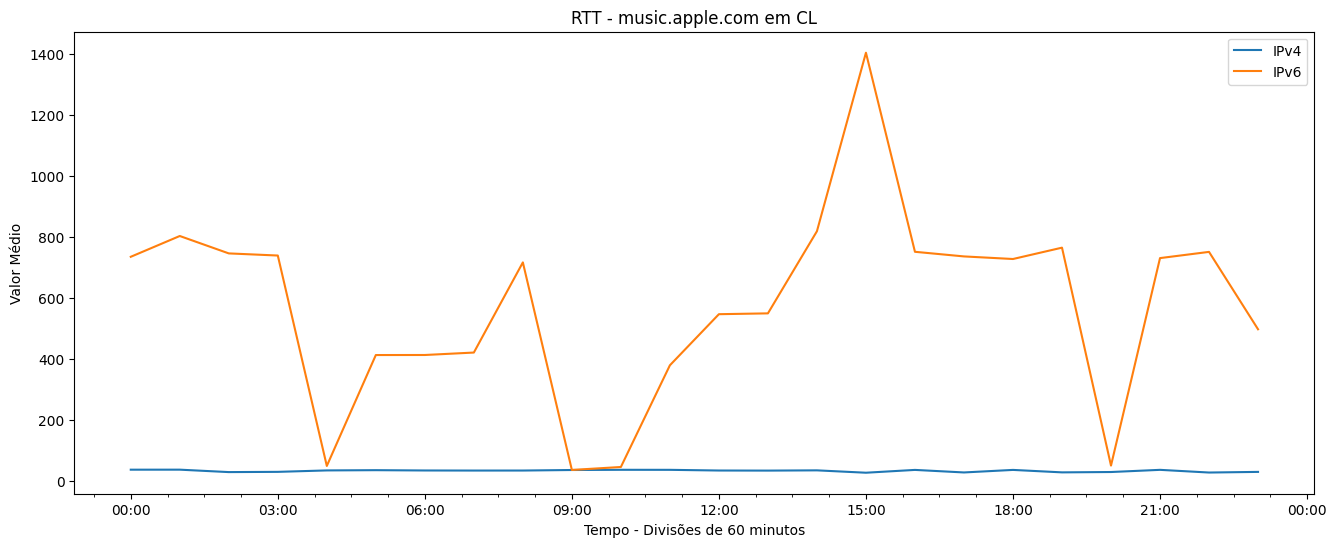

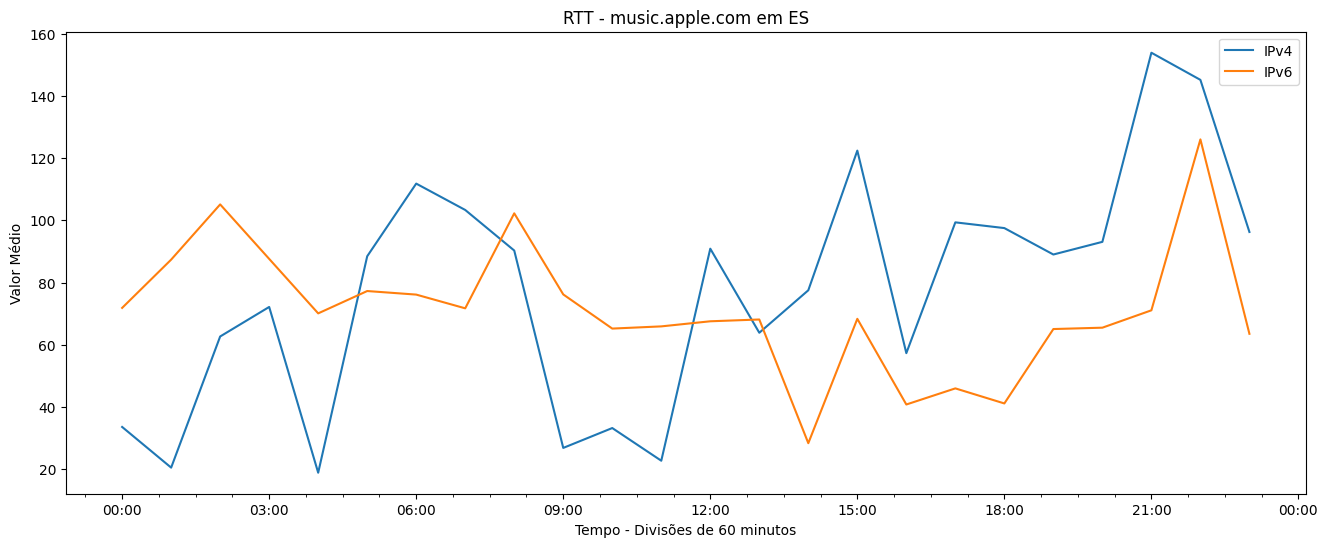

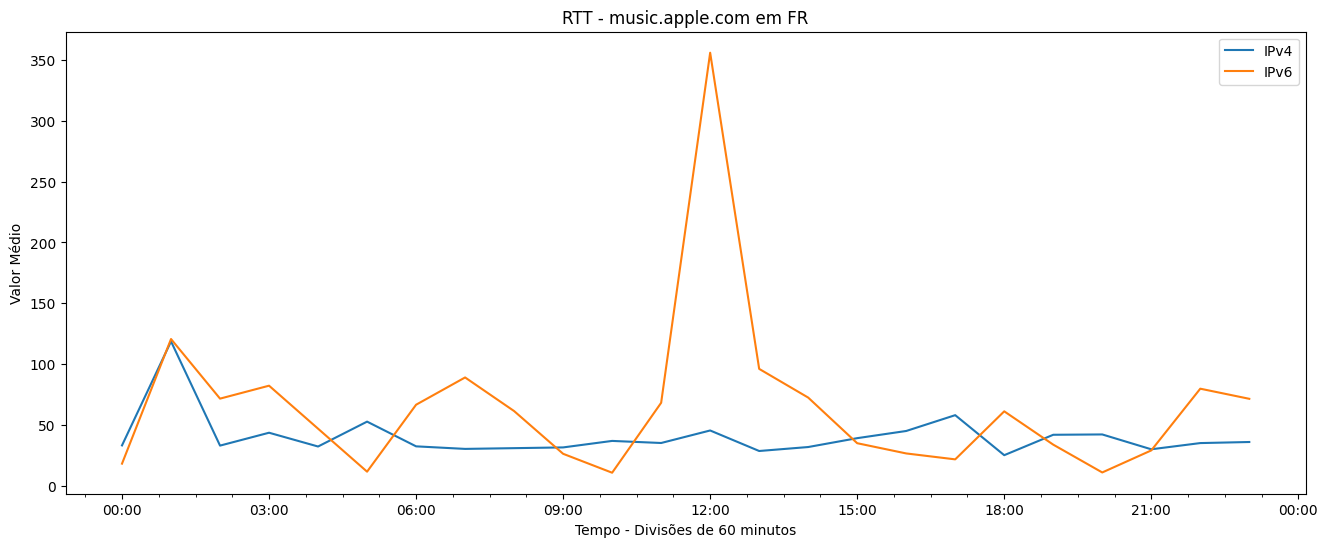

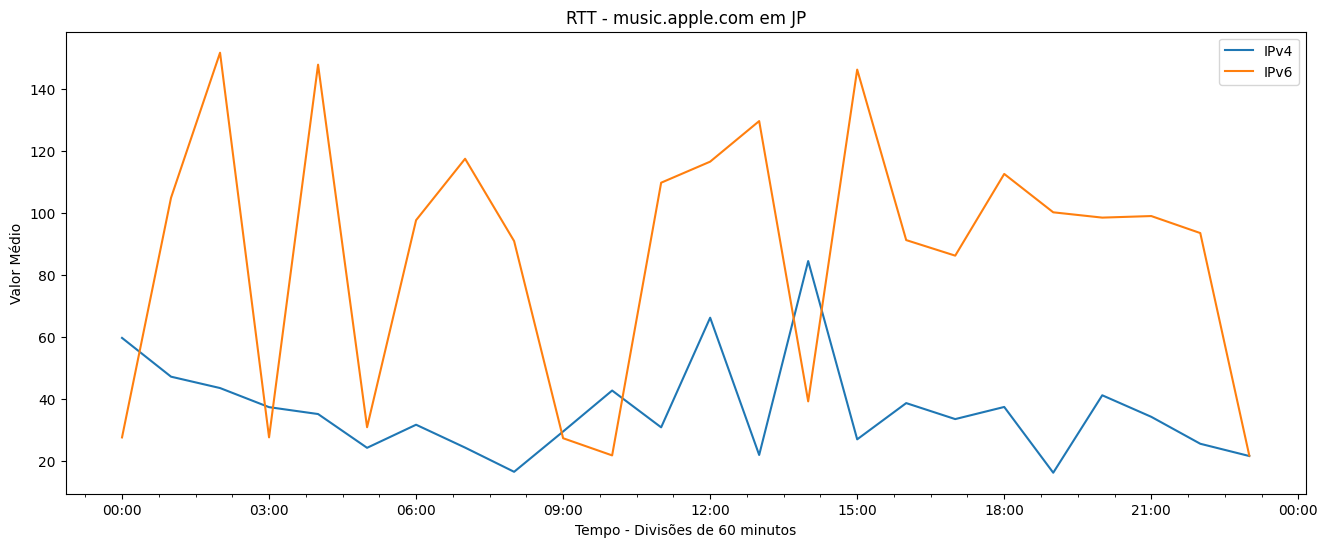

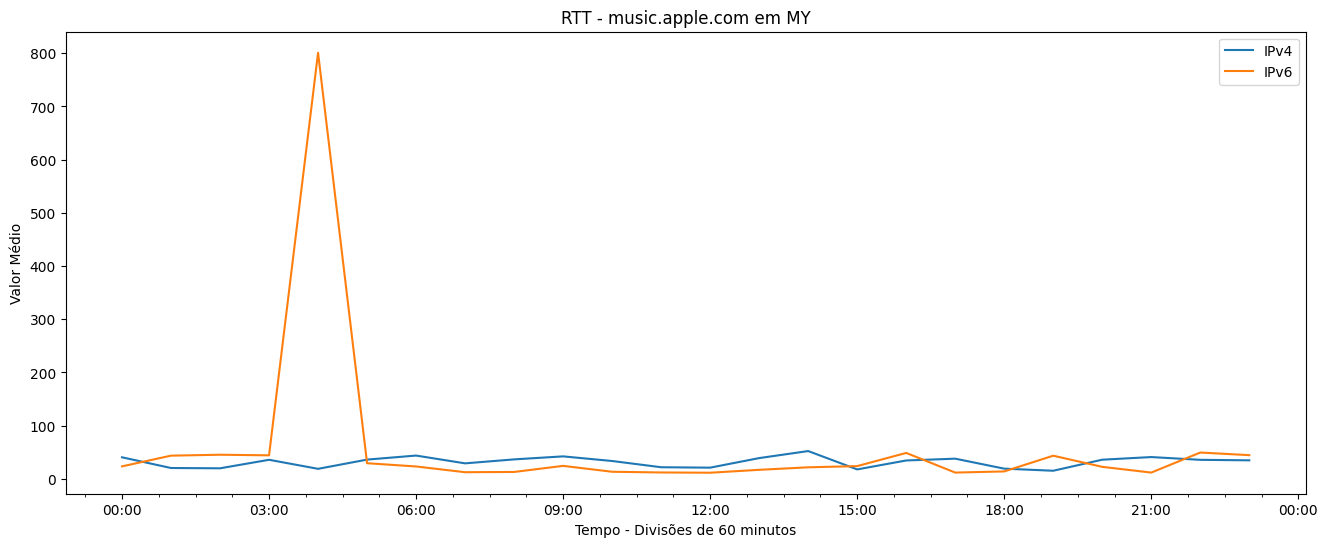

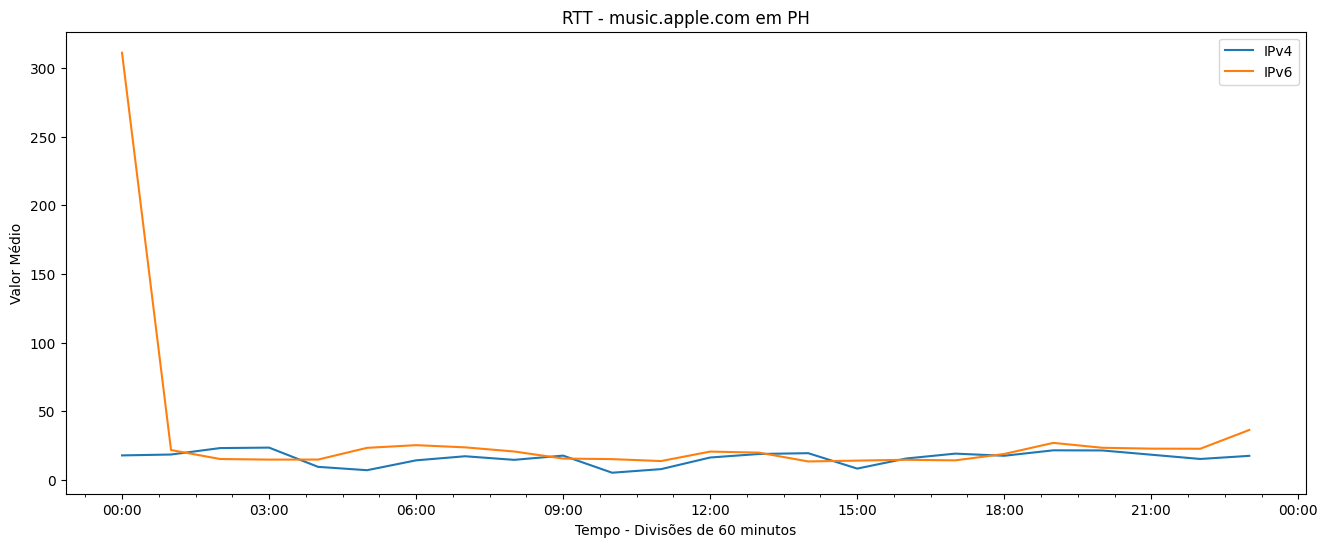

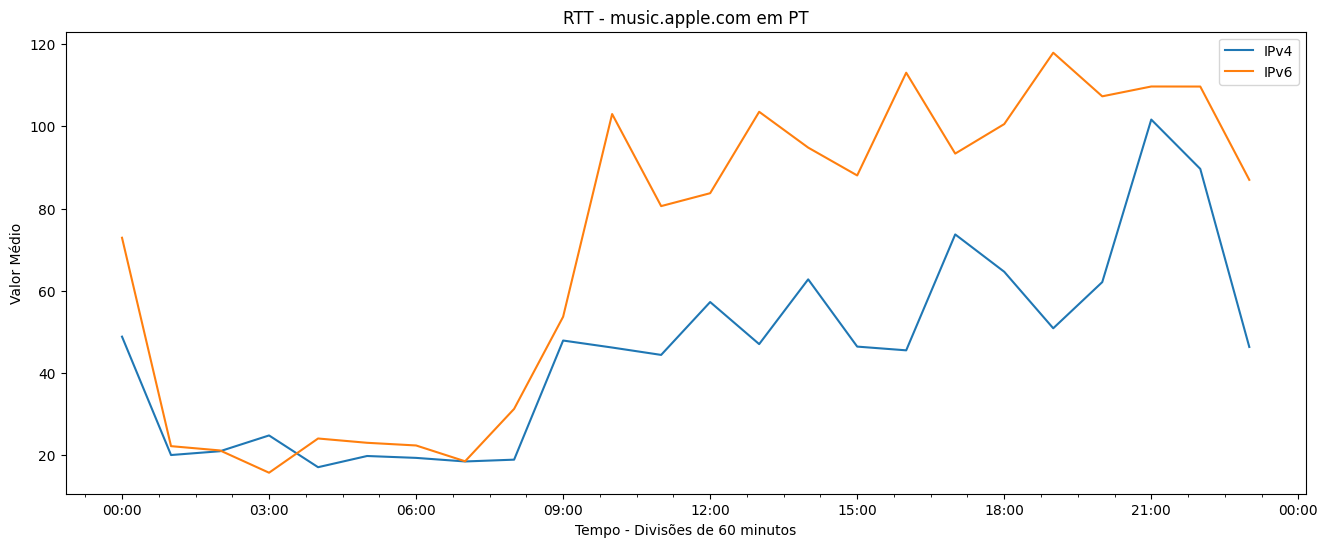

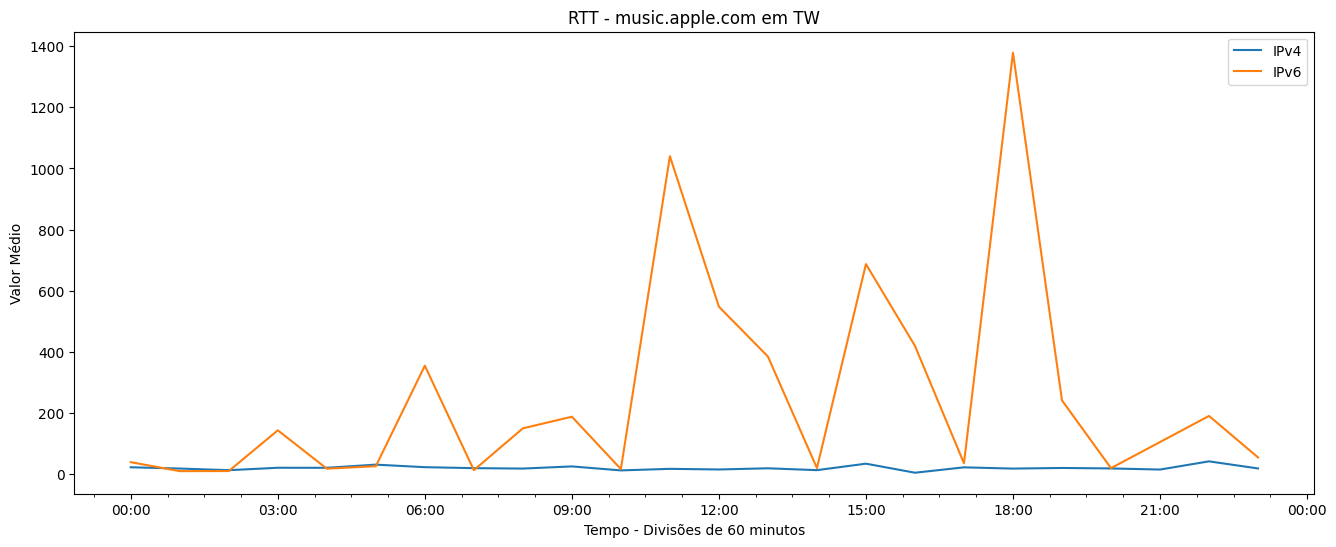

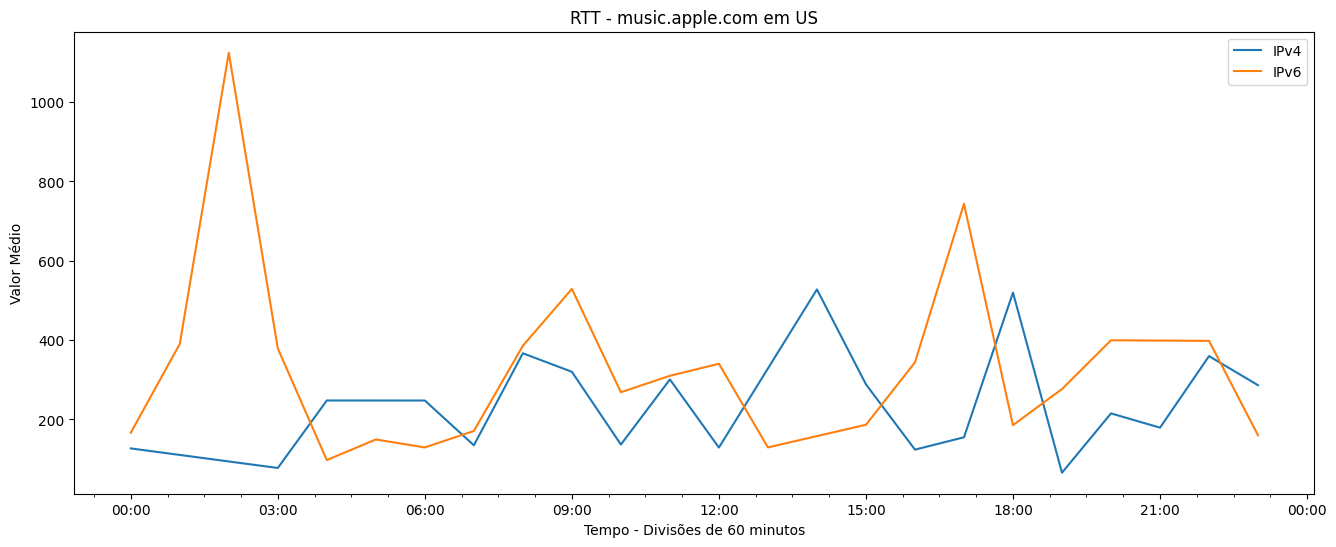

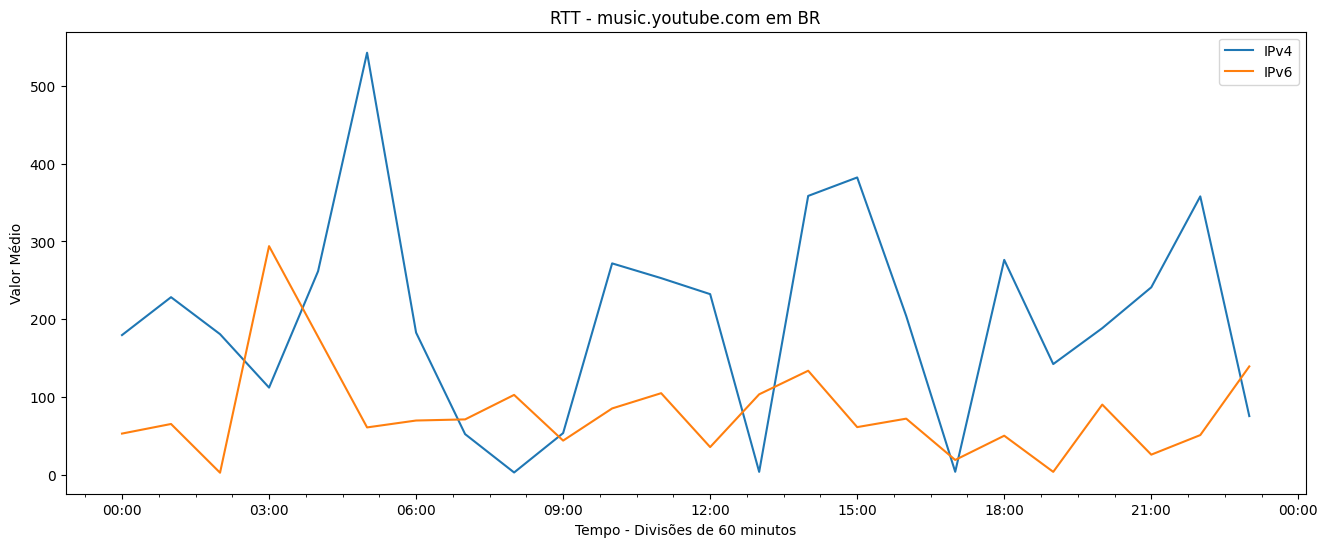

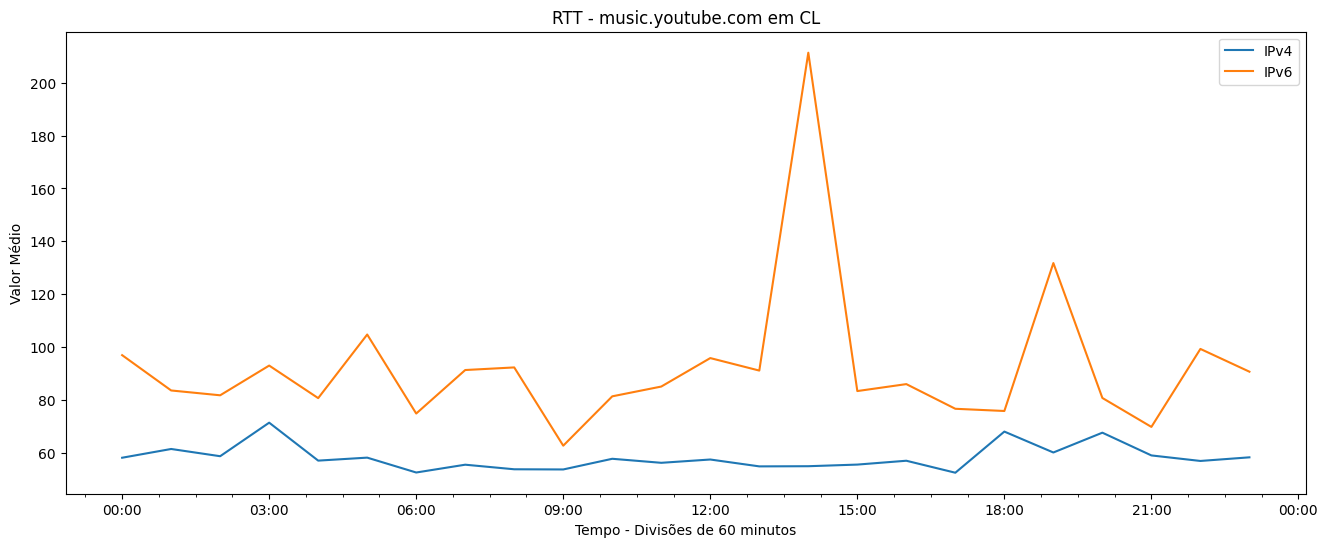

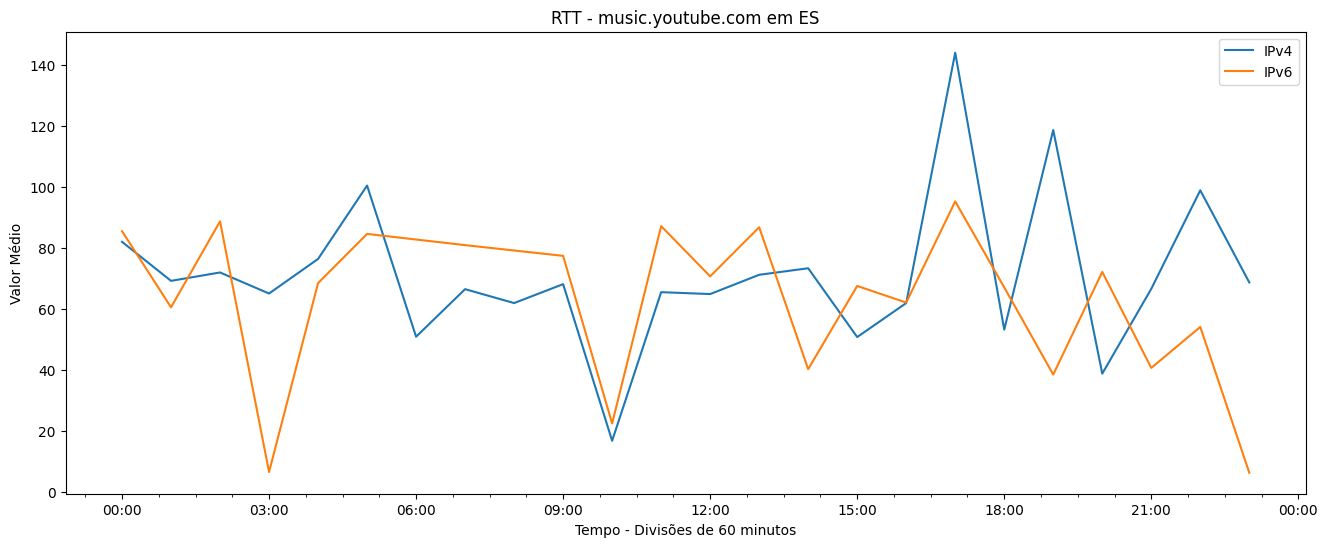

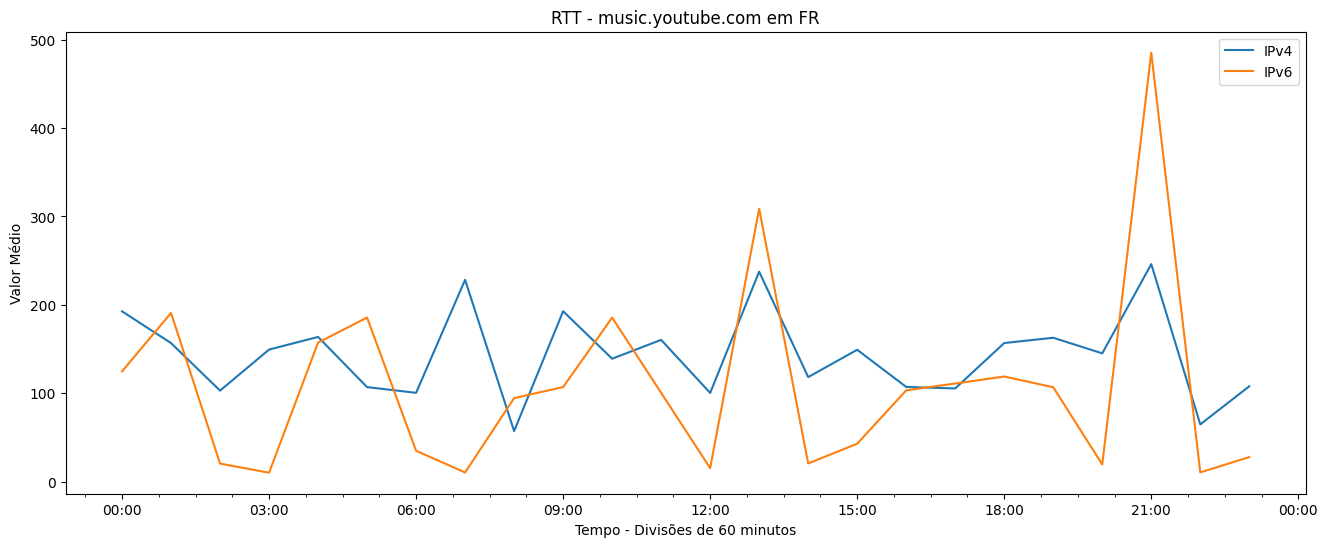

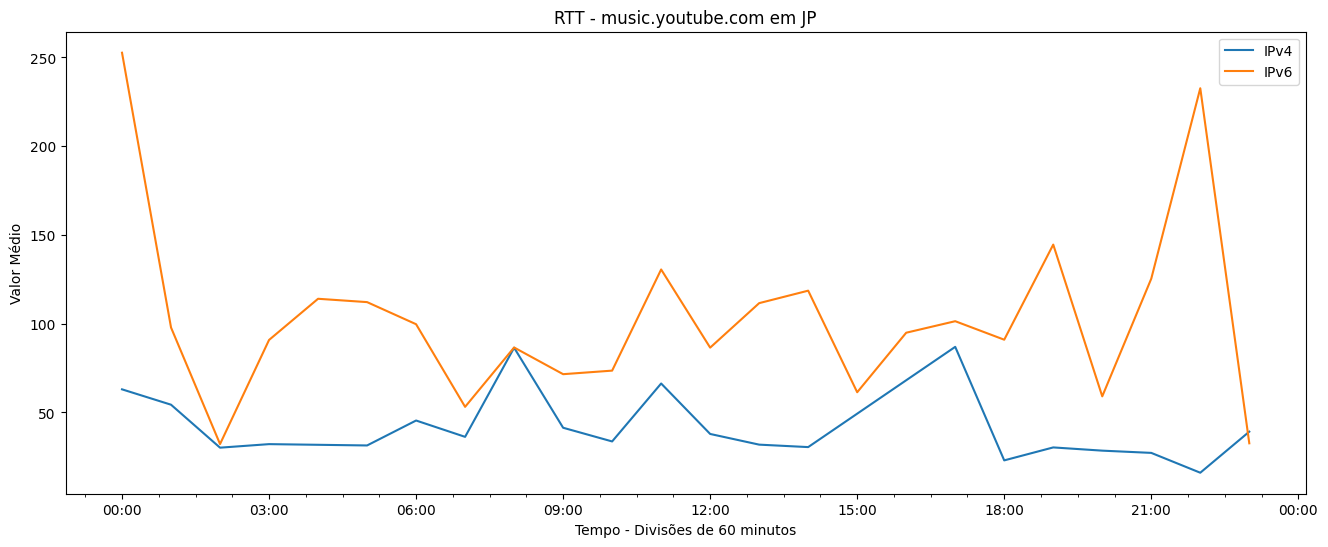

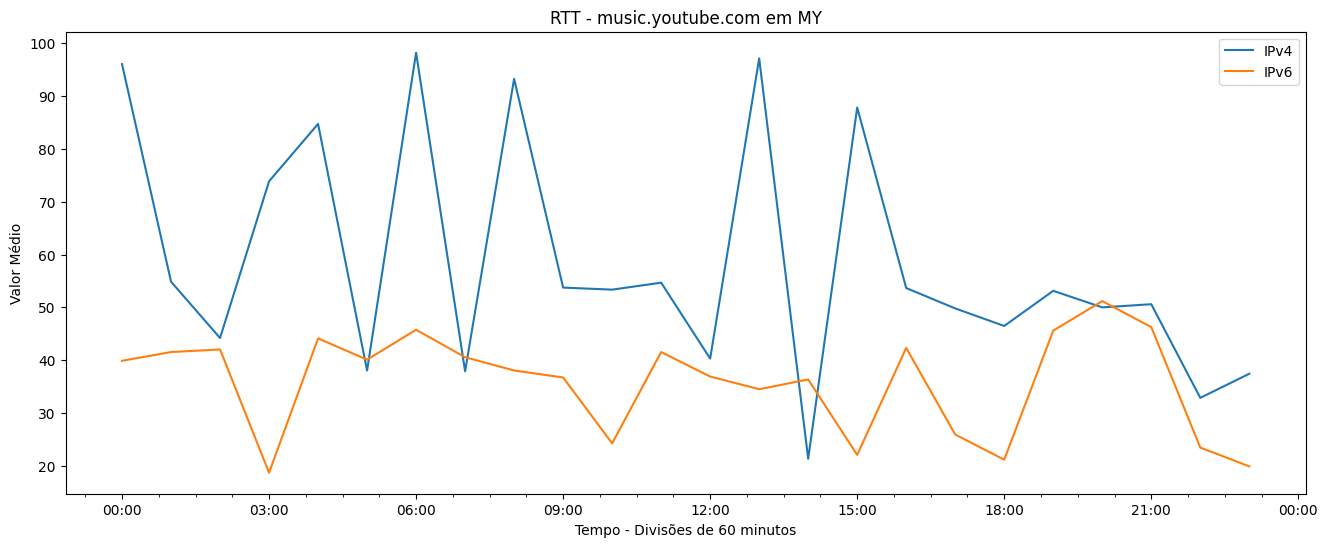

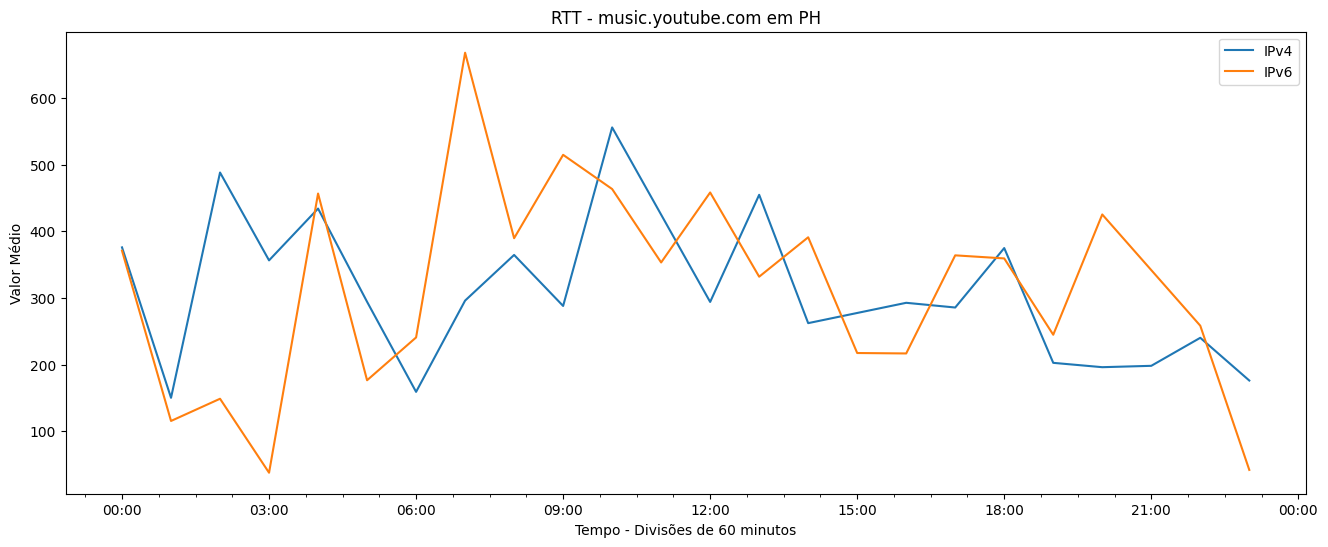

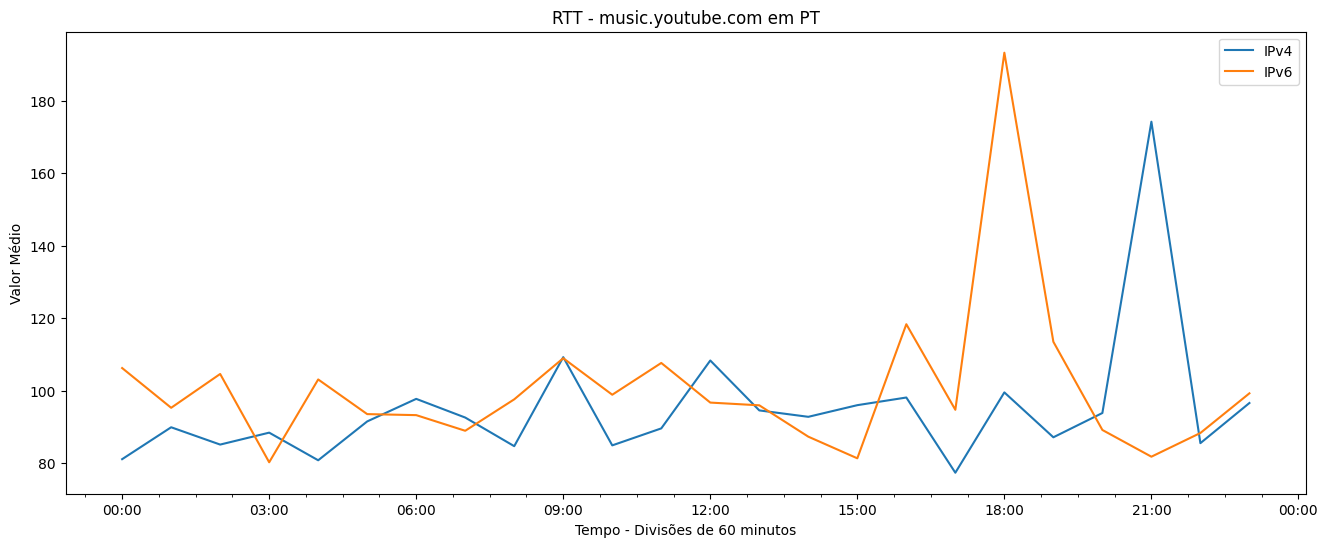

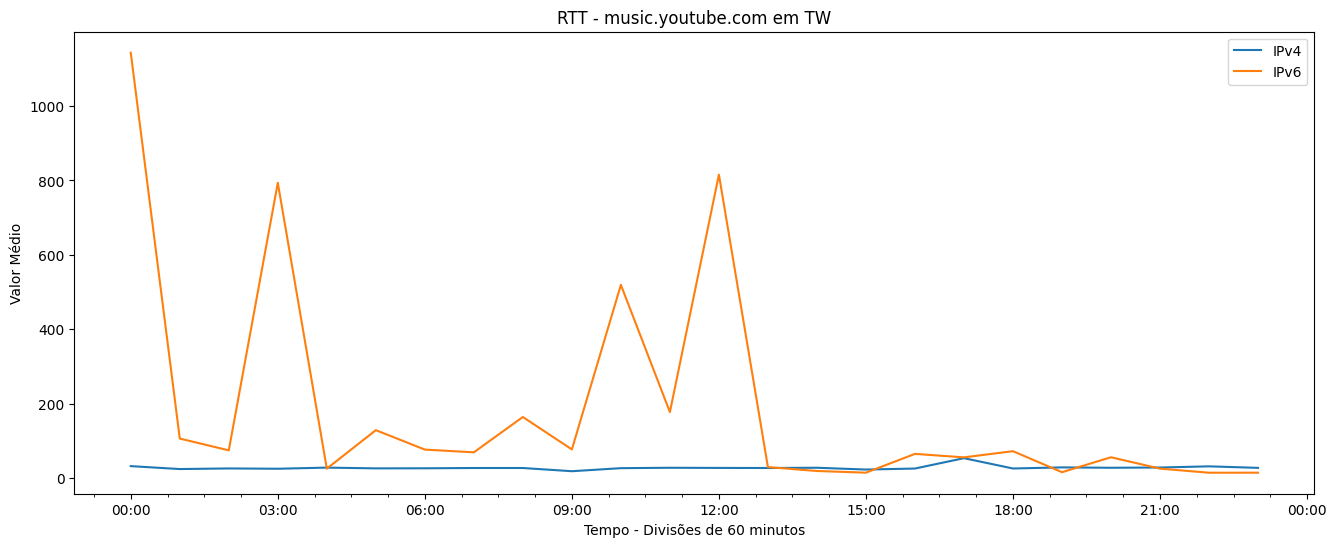

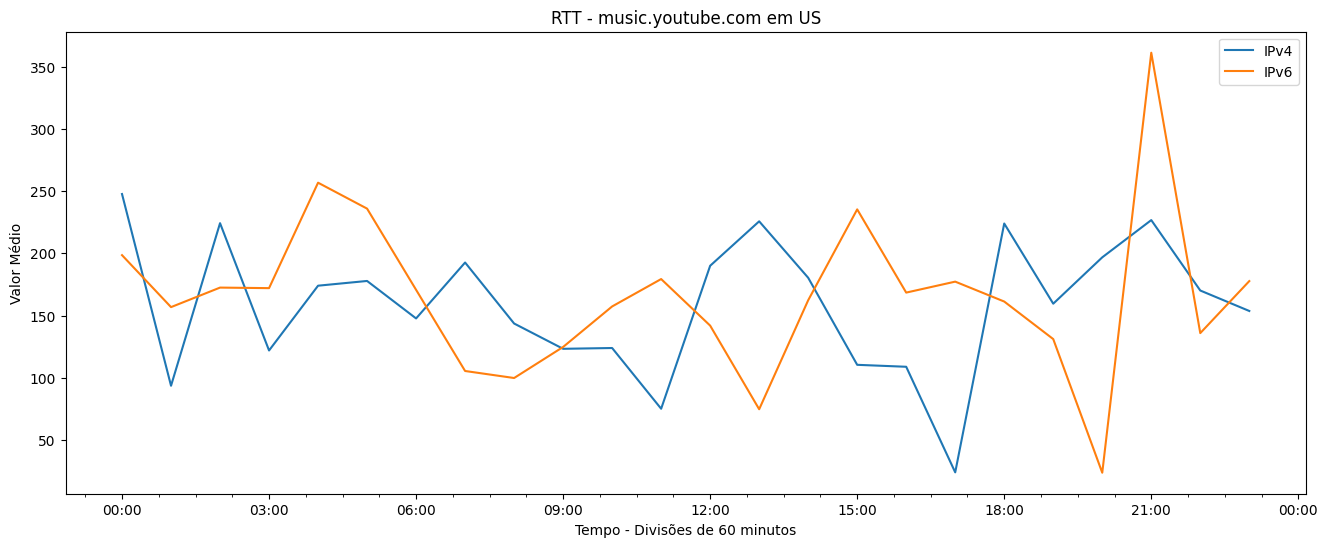

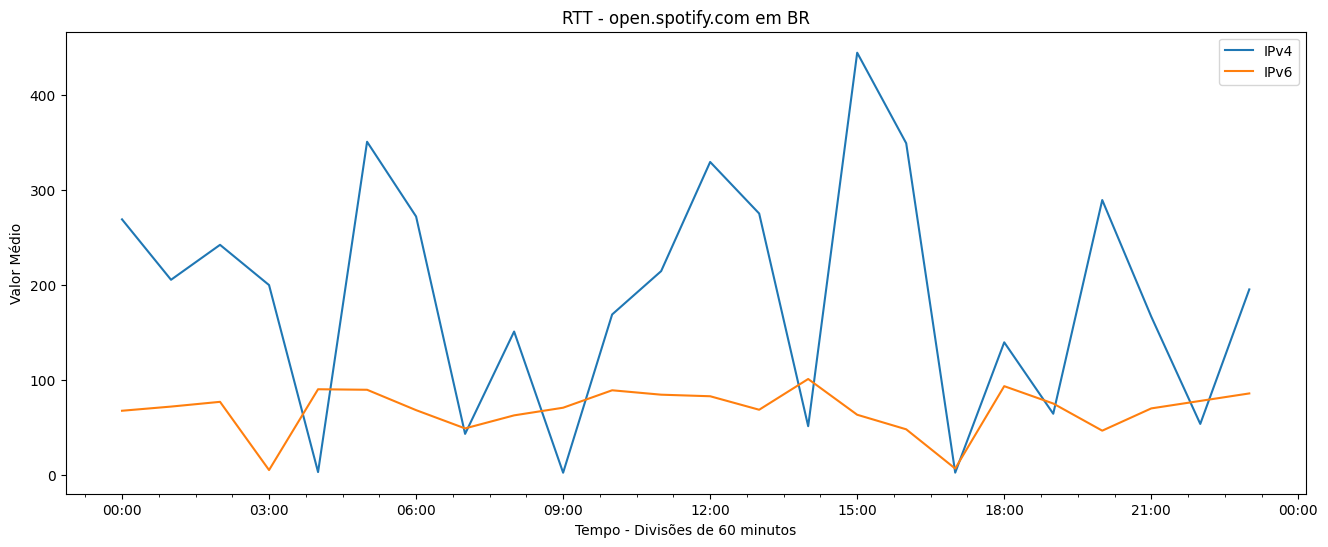

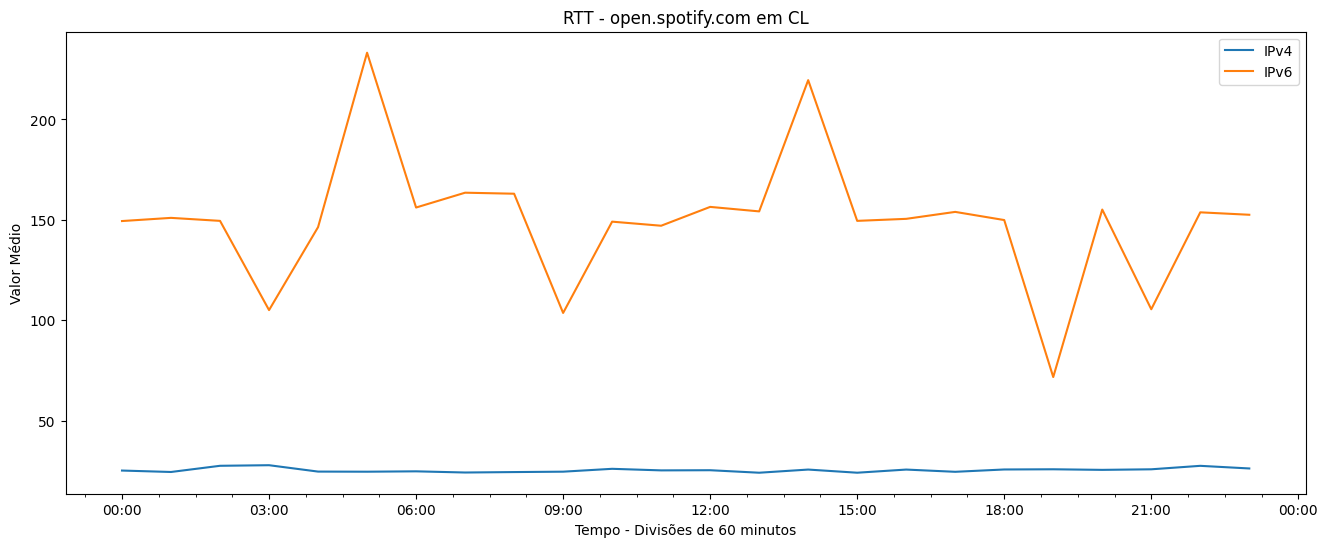

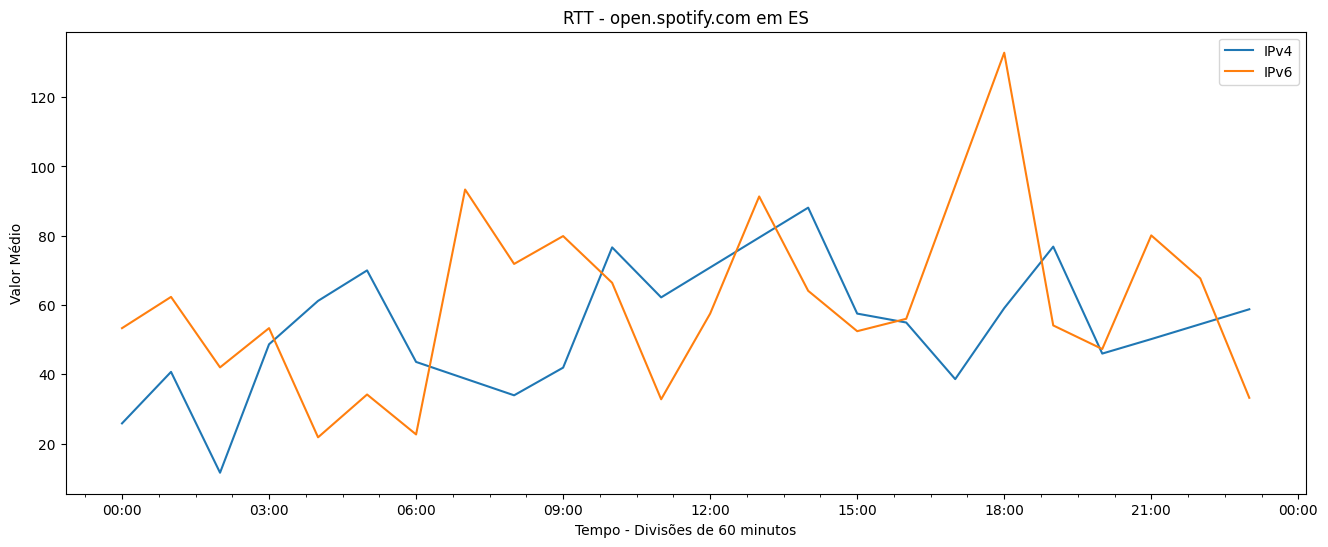

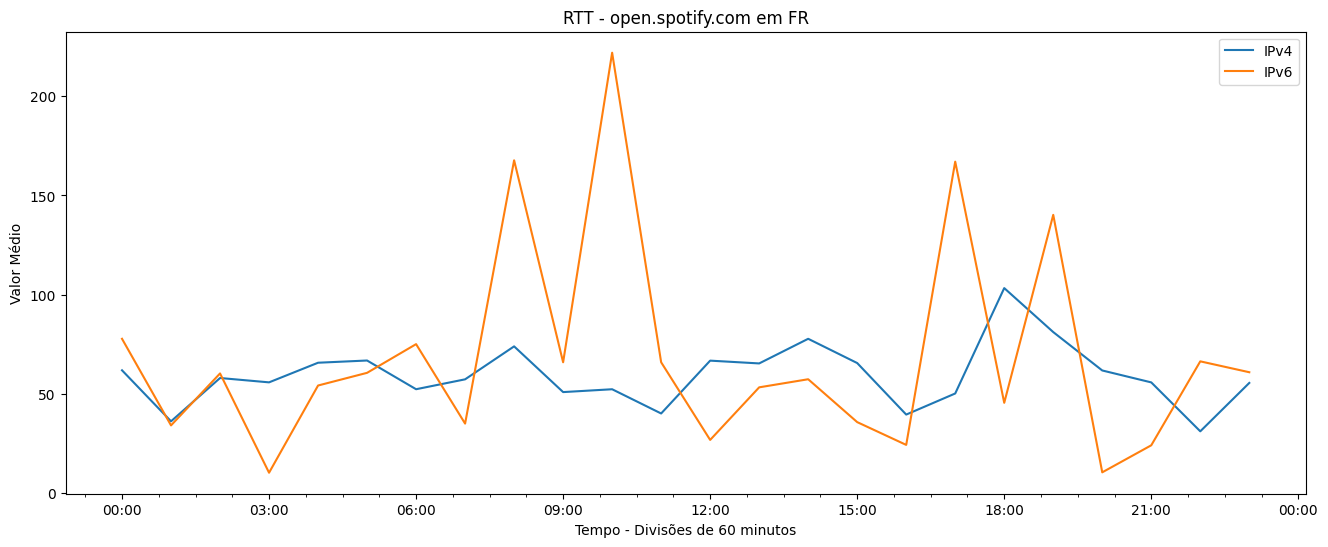

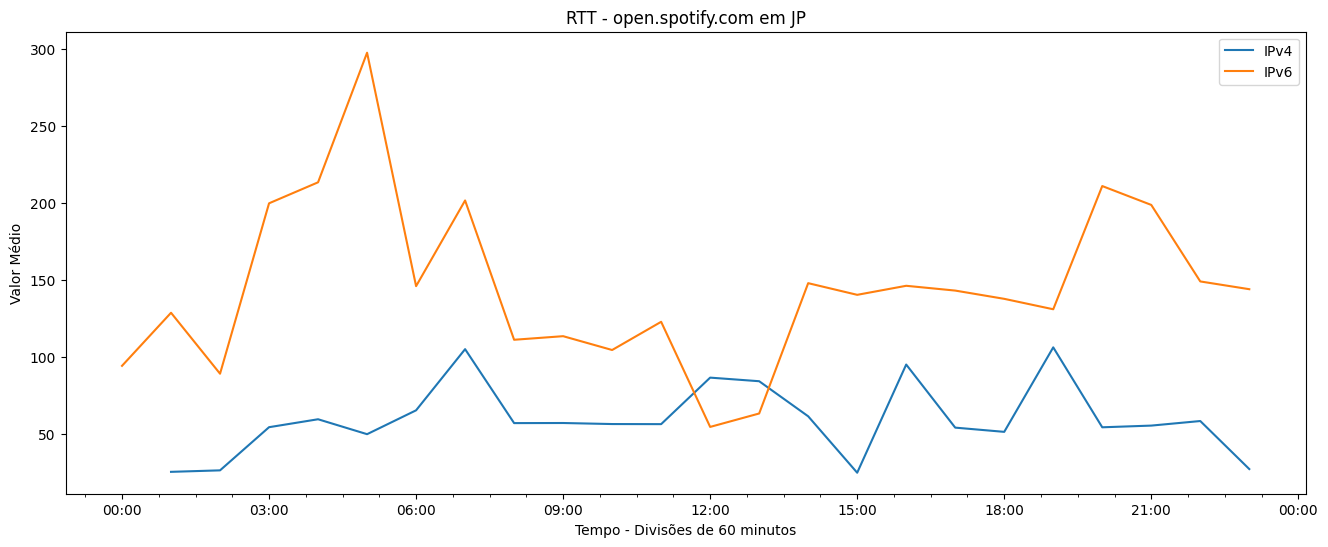

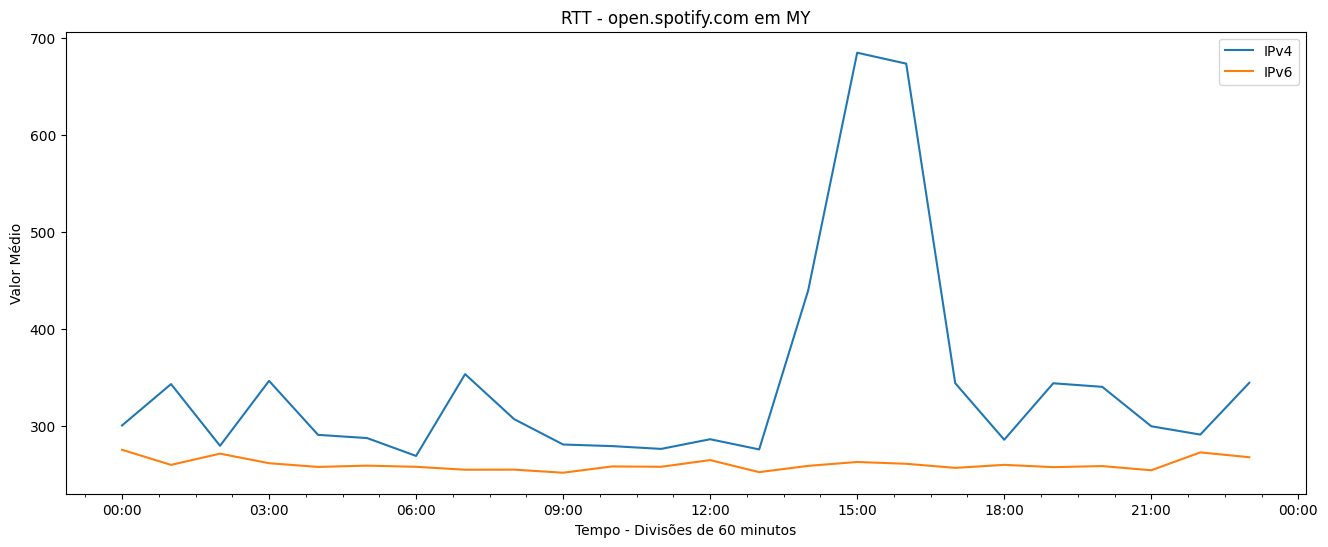

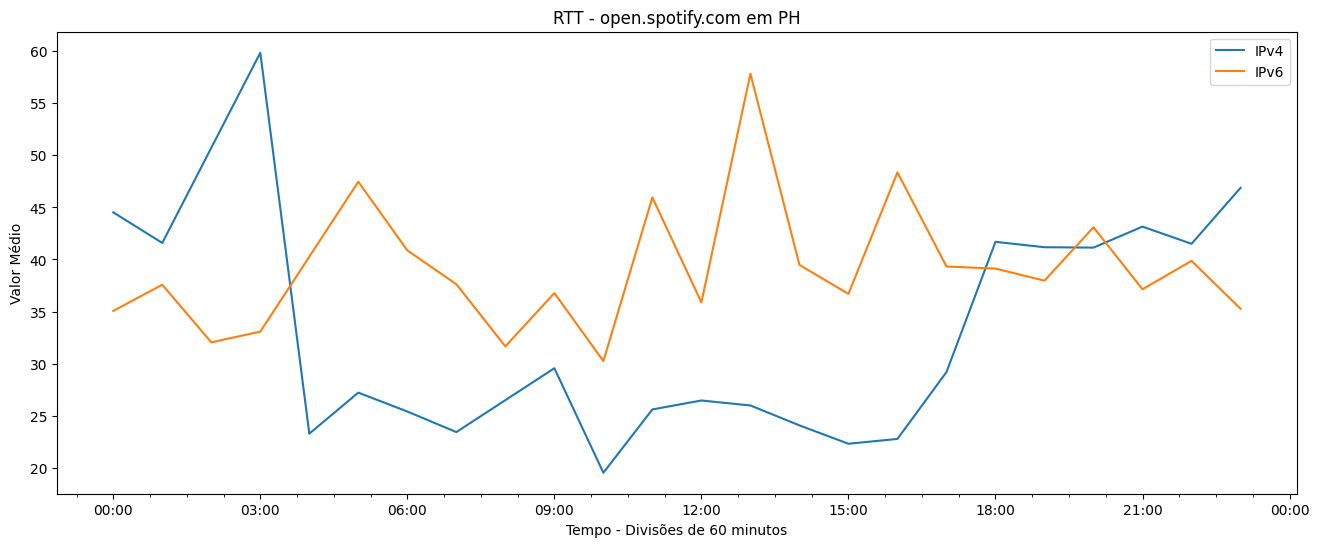

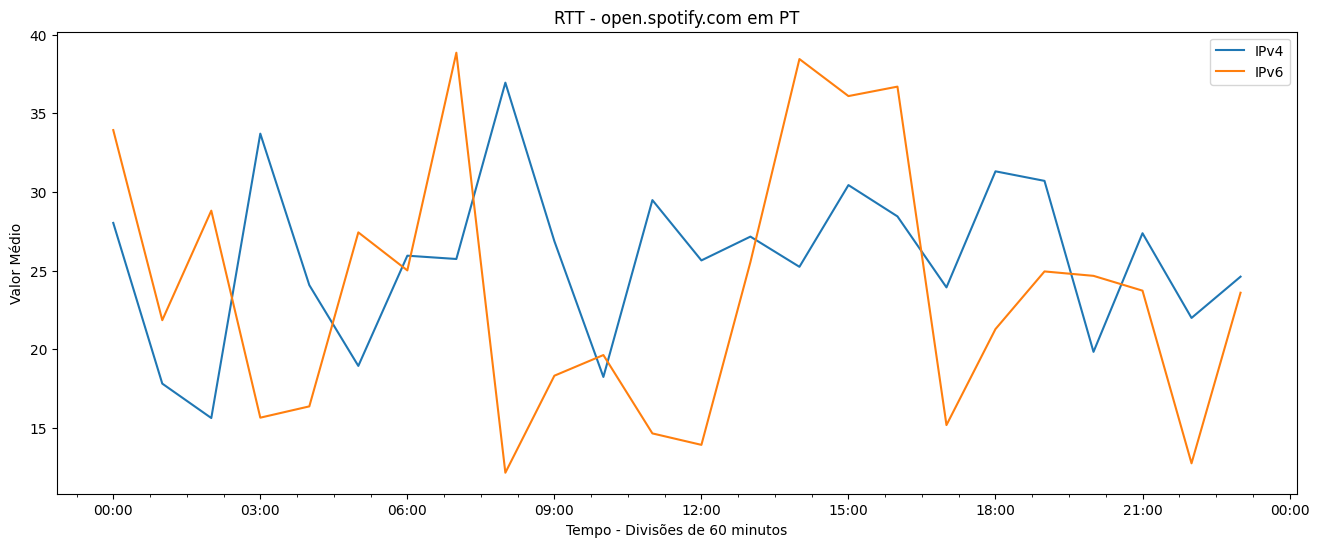

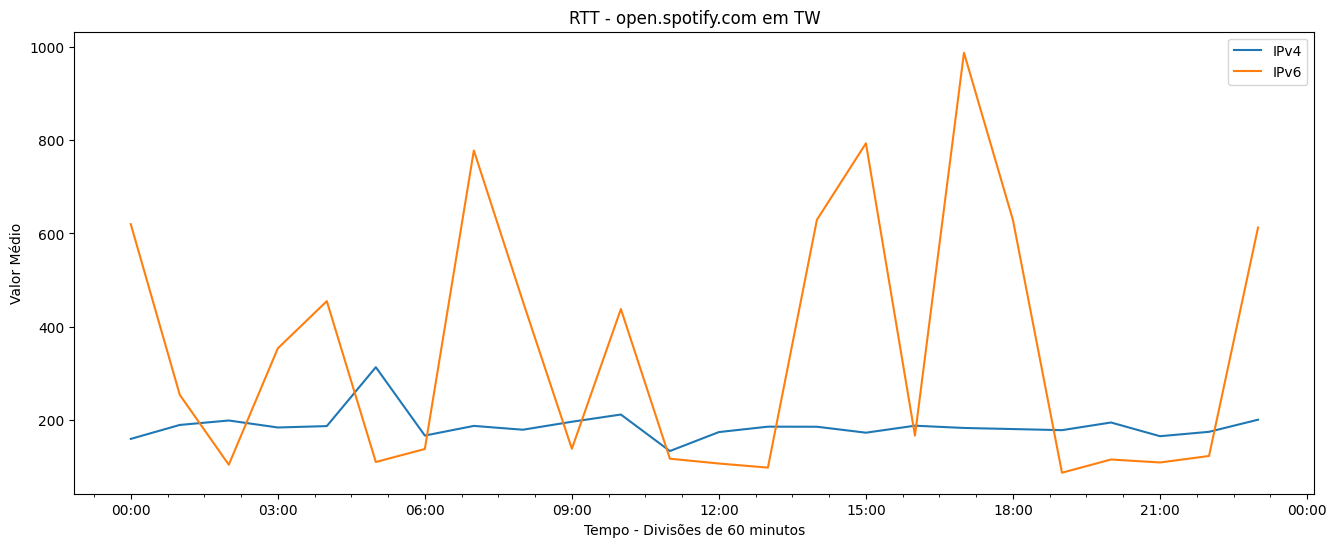

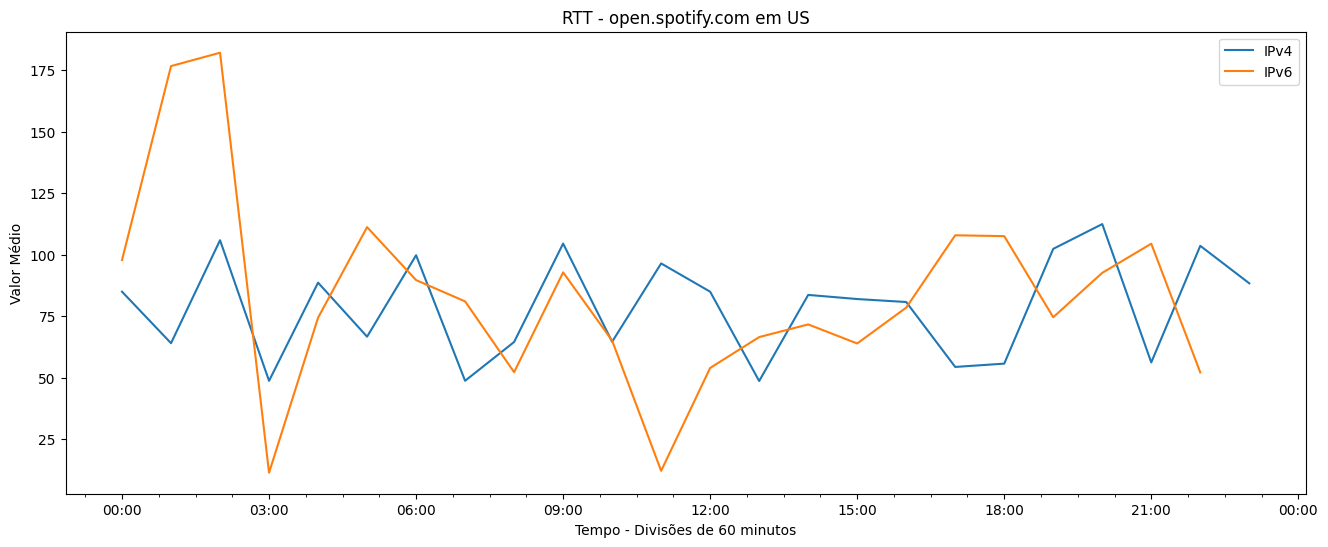

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure timestamp is in datetime format
dataframe["timestamp"] = pd.to_datetime(dataframe["timestamp"])



# Get unique combinations of 'goal_route' and 'ip_version'
group_combinations = dataframe.groupby(["goal_route", "location"]).size().reset_index()[["goal_route",
                                                                                                       "location"]]#.agg(   ip_version=('ip_version', 'first')   )

# Loop through each group combination and create a separate plot
for _, group in group_combinations.iterrows():
    goal_route = group["goal_route"]
    location = group["location"]

    # Filter the dataframe for the current combination
    filtered_df = dataframe[(dataframe["goal_route"] == goal_route)  & (dataframe["location"] == location)]
    title = "RTT - " + goal_route + " em " + location
    #line_graph_for(filtered_df, title, "rtt")

    ax = line_graph_for(filtered_df[(filtered_df["ip_version"] == "v4")], "",
                    "rtt", show=False, label="IPv4")

    line_graph_for(filtered_df[(filtered_df["ip_version"] == "v6")], title,
                    "rtt", show=True, ax=ax, label="IPv6")


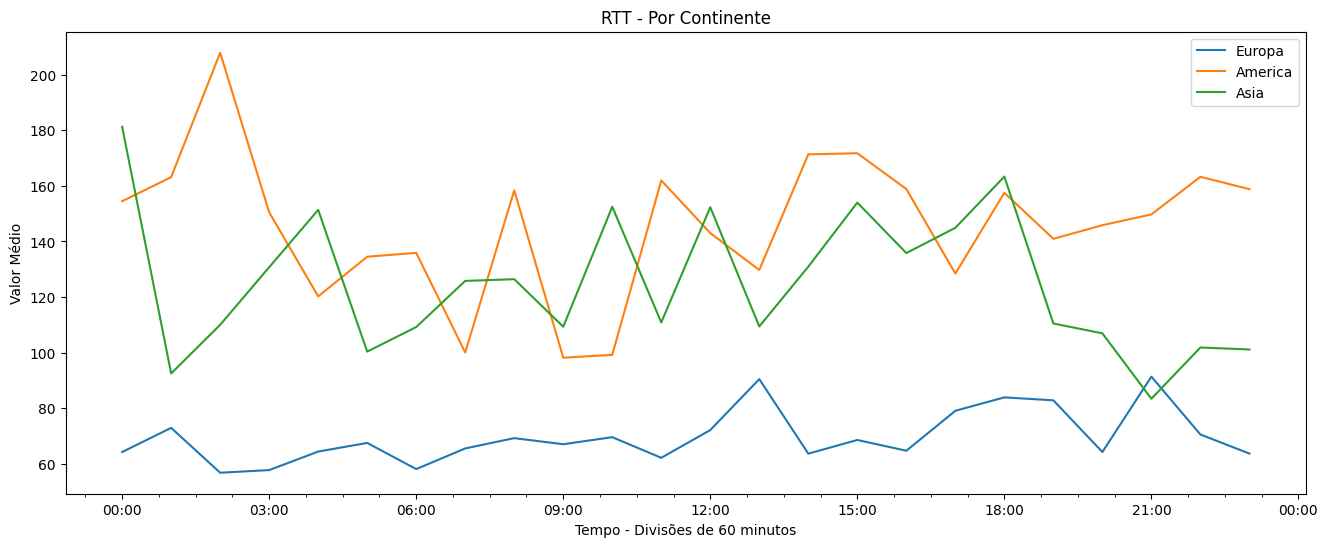

<Axes: title={'center': 'RTT - Por Continente'}, xlabel='Tempo - Divisões de 60 minutos', ylabel='Valor Médio'>

In [ ]:
title = "RTT - Por Continente"

ax = line_graph_for(dataframe[(dataframe["continent"] == "Europe")], "",
                    "rtt", show=False, label="Europa")

ax = line_graph_for(dataframe[(dataframe["continent"] == "America")], title,
                    "rtt", show=False, ax=ax, label="America")

line_graph_for(dataframe[(dataframe["continent"] == "Asia")], title,
                    "rtt", show=True, ax=ax, label="Asia")



<ipython-input-29-bf438c12d893>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="IP Version", bbox_to_anchor=(1.05, 1), loc='upper left')
<ipython-input-29-bf438c12d893>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="IP Version", bbox_to_anchor=(1.05, 1), loc='upper left')
<ipython-input-29-bf438c12d893>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="IP Version", bbox_to_anchor=(1.05, 1), loc='upper left')


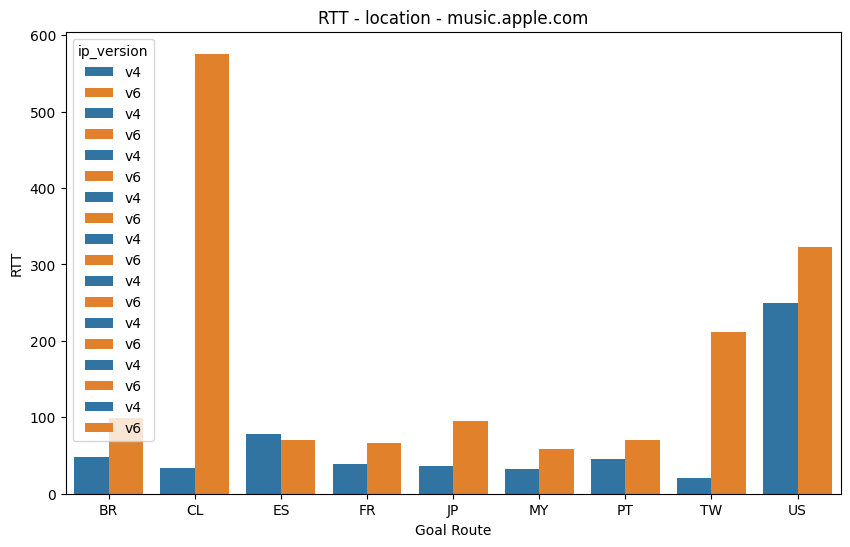

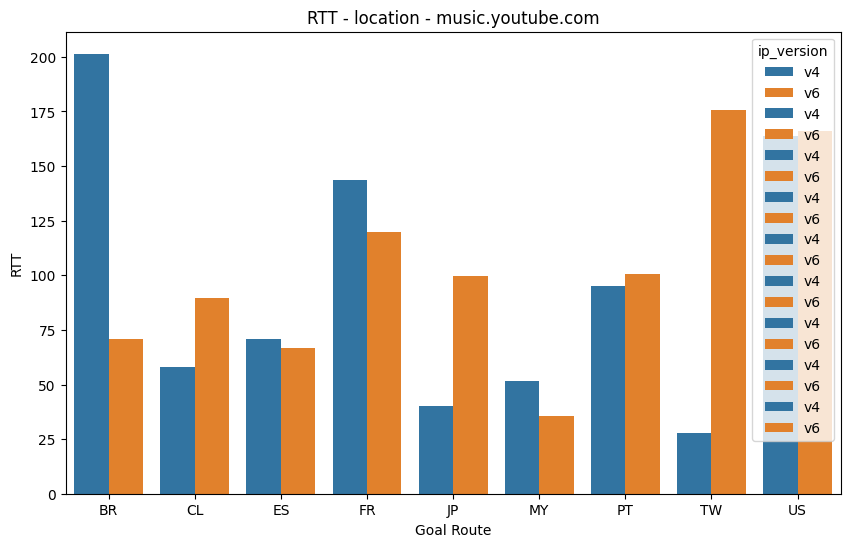

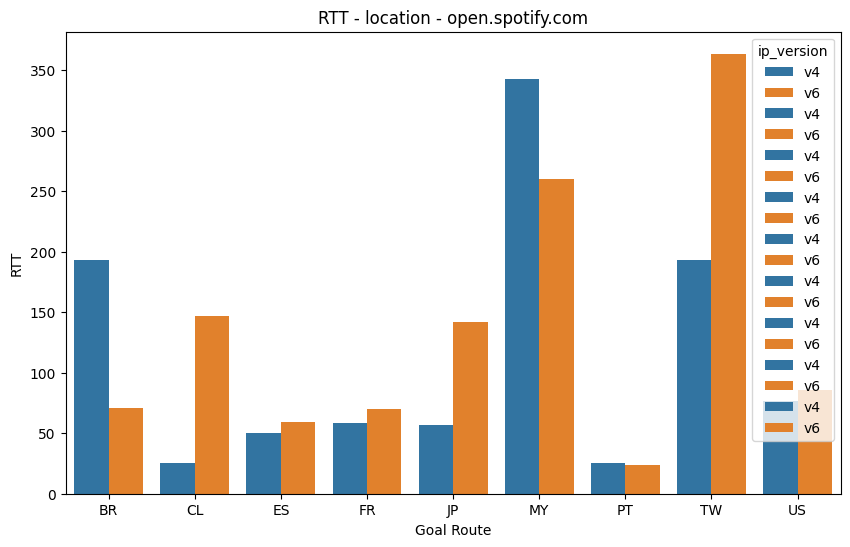

In [ ]:


group_combinations = dataframe.groupby(["goal_route", "location"]).size().reset_index()[["goal_route",
                                                                                                       "location"]]#.agg(   ip_version=('ip_version', 'first')   )
ax = None
last_goal = None
# Loop through each group combination and create a separate plot
for _, group in group_combinations.iterrows():
    goal_route = group["goal_route"]
    location = group["location"]


    if last_goal != None and last_goal != goal_route:
      ax = None

    last_goal = goal_route
    filtered_df = dataframe[(dataframe["goal_route"] == goal_route)  & (dataframe["location"] == location)]
    title = "RTT - location - " + goal_route
    #line_graph_for(filtered_df, title, "rtt")

    ax = graph_of_rtt_for(filtered_df, title,  average=True, ax=ax, show=False, set_x=location)
